In [2]:
# Fonots

# Használathoz fel kell tölteni a metric_____.log filét ha Google Colabon használod.

import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import os
import pickle
import joblib

import warnings 
# warnings.filterwarnings("ignore")

from datetime import datetime, date, time

from tensorflow import keras
from tensorflow.keras import layers

from rich.progress import track

from termcolor import colored

from sklearn.linear_model import LinearRegression

from pandas.plotting import scatter_matrix

print(tf.__version__)

import time
ost = time.time()

ost = time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())
print(ost)

ost = time.strftime("%H:%M:%S", time.gmtime())
print(ost)

2.10.0
2023-05-23 19:31:35
19:31:35


In [3]:
metric_file_name = 'metric_train_by_none.log'

df = pd.read_csv(metric_file_name, sep=',', header=0)

df.head()

worker_give_metrics write_to_csv_time     time  response_time_p95  \
0         192.168.0.6          09:23:43  09:23:4         3352.12430   
1         192.168.0.6          09:23:50  09:23:5         5377.24090   
2         192.168.0.6          09:24:00  09:24:0          614.68840   
3         192.168.0.6          09:24:13  09:24:1         4686.58645   
4         192.168.0.6          09:24:27  09:24:2        10071.37840   

   response_time  worker_number  request_rate  CPU0User%  CPU0Idle%  \
0    2121.454114              1           3.5       48.6       49.3   
1    1643.983272              2          11.4       93.5        3.8   
2     209.768952              3          18.7       90.9        7.1   
3    1914.126807              1           8.8       97.5        0.2   
4    3957.221233              1           7.3       97.6        0.0   

   CPU0Total%  ...  [NUMA:0]Mapped  [NUMA:0]Anon  [NUMA:0]AnonH  \
0        50.7  ...        109863.2      988064.0         2048.0   
1        96.2  ...        109989.6      996090.8         2048.0   
2        92.8  ...        109228.0      995050.0         2048.0   
3        99.8  ...        109649.6      998286.8         2048.0   
4       100.0  ...        109748.4     1004097.6         2048.0   

   [NUMA:0]Inactive  [NUMA:0]Hits  [TCPD]InReceives  [TCPD]InDelivers  \
0          347312.0         100.0              48.9              48.9   
1          347354.0         100.0              68.8              68.8   
2          347337.6         100.0              45.4              45.4   
3          347364.8         100.0              54.4              54.4   
4          347361.2         100.0              43.8              43.8   

   [TCPD]OutRequests  [TCPD]InSegs  [TCPD]OutSegs  
0               42.6          48.4           42.6  
1               70.3          68.8           70.4  
2               44.2          45.4           44.3  
3               50.7          54.4           50.7  
4               44.8          43.8           44.8  

[5 rows x 36 columns]

In [4]:
df['worker_give_metrics'].unique()

array(['192.168.0.6'], dtype=object)

In [5]:
pd.options.display.float_format = "{:,.2f}".format
df.describe().T

count         mean       std          min          25%  \
response_time_p95 200.00     1,142.90  2,317.09        61.32       194.28   
response_time     200.00       544.40  1,383.35        38.64        81.05   
worker_number     200.00         5.35      2.49         1.00         3.00   
request_rate      200.00        18.29      3.67         1.30        19.30   
CPU0User%         200.00        51.40     28.33         9.80        28.60   
CPU0Idle%         200.00        46.52     28.46         0.00        21.73   
CPU0Total%        200.00        53.34     28.54        11.30        30.77   
[DSK:sda]Reads    200.00         0.07      0.44         0.00         0.00   
[DSK:sda]RMerge   200.00         0.00      0.00         0.00         0.00   
[DSK:sda]RKBytes  200.00         0.96      6.34         0.00         0.00   
[DSK:sda]WaitR    200.00         0.02      0.09         0.00         0.00   
[DSK:sda]Writes   200.00         8.28      8.32         0.40         0.80   
[DSK:sda]WMerge   200.00         2.75      0.81         0.90         2.20   
[DSK:sda]WKBytes  200.00        51.83     40.39         9.10        17.60   
[DSK:sda]WaitW    200.00         0.88      0.47         0.00         0.70   
[DSK:sda]Request  200.00         6.98      1.90         0.50         5.80   
[DSK:sda]QueLen   200.00         0.10      0.08         0.00         0.00   
[DSK:sda]Wait     200.00         0.90      0.47         0.00         0.70   
[DSK:sda]SvcTim   200.00         1.54      0.67         0.00         1.10   
[DSK:sda]Util     200.00         0.44      0.32         0.10         0.30   
[NUMA:0]Used      200.00 1,930,263.78 14,529.16 1,882,856.80 1,924,259.80   
[NUMA:0]Free      200.00   105,104.22 14,529.16    78,055.60    95,946.30   
[NUMA:0]Slab      200.00   156,089.75  2,394.39   151,566.00   153,885.60   
[NUMA:0]Mapped    200.00   110,496.43    655.60   109,228.00   109,950.10   
[NUMA:0]Anon      200.00 1,032,929.85 17,781.40   988,064.00 1,022,047.40   
[NUMA:0]AnonH     200.00     2,048.00      0.00     2,048.00     2,048.00   
[NUMA:0]Inactive  200.00   346,378.60  2,697.57   340,044.80   346,710.40   
[NUMA:0]Hits      200.00       100.00      0.00       100.00       100.00   
[TCPD]InReceives  200.00        34.29     21.64        16.50        20.20   
[TCPD]InDelivers  200.00        34.29     21.64        16.50        20.20   
[TCPD]OutRequests 200.00        33.50     21.34        16.10        19.60   
[TCPD]InSegs      200.00        34.21     21.64        16.50        20.15   
[TCPD]OutSegs     200.00        33.50     21.33        16.10        19.68   

                           50%          75%          max  
response_time_p95       302.62       402.99    13,855.32  
response_time           148.65       183.76    10,108.88  
worker_number             6.00         8.00         8.00  
request_rate             19.70        19.90        20.20  
CPU0User%                43.65        76.40        98.20  
CPU0Idle%                54.50        68.88        88.40  
CPU0Total%               45.45        78.17       100.00  
[DSK:sda]Reads            0.00         0.00         3.50  
[DSK:sda]RMerge           0.00         0.00         0.00  
[DSK:sda]RKBytes          0.00         0.00        56.20  
[DSK:sda]WaitR            0.00         0.00         0.50  
[DSK:sda]Writes           3.95        17.45        30.40  
[DSK:sda]WMerge           2.65         3.20         6.00  
[DSK:sda]WKBytes         38.40        95.67       155.90  
[DSK:sda]WaitW            0.90         1.00         5.90  
[DSK:sda]Request          7.00         8.30        11.20  
[DSK:sda]QueLen           0.10         0.20         0.30  
[DSK:sda]Wait             0.90         1.00         5.90  
[DSK:sda]SvcTim           1.60         1.80         7.00  
[DSK:sda]Util             0.30         0.50         1.90  
[NUMA:0]Used      1,935,162.00 1,939,421.70 1,957,312.40  
[NUMA:0]Free        100,206.00   111,108.20   152,511.20  
[NUMA:0]Slab        156,066.40   158,124.90

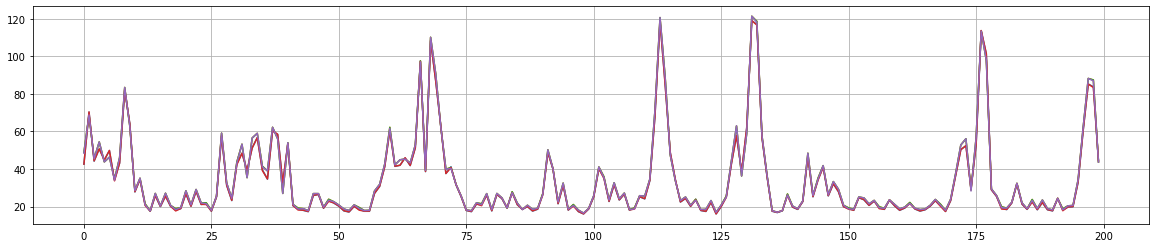

In [6]:
plt.figure(figsize=(20,4))
plt.plot(df['[TCPD]OutRequests'])
plt.plot(df['[TCPD]InDelivers'])
plt.plot(df['[TCPD]InReceives'])
plt.plot(df['[TCPD]OutSegs'])
plt.plot(df['[TCPD]InSegs'])
plt.grid()
plt.show()

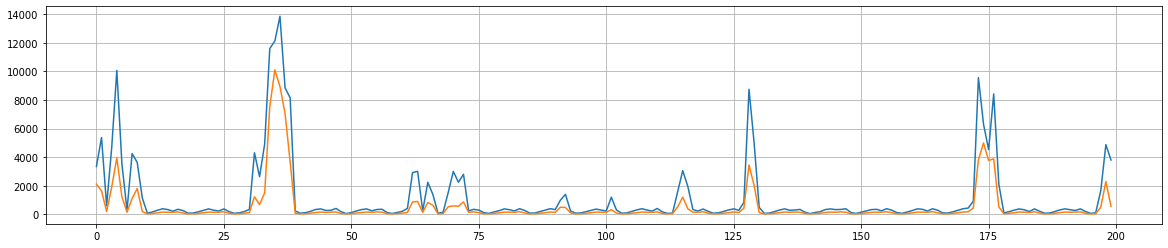

In [7]:
plt.figure(figsize=(20,4))
plt.plot(df['response_time_p95'])
plt.plot(df['response_time'])
plt.grid()
# plt.grid(axis='y')
plt.show()

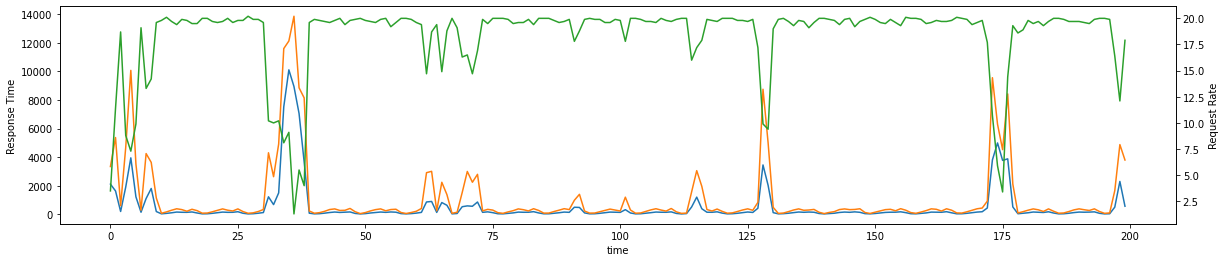

In [8]:
fig, ax1 = plt.subplots(figsize=(20, 4))

ax1.plot(df['response_time'], label = 'RT', color = 'C0')
ax1.plot(df['response_time_p95'], label = 'RT95%', color = 'C1')

ax2 = ax1.twinx()

ax2.plot(df['request_rate'], label = 'RR', color = 'C2')

ax1.set_xlabel('time')
ax1.set_ylabel('Response Time')
ax2.set_ylabel('Request Rate')

plt.show()

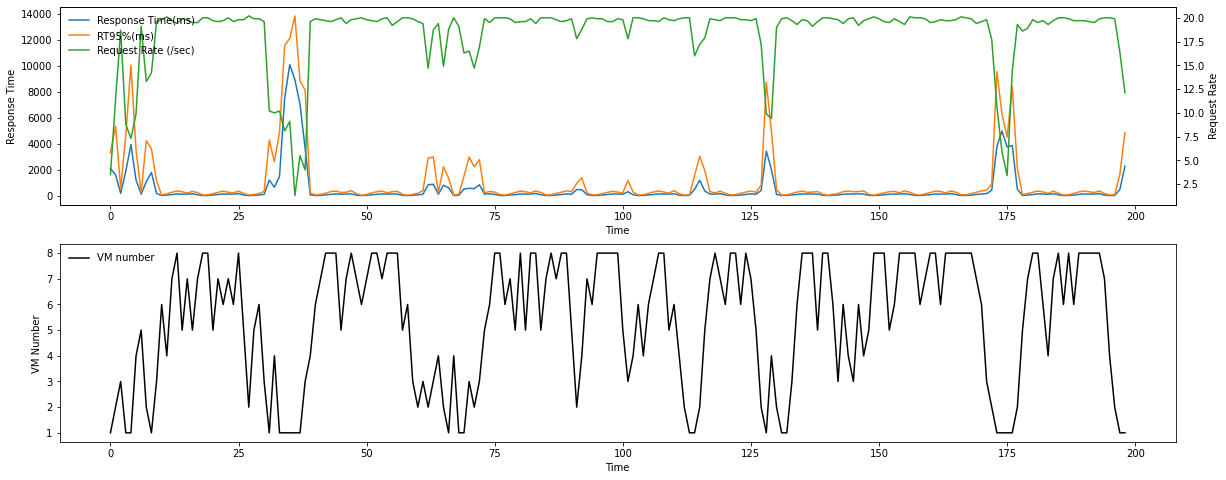

In [9]:
def show(FROM=0, TO=-1):

    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

    l1 = ax1.plot(df['response_time'][FROM:TO], color = 'C0', label='Response Time(ms)')
    l2 = ax1.plot(df['response_time_p95'][FROM:TO], color = 'C1', label='RT95%(ms)')

    ax2 = ax1.twinx()

    l3 = ax2.plot(df['request_rate'][FROM:TO], color = 'C2', label='Request Rate (/sec)')

    ax1.set_xlabel('Time')
    ax1.set_ylabel('Response Time')
    ax2.set_ylabel('Request Rate')

    ax3.plot(df['worker_number'][FROM:TO], color = 'black', label='VM number')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('VM Number')
    ax3.legend(loc=2, frameon=False)

    lns = l1+l2+l3
    labs = [l.get_label() for l in lns]
    ax2.legend(lns, labs, loc=2, frameon=False)

    plt.show()

show()

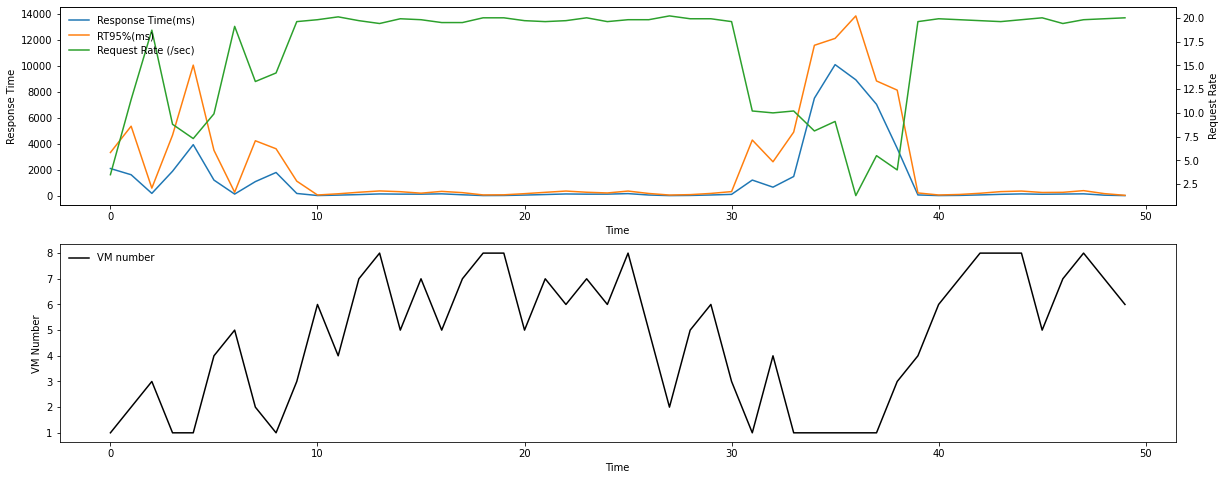

In [10]:
show(0, 50)

In [10]:
df.iloc[:, 0:7].describe()

response_time_p95  response_time  worker_number  request_rate
count             400.00         400.00         400.00        400.00
mean            3,011.56       1,739.99           3.94         16.39
std             3,957.30       2,712.15           2.53          5.08
min                58.12          38.11           1.00          0.20
25%               203.88          83.52           1.00         14.40
50%               396.69         174.87           4.00         19.25
75%             5,309.69       2,592.00           6.00         19.80
max            16,605.18      12,860.50           8.00         22.10

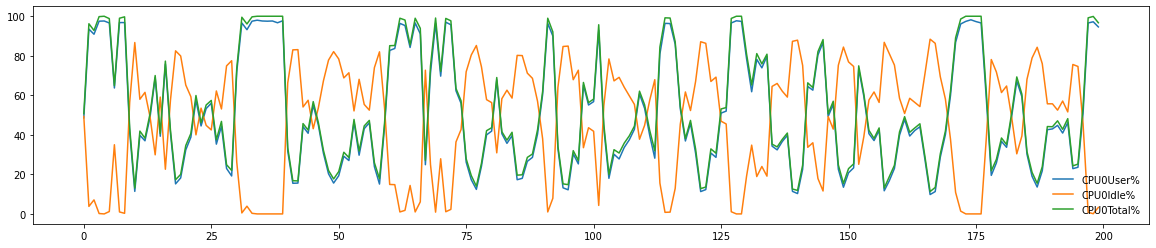

In [11]:
def plot_timeseries_metrics(name: str):

    plt.figure(figsize=(20, 4))

    for col_name in df.columns:
        if name in col_name:
            if df[col_name].describe()[2] > 0:
                plt.plot(df[col_name], label = col_name)

    plt.legend(frameon=False)
    plt.show()

plot_timeseries_metrics('CPU')

In [13]:
df.iloc[:, 7:10].describe()

CPU0User%  CPU0Idle%  CPU0Total%
count     200.00     200.00      200.00
mean       51.40      46.52       53.34
std        28.33      28.46       28.54
min         9.80       0.00       11.30
25%        28.60      21.73       30.77
50%        43.65      54.50       45.45
75%        76.40      68.88       78.17
max        98.20      88.40      100.00

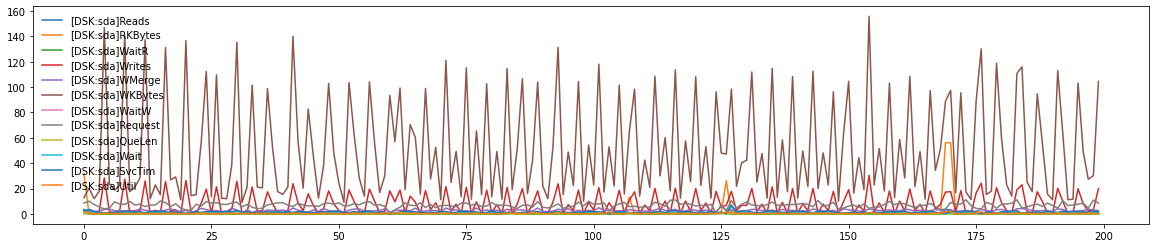

In [12]:
plot_timeseries_metrics('DSK')

In [14]:
df.iloc[:, 10:23].describe()

[DSK:sda]Reads  [DSK:sda]RMerge  [DSK:sda]RKBytes  [DSK:sda]WaitR  \
count          200.00           200.00            200.00          200.00   
mean             0.07             0.00              0.96            0.02   
std              0.44             0.00              6.34            0.09   
min              0.00             0.00              0.00            0.00   
25%              0.00             0.00              0.00            0.00   
50%              0.00             0.00              0.00            0.00   
75%              0.00             0.00              0.00            0.00   
max              3.50             0.00             56.20            0.50   

       [DSK:sda]Writes  [DSK:sda]WMerge  [DSK:sda]WKBytes  [DSK:sda]WaitW  \
count           200.00           200.00            200.00          200.00   
mean              8.28             2.75             51.83            0.88   
std               8.32             0.81             40.39            0.47   
min               0.40             0.90              9.10            0.00   
25%               0.80             2.20             17.60            0.70   
50%               3.95             2.65             38.40            0.90   
75%              17.45             3.20             95.67            1.00   
max              30.40             6.00            155.90            5.90   

       [DSK:sda]Request  [DSK:sda]QueLen  [DSK:sda]Wait  [DSK:sda]SvcTim  \
count            200.00           200.00         200.00           200.00   
mean               6.98             0.10           0.90             1.54   
std                1.90             0.08           0.47             0.67   
min                0.50             0.00           0.00             0.00   
25%                5.80             0.00           0.70             1.10   
50%                7.00             0.10           0.90             1.60   
75%                8.30             0.20           1.00             1.80   
max               11.20             0.30           5.90             7.00   

       [DSK:sda]Util  
count         200.00  
mean            0.44  
std             0.32  
min             0.10  
25%             0.30  
50%             0.30  
75%             0.50  
max             1.90

In [15]:
df.iloc[:, 23:31].describe()

[NUMA:0]Used  [NUMA:0]Free  [NUMA:0]Slab  [NUMA:0]Mapped  [NUMA:0]Anon  \
count        200.00        200.00        200.00          200.00        200.00   
mean   1,930,263.78    105,104.22    156,089.75      110,496.43  1,032,929.85   
std       14,529.16     14,529.16      2,394.39          655.60     17,781.40   
min    1,882,856.80     78,055.60    151,566.00      109,228.00    988,064.00   
25%    1,924,259.80     95,946.30    153,885.60      109,950.10  1,022,047.40   
50%    1,935,162.00    100,206.00    156,066.40      110,572.00  1,033,042.20   
75%    1,939,421.70    111,108.20    158,124.90      110,973.00  1,046,015.40   
max    1,957,312.40    152,511.20    160,638.40      112,362.80  1,068,376.80   

       [NUMA:0]AnonH  [NUMA:0]Inactive  [NUMA:0]Hits  
count         200.00            200.00        200.00  
mean        2,048.00        346,378.60        100.00  
std             0.00          2,697.57          0.00  
min         2,048.00        340,044.80        100.00  
25%         2,048.00        346,710.40        100.00  
50%         2,048.00        347,463.80        100.00  
75%         2,048.00        347,860.10        100.00  
max         2,048.00        348,267.20        100.00

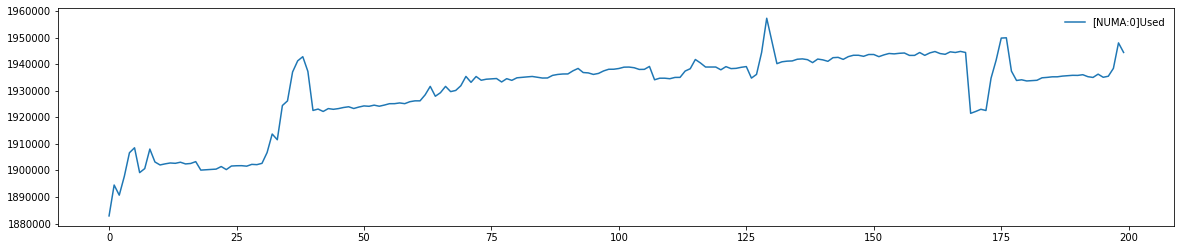

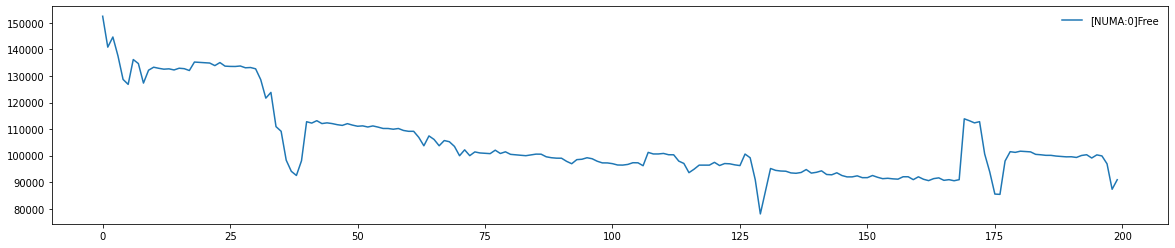

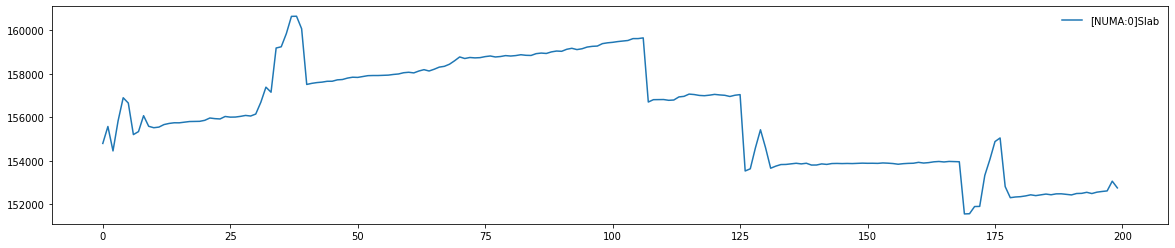

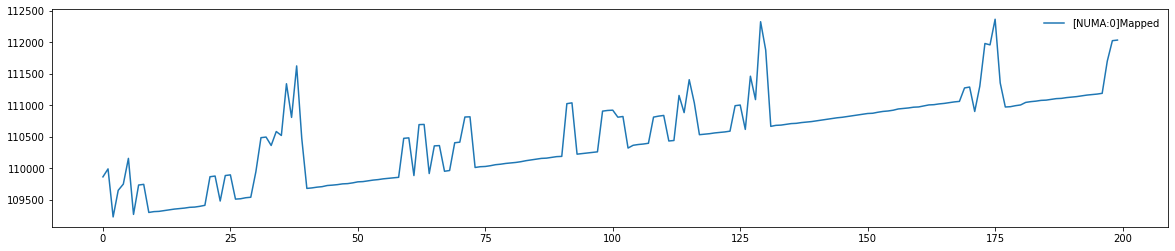

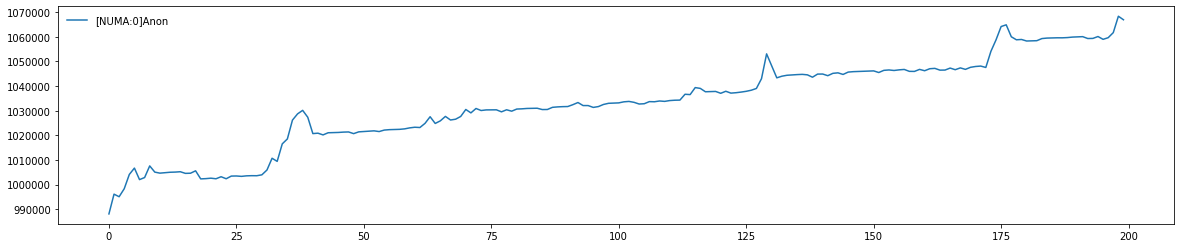

In [16]:
def plot_timeseries_metrics_separate(name: str):

    for col_name in df.columns:
        if name in col_name:
            if df[col_name].describe()[2] > 0:
                plt.figure(figsize=(20, 4))
                plt.ticklabel_format(useOffset=False)
                plt.ticklabel_format(style='plain')
                plt.plot(df[col_name], label = col_name)
                plt.legend(frameon=False)
                plt.show()

plot_timeseries_metrics_separate('NUMA')

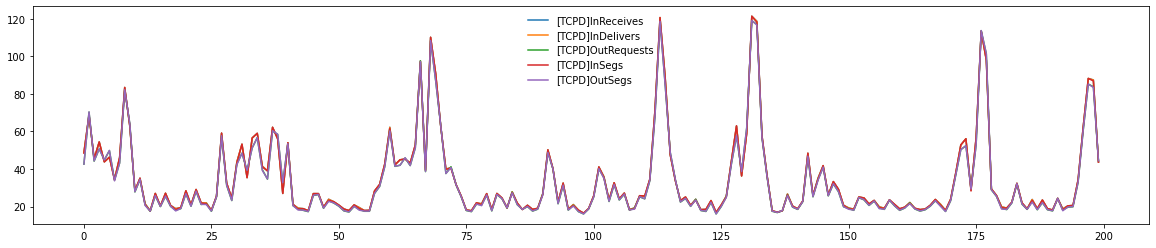

In [17]:
plot_timeseries_metrics('TCP')

## Before metric After metric

Itt állítom elő a metrikából a before after értékeket

Ennek a prototípusát dolgoztam ki és ellenőriztem le itt.

In [18]:
mf = df.copy()

mf['actual_vm_number_is'] = mf['worker_number']
mf['actual_vm_number_was'] = mf['worker_number'].shift(1)
mf['actual_vm_number_will'] = mf['worker_number'].shift(-1)

mf['delta_vm'] = mf['actual_vm_number_will'] - mf['actual_vm_number_is']

mf.head()

worker_give_metrics write_to_csv_time     time  response_time_p95  \
0         192.168.0.6          09:23:43  09:23:4           3,352.12   
1         192.168.0.6          09:23:50  09:23:5           5,377.24   
2         192.168.0.6          09:24:00  09:24:0             614.69   
3         192.168.0.6          09:24:13  09:24:1           4,686.59   
4         192.168.0.6          09:24:27  09:24:2          10,071.38   

   response_time  worker_number  request_rate  CPU0User%  CPU0Idle%  \
0       2,121.45              1          3.50      48.60      49.30   
1       1,643.98              2         11.40      93.50       3.80   
2         209.77              3         18.70      90.90       7.10   
3       1,914.13              1          8.80      97.50       0.20   
4       3,957.22              1          7.30      97.60       0.00   

   CPU0Total%  ...  [NUMA:0]Hits  [TCPD]InReceives  [TCPD]InDelivers  \
0       50.70  ...        100.00             48.90             48.90   
1       96.20  ...        100.00             68.80             68.80   
2       92.80  ...        100.00             45.40             45.40   
3       99.80  ...        100.00             54.40             54.40   
4      100.00  ...        100.00             43.80             43.80   

   [TCPD]OutRequests  [TCPD]InSegs  [TCPD]OutSegs  actual_vm_number_is  \
0              42.60         48.40          42.60                    1   
1              70.30         68.80          70.40                    2   
2              44.20         45.40          44.30                    3   
3              50.70         54.40          50.70                    1   
4              44.80         43.80          44.80                    1   

   actual_vm_number_was  actual_vm_number_will  delta_vm  
0                   NaN                   2.00      1.00  
1                  1.00                   3.00      1.00  
2                  2.00                   1.00     -2.00  
3                  3.00                   1.00      0.00  
4                  1.00                   4.00      3.00  

[5 rows x 40 columns]

In [19]:
mf['delta_vm'].unique()

array([ 1., -2.,  0.,  3., -3., -1.,  2., nan])

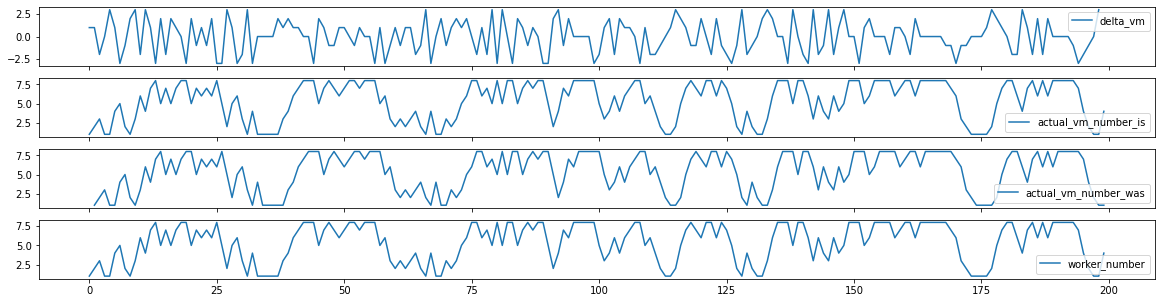

In [20]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 5), sharex=True)

ax1.plot(mf['delta_vm'], label='delta_vm'); ax1.legend()
ax2.plot(mf['actual_vm_number_is'], label='actual_vm_number_is'); ax2.legend()
ax3.plot(mf['actual_vm_number_was'], label='actual_vm_number_was'); ax3.legend()
ax4.plot(mf['worker_number'], label='worker_number'); ax4.legend()
plt.show()

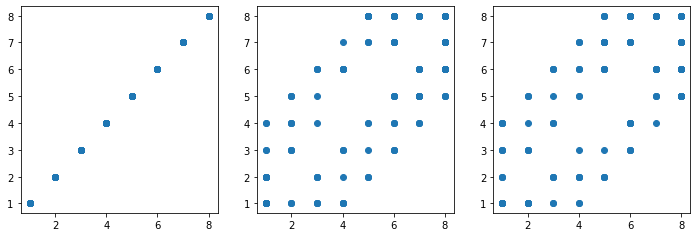

In [21]:
# Ellenőrzés (mert úgy tűnik, hogy a két adatbázisban az éppen aktuális VM szám mindhat egy kicsit mozogna)

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12, 3.8))
ax0.scatter(mf['worker_number'], mf['actual_vm_number_is'])
ax1.scatter(mf['worker_number'], mf['actual_vm_number_was'])
ax2.scatter(mf['worker_number'], mf['actual_vm_number_will'])
plt.show()

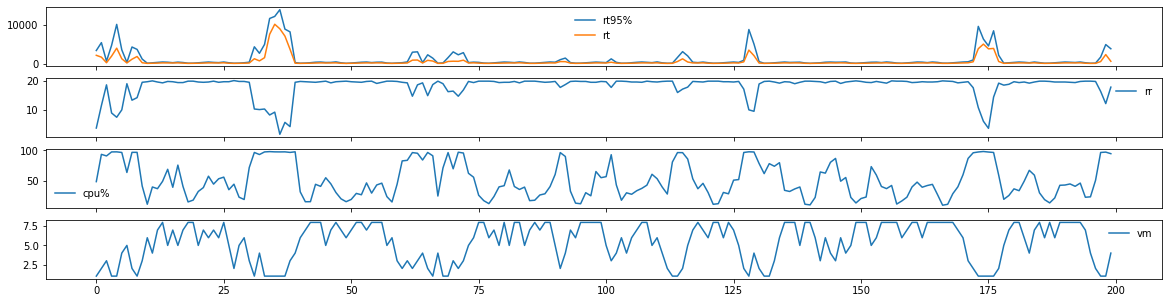

In [22]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 5), sharex=True)

ax1.plot(mf['response_time_p95'], label='rt95%'); ax1.legend(frameon=False)
ax1.plot(mf['response_time'], label='rt');        ax1.legend(frameon=False)
ax2.plot(mf['request_rate'], label='rr');         ax2.legend(frameon=False)
ax3.plot(mf['CPU0User%'], label='cpu%');          ax3.legend(frameon=False)
ax4.plot(mf['worker_number'], label='vm');        ax4.legend(frameon=False)
plt.show()

In [23]:
ff = mf[['time', 'response_time', 'worker_number', 'request_rate', 'CPU0User%', 'actual_vm_number_is', 'actual_vm_number_will', 'delta_vm']].copy()

f2 = ff.reset_index(drop=True) # nem használom, de ha le kéne resetelni az indexet

ff.head()

time  response_time  worker_number  request_rate  CPU0User%  \
0  09:23:4       2,121.45              1          3.50      48.60   
1  09:23:5       1,643.98              2         11.40      93.50   
2  09:24:0         209.77              3         18.70      90.90   
3  09:24:1       1,914.13              1          8.80      97.50   
4  09:24:2       3,957.22              1          7.30      97.60   

   actual_vm_number_is  actual_vm_number_will  delta_vm  
0                    1                   2.00      1.00  
1                    2                   3.00      1.00  
2                    3                   1.00     -2.00  
3                    1                   1.00      0.00  
4                    1                   4.00      3.00

In [24]:
# cpu' = c0 + c1 * cpu * worker_number/(worker_number + delta_vm) + c2 * cpu * delta_vm/(worker_number + delta_vm)

# m'   = c0 + c1 · m · w/(w + k) + c2 · m · k/(w + k)

# metrics[i]=numpy.dot(bvalues[i],[(metrics[i]*w)/(w+k),(metrics[i]*k)/(w+k),1])

In [25]:
# A time a metrikához tartozik
# a otime a scalerhez
# 19:57:4 kor mérünk valamit (91.6)
# --> az is egy külön jó kérdés, hogy ez mikor kerül birásra a rendszerbe (19:57:4 (0) vagy (9))
# ----> megoldás lehet, hogy beteszek a scaler programba egy időbőjeget is, hogy mikor íra be ezt az adatot

# A sclaer 19:57:42-kor végrehajt egy skálázást

# Ennek az eredménye logikus, hogy csak a 19:57:5 metric mérésnél jelenhet meg

In [26]:
f1 = ff.copy()
f1['CPU0User%Next'] = f1['CPU0User%'].shift(-1)
f1['CPU0User%Prev'] = f1['CPU0User%'].shift(+1)
f1.tail()

time  response_time  worker_number  request_rate  CPU0User%  \
195  09:56:1          39.46              4         20.00      23.60   
196  09:56:2          50.73              2         19.90      50.80   
197  09:56:3         512.22              1         16.40      96.60   
198  09:56:4       2,308.41              1         12.10      97.20   
199  09:56:5         575.10              4         17.90      94.60   

     actual_vm_number_is  actual_vm_number_will  delta_vm  CPU0User%Next  \
195                    4                   2.00     -2.00          50.80   
196                    2                   1.00     -1.00          96.60   
197                    1                   1.00      0.00          97.20   
198                    1                   4.00      3.00          94.60   
199                    4                    NaN       NaN            NaN   

     CPU0User%Prev  
195          22.90  
196          23.60  
197          50.80  
198          96.60  
199          97.20

In [27]:
# viszont csak ott kell figyelmebe venni a bf-af értéket ahol ténylegesen volt skálázás

In [28]:
f2 = f1.dropna()
f2.tail()

time  response_time  worker_number  request_rate  CPU0User%  \
194  09:56:0          81.18              7         20.00      22.90   
195  09:56:1          39.46              4         20.00      23.60   
196  09:56:2          50.73              2         19.90      50.80   
197  09:56:3         512.22              1         16.40      96.60   
198  09:56:4       2,308.41              1         12.10      97.20   

     actual_vm_number_is  actual_vm_number_will  delta_vm  CPU0User%Next  \
194                    7                   4.00     -3.00          23.60   
195                    4                   2.00     -2.00          50.80   
196                    2                   1.00     -1.00          96.60   
197                    1                   1.00      0.00          97.20   
198                    1                   4.00      3.00          94.60   

     CPU0User%Prev  
194          46.20  
195          22.90  
196          23.60  
197          50.80  
198          96.60

In [29]:
# Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)

indexAge = f2[ (f2['delta_vm'] == 0) ].index
f2.drop(indexAge , inplace=True)

f2.tail()

/home/ubuntu/notebook/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


time  response_time  worker_number  request_rate  CPU0User%  \
193  09:55:5         183.07              8         19.90      46.20   
194  09:56:0          81.18              7         20.00      22.90   
195  09:56:1          39.46              4         20.00      23.60   
196  09:56:2          50.73              2         19.90      50.80   
198  09:56:4       2,308.41              1         12.10      97.20   

     actual_vm_number_is  actual_vm_number_will  delta_vm  CPU0User%Next  \
193                    8                   7.00     -1.00          22.90   
194                    7                   4.00     -3.00          23.60   
195                    4                   2.00     -2.00          50.80   
196                    2                   1.00     -1.00          96.60   
198                    1                   4.00      3.00          94.60   

     CPU0User%Prev  
193          40.90  
194          46.20  
195          22.90  
196          23.60  
198          96.60

In [30]:
# Van-e bárhol NaN

f2['CPU0User%'].isnull().values.any()

for _ in f2.columns:
    print(f2[_].isnull().values.any())

# (3) Check for NaN under an entire DataFrame

print(f2.isnull().values.any())

# (4) Count the NaN under an entire DataFrame

print(f2.isnull().sum())

False
False
False
False
False
False
False
False
False
False
False
time                     0
response_time            0
worker_number            0
request_rate             0
CPU0User%                0
actual_vm_number_is      0
actual_vm_number_will    0
delta_vm                 0
CPU0User%Next            0
CPU0User%Prev            0
dtype: int64


In [31]:
f3 = f2.copy()
f3['cpu_term1'] = f3['CPU0User%'] * f3['worker_number']/(f3['worker_number'] + f3['delta_vm'])
f3['cpu_term2'] = f3['CPU0User%'] * f3['delta_vm']/(f3['worker_number'] + f3['delta_vm'])

In [32]:
print(f3['cpu_term1'].min())
print(f3['cpu_term1'].max())

print(f3['cpu_term2'].min())
print(f3['cpu_term2'].max())

9.899999999999999
372.8
-279.6
73.275


In [33]:
# cpu' = c0 + c1 * cpu * worker_number/(worker_number + delta_vm) + c2 * cpu * delta_vm/(worker_number + delta_vm)

# m'   = c0 + c1 · m · w/(w + k) + c2 · m · k/(w + k)

In [34]:
# Ez a jó

# A jelenlegi a lapján 'CPU0USer' becsüljük a következő értéket 'CPU0User%Next'

f3 = f2.copy()
f3['cpu_term1'] = f3['CPU0User%'] * f3['worker_number']/(f3['worker_number'] + f3['delta_vm'])
f3['cpu_term2'] = f3['CPU0User%'] * f3['delta_vm']/(f3['worker_number'] + f3['delta_vm'])

# --

_cpu_term = f3[['cpu_term1', 'cpu_term2']]          # jelenlegiekből összeállított term

_cpu_next = f3['CPU0User%Next']                     # a következő mérés értéke

print(_cpu_term.shape, _cpu_next.shape)

lr = LinearRegression(fit_intercept=True)

rr = lr.fit(_cpu_term, _cpu_next)

with np.printoptions(precision=2, suppress=True):
    print('score %.2f' % rr.score(_cpu_term, _cpu_next))
    print('coef', rr.coef_)
    print('icpet %.2f' % rr.intercept_)

pred_cpu = rr.predict(_cpu_term)

(152, 2) (152,)
score 0.55
coef [0.68 0.48]
icpet 14.97


In [35]:
# Átállítom a színeket

from cycler import cycler
import matplotlib as mpl

colormap = plt.get_cmap('jet')
colors = [colormap(k) for k in np.linspace(0, 1, 10)]

mpl.rcParams['axes.prop_cycle'] = cycler(color=colors)

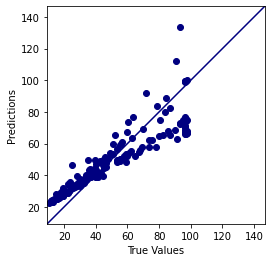

In [36]:
def plot_true_vs_pred(true, pred):
    plt.axes(aspect='equal')
    plt.scatter(true, pred)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    _min = np.min((np.min(true), np.min(pred)))
    _max = np.max((np.max(true), np.max(pred)))
    _min -= _min/10
    _max += _max/10
    lims = [_min, _max]
    plt.xlim(lims)
    plt.ylim(lims)
    _ = plt.plot(lims, lims)
    plt.show()

plot_true_vs_pred(f3['CPU0User%'], pred_cpu)

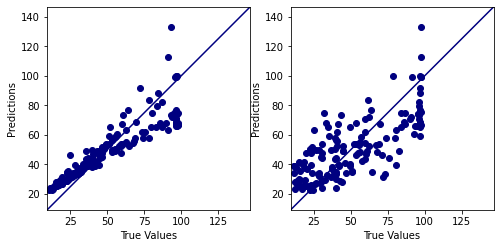

In [37]:
def plot_true_vs_pred_two(true1, pred1, true2, pred2):
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(4.0*2, 4.0))
    
    ax0.axis('equal')
    ax0.set_aspect('equal', 'box')
    ax0.scatter(true1, pred1)
    ax0.set_xlabel('True Values')
    ax0.set_ylabel('Predictions')
    _min = np.min((np.min(true1), np.min(pred1)))
    _max = np.max((np.max(true1), np.max(pred1)))
    _min -= _min/10
    _max += _max/10
    lims = [_min, _max]
    ax0.set_xlim(lims)
    ax0.set_ylim(lims)
    _ = ax0.plot(lims, lims)
    
    ax1.axis('equal')
    ax1.set_aspect('equal', 'box')
    ax1.scatter(true2, pred2)
    ax1.set_xlabel('True Values')
    ax1.set_ylabel('Predictions')
    _min = np.min((np.min(true1), np.min(pred1)))
    _max = np.max((np.max(true1), np.max(pred1)))
    _min -= _min/10
    _max += _max/10
    lims = [_min, _max]
    ax1.set_xlim(lims)
    ax1.set_ylim(lims)
    _ = ax1.plot(lims, lims)
    
    plt.show()

plot_true_vs_pred_two(f3['CPU0User%'], pred_cpu, f3['CPU0User%Next'], pred_cpu)

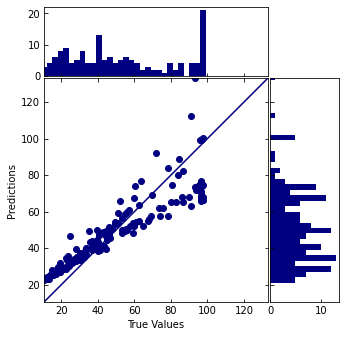

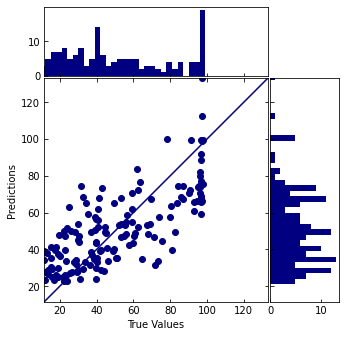

In [39]:
def plot_true_vs_pred_hist(true, pred):

    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    spacing = 0.005

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 0.2]
    rect_histy = [left + width + spacing, bottom, 0.2, height]

    # start with a rectangular Figure
    plt.figure(figsize=(4.8, 4.8))

    ax_scatter = plt.axes(rect_scatter)
    ax_scatter.tick_params(direction='in', top=True, right=True)
    ax_histx = plt.axes(rect_histx)
    ax_histx.tick_params(direction='in', labelbottom=False)
    ax_histy = plt.axes(rect_histy)
    ax_histy.tick_params(direction='in', labelleft=False)

    # the scatter plot:
    ax_scatter.scatter(true, pred)

    # now determine nice limits by hand:
    binwidth = 3.00
    lim = np.ceil(np.abs([true, pred]).max() / binwidth) * binwidth
    
    _min = np.min((np.min(true), np.min(pred)))
    _max = np.max((np.max(true), np.max(pred)))
    #_min -= _min/10
    #_max += _max/10
    lims = [_min, _max]
    ax_scatter.plot(lims, lims)
    
    ax_scatter.set_xlim((lims))
    ax_scatter.set_ylim((lims))
    ax_scatter.set_xlabel('True Values')
    ax_scatter.set_ylabel('Predictions')

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(true, bins=bins)
    ax_histy.hist(pred, bins=bins, orientation='horizontal')

    ax_histx.set_xlim(ax_scatter.get_xlim())
    ax_histy.set_ylim(ax_scatter.get_ylim())

    plt.show()

plot_true_vs_pred_hist(f3['CPU0User%'].values, pred_cpu)
plot_true_vs_pred_hist(f3['CPU0User%Next'].values, pred_cpu)

In [40]:
def plot_pred(pred_rt):
    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

    l1 = ax1.plot(df['response_time'], color = 'C0', label='Response Time(ms)')
    l2 = ax1.plot(df['response_time_p95'], color = 'C1', label='RT95%(ms)')
    l3 = ax1.plot(pred_rt, color = 'C10', ls = '--', label='Pred RT(ms)')

    ax2 = ax1.twinx()

    l4 = ax2.plot(df['request_rate'], color = 'C2', label='Request Rate (/sec)')

    ax1.set_xlabel('Time')
    ax1.set_ylabel('Response Time')
    ax2.set_ylabel('Request Rate')

    ax3.plot(df['worker_number'], color = 'black', label='VM number')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('VM Number')
    ax3.legend(loc=2, frameon=False)

    lns = l1+l2+l3+l4
    labs = [l.get_label() for l in lns]
    ax2.legend(lns, labs, loc=2, frameon=False)

    plt.show()

In [41]:
def plot_pred_with_res(train_labels, pred_rt):
    'https://www.geeksforgeeks.org/how-to-create-different-subplot-sizes-in-matplotlib'
    fig, (ax1, ax0, ax3) = plt.subplots(3, 1, figsize=(20, 8), gridspec_kw={'height_ratios': [3, 1, 1]})

    l1 = ax1.plot(df['response_time'], color = 'C0', label='Response Time(ms)')
    l2 = ax1.plot(df['response_time_p95'], color = 'C1', label='RT95%(ms)')
    l3 = ax1.plot(pred_rt, color = 'C10', ls = '--', label='Pred RT(ms)')

    ax2 = ax1.twinx()

    l4 = ax2.plot(df['request_rate'], color = 'C2', label='Request Rate (/sec)')

    ax1.set_xlabel('Time')
    ax1.set_ylabel('Response Time')
    ax2.set_ylabel('Request Rate')

    _residuals = train_labels - pred_rt
    ax0.plot(_residuals, color = 'C0', label='Residuals')
    ax0.set_ylabel('Residuals')
    
    ax3.plot(df['worker_number'], color = 'black', label='VM number')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('VM Number')
    ax3.legend(loc=2, frameon=False)

    lns = l1+l2+l3+l4
    labs = [l.get_label() for l in lns]
    ax2.legend(lns, labs, loc=2, frameon=False)

    plt.show()

In [43]:
def plot_pred_short(train_labels, predicted_labels):
    
    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

    ax1.plot(df['response_time'], color = 'C0')
    # ax1.plot(mf['response_time_p95'], color = 'C1')
    
    # ax1.plot(train_labels, color = 'orange')
    ax1.plot(predicted_labels, color = 'black', ls = '--')

    # ax2 = ax1.twinx()

    # ax2.plot(mf['request_rate'], color = 'C2')

    ax1.set_xlabel('Time')
    ax1.set_ylabel('Response Time')
    # ax2.set_ylabel('Request Rate')

    ax3.plot(df['worker_number'], color = 'black')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('VM Number')

    plt.show()

In [44]:
import scipy.stats as stats

def calc_true_pred_stats(true, pred, show=True):
    
    slope, intercept = np.polyfit(true, pred, 1)  # linear model adjustment
    y_model = np.polyval([slope, intercept], true)   # modeling...
    
    if show == True:
        print('slope {:.2f} int {:.2f}'.format(slope, intercept))

    true_mean = np.mean(true)
    pred_mean = np.mean(pred)
    n = true.size                     # number of samples
    m = 3                             # number of parameters
    dof = n - m                       # degrees of freedom
    t = stats.t.ppf(0.975, dof)       # Students statistic of interval confidence
    
    residual = true - pred
    
    std_error = (np.sum(residual**2) / dof)**.5   # Standard deviation of the error
    
    # calculating the r2
    # https://www.statisticshowto.com/probability-and-statistics/coefficient-of-determination-r-squared
    # Pearson's correlation coefficient
    numerator = np.sum((true - true_mean)*(pred - pred_mean))
    denominator = ( np.sum((true - true_mean)**2) * np.sum((pred - pred_mean)**2) )**.5
    correlation_coef = numerator / denominator
    r2 = correlation_coef**2
    r  = np.sqrt(r2)
    
    n = true.size
    mse = 1/n * np.sum( (true - pred)**2 )
    
    if show == True:
        print('r2 {:.2f}'.format(r2))
        print('r  {:.2f}'.format(r))
        print('mse {:.2f}'.format(mse))
    
    return {'slope': slope, 'intercept': intercept, 'r2': r2, 'r': r, 'mse': mse}

In [45]:
import scipy.stats as stats

def plot_true_vs_pred_hist_conf(true, pred, binwidth=3.00):

    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    spacing = 0.005

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 0.2]
    rect_histy = [left + width + spacing, bottom, 0.2, height]

    # start with a rectangular Figure
    plt.figure(figsize=(4.8, 4.8))

    ax_scatter = plt.axes(rect_scatter)
    ax_scatter.tick_params(direction='in', top=True, right=True)
    ax_histx = plt.axes(rect_histx)
    ax_histx.tick_params(direction='in', labelbottom=False)
    ax_histy = plt.axes(rect_histy)
    ax_histy.tick_params(direction='in', labelleft=False)

    # the scatter plot:
    ax_scatter.scatter(true, pred)

    # now determine nice limits by hand:
    # binwidth = 3.00
    binwidth = binwidth
    
    lim = np.ceil(np.abs([true, pred]).max() / binwidth) * binwidth
    
    _min = np.min((np.min(true), np.min(pred)))
    _max = np.max((np.max(true), np.max(pred)))
    #_min -= _min/10
    #_max += _max/10
    lims = [_min, _max]
    ax_scatter.plot(lims, lims)
    
    ax_scatter.set_xlim((lims))
    ax_scatter.set_ylim((lims))
    ax_scatter.set_xlabel('True Values')
    ax_scatter.set_ylabel('Predictions')

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(true, bins=bins)
    ax_histy.hist(pred, bins=bins, orientation='horizontal')

    ax_histx.set_xlim(ax_scatter.get_xlim())
    ax_histy.set_ylim(ax_scatter.get_ylim())
    
    ax_histx.spines['right'].set_visible(False)
    ax_histx.spines['top'].set_visible(False)
    
    ax_histy.spines['right'].set_visible(False)
    ax_histy.spines['top'].set_visible(False)
    # ax_histx.axis('off')
    # ax_histy.axis('off')
    
    # ---------------------------------------------------------------
    
    slope, intercept = np.polyfit(true, pred, 1)  # linear model adjustment
    y_model = np.polyval([slope, intercept], true)   # modeling...
    
    print('slope {:.2f} int {:.2f}'.format(slope, intercept))

    true_mean = np.mean(true)
    pred_mean = np.mean(pred)
    n = true.size                     # number of samples
    m = 3                             # number of parameters
    dof = n - m                       # degrees of freedom
    t = stats.t.ppf(0.975, dof)       # Students statistic of interval confidence
    
    residual = true - pred
    
    std_error = (np.sum(residual**2) / dof)**.5   # Standard deviation of the error
    
    # calculating the r2
    # https://www.statisticshowto.com/probability-and-statistics/coefficient-of-determination-r-squared/
    # Pearson's correlation coefficient
    numerator = np.sum((true - true_mean)*(pred - pred_mean))
    denominator = ( np.sum((true - true_mean)**2) * np.sum((pred - pred_mean)**2) )**.5
    correlation_coef = numerator / denominator
    r2 = correlation_coef**2
    r  = np.sqrt(r2)
    print('r2 {:.2f}'.format(r2))
    print('r  {:.2f}'.format(r))
    
    n = true.size
    mse = 1/n * np.sum( (true - pred)**2 )
    print('mse {:.2f}'.format(mse))
    
    # to plot the adjusted model
    true_line = np.linspace(np.min(true), np.max(true), 100)
    true_line = np.linspace(min(np.min(true),np.min(pred)), max(np.max(true),np.max(pred)), 100)
    
    pred_line = np.polyval([slope, intercept], true_line)
    
    # confidence interval
    ci = t * std_error * (1/n + (true_line - true_mean)**2 / np.sum((true - true_mean)**2))**.5
    # predicting interval
    pi = t * std_error * (1 + 1/n + (true_line - true_mean)**2 / np.sum((true - true_mean)**2))**.5  

    ax_scatter.plot(true_line, pred_line)
    ax_scatter.fill_between(true_line, pred_line + pi, pred_line - pi, color = 'lightcyan', label = '95% prediction interval')
    ax_scatter.fill_between(true_line, pred_line + ci, pred_line - ci, color = 'skyblue', label = '95% confidence interval')

    # the scatter plot (again):
    ax_scatter.scatter(true, pred)
    
    # rounding and position must be changed for each case and preference
    a = str(np.round(intercept))
    b = str(np.round(slope,2))
    r2s = str(np.round(r2,2))
    MSEs = str(np.round(mse))
    
    # ax_scatter.text(20, 64, 'y = ' + a + ' + ' + b + ' x')
    # ax_scatter.text(20, 60, '$r^2$ = ' + r2s + '     MSE = ' + MSEs)
    
    # ax_scatter.legend(fontsize=12)
    ax_scatter.legend(frameon=False)
    
    
    # a belső (pici) 95% Confidence region
    # a külső (nagy) 95% Confidence interval
    
    plt.show()


# LR modell megcsinálló

Minden metrikára megcsináljuk a tanítás és az LR modelleket elmenjük.

https://mljar.com/blog/save-load-scikit-learn-model

Nem szabad a 'crate_model_for_metric' függvényen belül megcsinálnom a model mentés.

Ezt külön és akkor kell megcsinálnom amikor már tudom, hogy a neurális háló miből fog állni.

slope 0.66 int 17.03
r2 0.80
r  0.90
mse 173.24


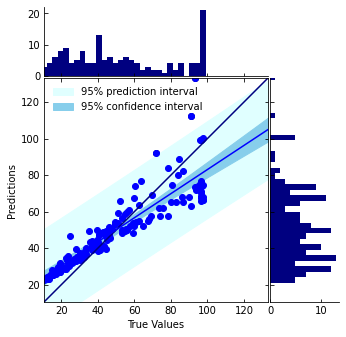

slope 0.55 int 23.35
r2 0.55
r  0.74
mse 346.87


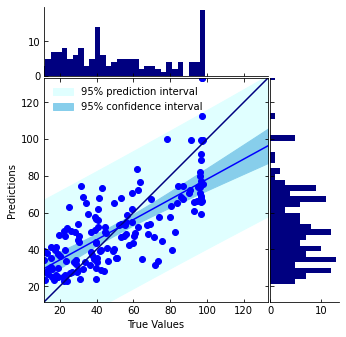

In [47]:
# Nem a metric vs predicted_next plotra vagyok kíváncsi (1)
plot_true_vs_pred_hist_conf(f3['CPU0User%'].values, pred_cpu)

# Hanem a next_metric vs predicted_next plotra (2)
plot_true_vs_pred_hist_conf(f3['CPU0User%Next'].values, pred_cpu)

(152, 2) (152,)
score  = 0.55
coef   = [0.68 0.48]
intcpt = 14.97

slope 0.55 int 23.35
r2 0.55
r  0.74
mse 346.87


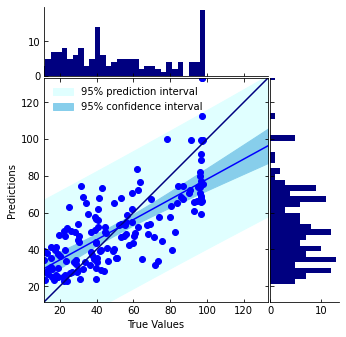

In [52]:
create_model_for_metric('CPU0User%', short=True)

In [54]:
# Egy gyors ellenörzés -> hogy vátozna, ha a 'k' (delta_vm) számát én állítanám be

# m'   = c0 + c1 · m · w/(w + k) + c2 · m · k/(w + k)

_cpu_usage = 90
_actual_vm = 7
_delta_vm = 1

_t1 = _cpu_usage * _actual_vm/(_actual_vm + _delta_vm)
_t2 = _cpu_usage * _delta_vm/(_actual_vm + _delta_vm)

_x = np.array([[_t1, _t2]])

print(_x.shape)
print(_x)

_feature_names_in_ = rr.feature_names_in_
print(_feature_names_in_)

_pred = rr.predict(_x)

print(_pred)

# Jó, a model azt mondja, hogy ha 1 darab VM-t hozzáadok akkor csökkenni fog a CPU Usage

(1, 2)
[[78.75 11.25]]
['cpu_term1' 'cpu_term2']
[73.64531951]


/home/ubuntu/notebook/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(152, 2) (152,)


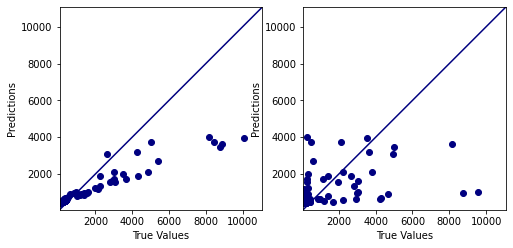

slope 0.24 int 632.70
r2 0.24
r  0.49
mse 1841955.95


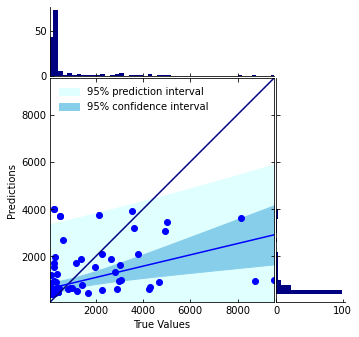

In [55]:
create_model_for_metric('response_time_p95', binwidth=200.0)

(152, 2) (152,)


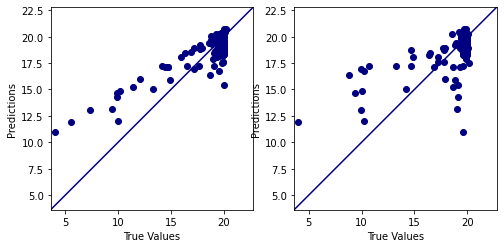

slope 0.42 int 10.87
r2 0.42
r  0.65
mse 4.20


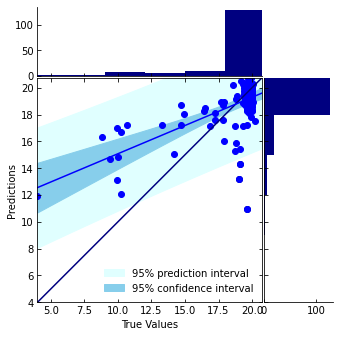

In [56]:
create_model_for_metric('request_rate')

In [57]:
from sklearn.linear_model import LinearRegression

# import pickle
# import os

# os.system('rm -rf ./lr')
# os.system('mkdir ./lr')


def create_model_for_metric(columnname: str, short=False, binwidth=3.0):
    
    f1 = mf.copy()
    __next_name = columnname + 'Next'
    __prev_name = columnname + 'Prev'

    f1[__next_name] = f1[columnname].shift(-1)
    f1[__prev_name] = f1[columnname].shift(+1)
    
    f1 = f1.dropna()

    # Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)
    
    indexAge = f1[ (f1['delta_vm'] == 0) ].index
    f1.drop(indexAge , inplace=True)

    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    f1[__metric_term1] = f1[columnname] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
    f1[__metric_term2] = f1[columnname] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])
    
    __metric_term = f1[[__metric_term1, __metric_term2]]
    __metric_next = f1[__next_name]
    
    print(__metric_term.shape, __metric_next.shape)

    lr = LinearRegression(fit_intercept=True)

    rr = lr.fit(__metric_term, __metric_next)
    
    # A joblib lassú
    # _ = joblib.dump(lr, './lr/lr_' + columnname + '.joblib', compress=9)

    # A pickle gyors - save with pickle
    # f = './lr/'
    # filename = f + str(columnname) + '.pickle'
    # pickle.dump(rr, open(filename, "wb"))
    
    # ------------------------------------

    __fit_score = rr.score(__metric_term, __metric_next)
    
    __fit_coef_ = rr.coef_
    
    __fit_intercept_ = rr.intercept_
    
    __pred_metric = rr.predict(__metric_term)
    
    if short == True:
        with np.printoptions(precision=2, suppress=True):

            print('score  = %.2f' % __fit_score)
            print('coef   =', __fit_coef_)
            print('intcpt = %.2f' % __fit_intercept_)
    
        print()
    
    # Uristen geci bazmeg, hogy én mekkora fasz vagyok
#    plot_true_vs_pred(f1[columnname].values, __pred_metric)
    # Ez itt a before vs pred_next
    # Nem pedig a next vs pred_next
    
#    plot_true_vs_pred(f1[__next_name].values, __pred_metric)
    # ugyan ez
    # plot_true_vs_pred(__metric_next, __pred_metric)

# A fenti kettő helyett van most ez az egy -> hogy egymás mellett legyenek
    if short == False:
        plot_true_vs_pred_two(f1[columnname].values, __pred_metric, f1[__next_name].values, __pred_metric)
    
    plot_true_vs_pred_hist_conf(f1[__next_name].values, __pred_metric, binwidth)


(152, 2) (152,)


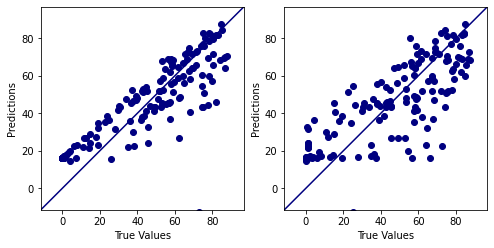

slope 0.60 int 18.34
r2 0.60
r  0.78
mse 306.11


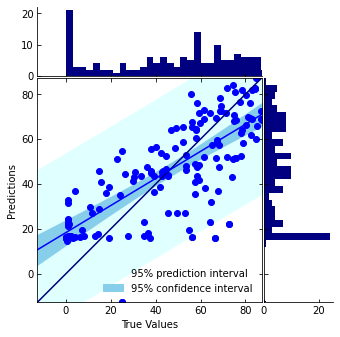

In [58]:
create_model_for_metric('CPU0Idle%')

In [59]:
# Ezek itt a delta_metric_pred, delta_metric_true pred plottok

# Az lr álltal a metrika pred after scaling vs metrika true after scaling értékeket vetik össze.

# True vs Pred

# ------------

# Viszont a score, coef, intercpt értékek a modellből vannak számolva

# Viszont a slope, r2, r, mse viszot a becslés jóságát nézik (pred vs true)

In [60]:
pd.options.display.float_format = "{:,.2f}".format
mf.describe().T

count         mean       std          min          25%  \
response_time_p95     200.00     1,142.90  2,317.09        61.32       194.28   
response_time         200.00       544.40  1,383.35        38.64        81.05   
worker_number         200.00         5.35      2.49         1.00         3.00   
request_rate          200.00        18.29      3.67         1.30        19.30   
CPU0User%             200.00        51.40     28.33         9.80        28.60   
CPU0Idle%             200.00        46.52     28.46         0.00        21.73   
CPU0Total%            200.00        53.34     28.54        11.30        30.77   
[DSK:sda]Reads        200.00         0.07      0.44         0.00         0.00   
[DSK:sda]RMerge       200.00         0.00      0.00         0.00         0.00   
[DSK:sda]RKBytes      200.00         0.96      6.34         0.00         0.00   
[DSK:sda]WaitR        200.00         0.02      0.09         0.00         0.00   
[DSK:sda]Writes       200.00         8.28      8.32         0.40         0.80   
[DSK:sda]WMerge       200.00         2.75      0.81         0.90         2.20   
[DSK:sda]WKBytes      200.00        51.83     40.39         9.10        17.60   
[DSK:sda]WaitW        200.00         0.88      0.47         0.00         0.70   
[DSK:sda]Request      200.00         6.98      1.90         0.50         5.80   
[DSK:sda]QueLen       200.00         0.10      0.08         0.00         0.00   
[DSK:sda]Wait         200.00         0.90      0.47         0.00         0.70   
[DSK:sda]SvcTim       200.00         1.54      0.67         0.00         1.10   
[DSK:sda]Util         200.00         0.44      0.32         0.10         0.30   
[NUMA:0]Used          200.00 1,930,263.78 14,529.16 1,882,856.80 1,924,259.80   
[NUMA:0]Free          200.00   105,104.22 14,529.16    78,055.60    95,946.30   
[NUMA:0]Slab          200.00   156,089.75  2,394.39   151,566.00   153,885.60   
[NUMA:0]Mapped        200.00   110,496.43    655.60   109,228.00   109,950.10   
[NUMA:0]Anon          200.00 1,032,929.85 17,781.40   988,064.00 1,022,047.40   
[NUMA:0]AnonH         200.00     2,048.00      0.00     2,048.00     2,048.00   
[NUMA:0]Inactive      200.00   346,378.60  2,697.57   340,044.80   346,710.40   
[NUMA:0]Hits          200.00       100.00      0.00       100.00       100.00   
[TCPD]InReceives      200.00        34.29     21.64        16.50        20.20   
[TCPD]InDelivers      200.00        34.29     21.64        16.50        20.20   
[TCPD]OutRequests     200.00        33.50     21.34        16.10        19.60   
[TCPD]InSegs          200.00        34.21     21.64        16.50        20.15   
[TCPD]OutSegs         200.00        33.50     21.33        16.10        19.68   
actual_vm_number_is   200.00         5.35      2.49         1.00         3.00   
actual_vm_number_was  199.00         5.36      2.49         1.00         3.00   
actual_vm_number_will 199.00         5.37      2.48         1.00         3.00   
delta_vm              199.00         0.02      1.80        -3.00        -1.00   

                               50%          75%          max  
response_time_p95           302.62       402.99    13,855.32  
response_time               148.65       183.76    10,108.88  
worker_number                 6.00         8.00         8.00  
request_rate                 19.70        19.90        20.20  
CPU0User%                    43.65        76.40        98.20  
CPU0Idle%                    54.50        68.88        88.40  
CPU0Total%                   45.45        78.17       100.00  
[DSK:sda]Reads                0.00         0.00         3.50  
[DSK:sda]RMerge               0.00         0.00         0.00  
[DSK:sda]RKBytes              0.00         0.00        56.20  
[DSK:sda]WaitR                0.00         0.00         0.50  
[DSK:sda]Writes               3.95        17.45        30.40  
[DSK:sda]WMerge               2.65         3.20         6.00  
[DSK:sda]WKBytes             38.40        95.67       155.90  

(152, 2) (152,)


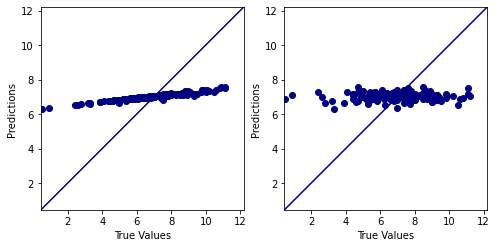

slope 0.01 int 6.93
r2 0.01
r  0.11
mse 3.61


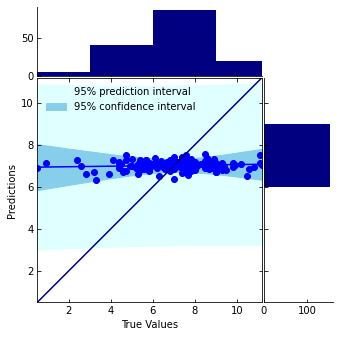

In [61]:
create_model_for_metric('[DSK:sda]Request')

(152, 2) (152,)


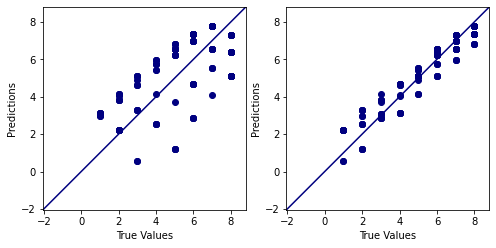

slope 0.89 int 0.58
r2 0.89
r  0.94
mse 0.54


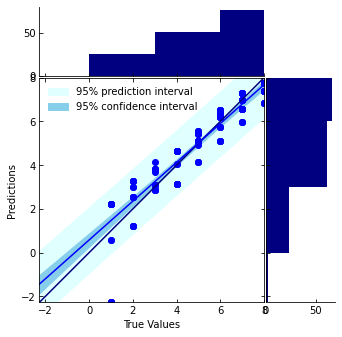

In [62]:
create_model_for_metric('worker_number')

# szerintem valami alapjaiban nem jó

# hogy lehet az, hogy ezt nem képes tökéletesen megmondani?

maaaaaa

In [63]:
from sklearn.linear_model import LinearRegression

def get_all(columnname: str, short=True):
    
    f1 = mf.copy()
    __next_name = columnname + 'Next'
    __prev_name = columnname + 'Prev'

    f1[__next_name] = f1[columnname].shift(-1)
    f1[__prev_name] = f1[columnname].shift(+1)
    
    f1 = f1.dropna()

    # Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)
    
    indexAge = f1[ (f1['delta_vm'] == 0) ].index
    f1.drop(indexAge , inplace=True)
    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    f1[__metric_term1] = f1[columnname] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
    f1[__metric_term2] = f1[columnname] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])
    
    __metric_term = f1[[__metric_term1, __metric_term2]]
    __metric_next = f1[__next_name]

    
    s = (__metric_term.shape, __metric_next.shape)
    

    lr = LinearRegression(fit_intercept=True)
    rr = lr.fit(__metric_term, __metric_next)
    rr.score(__metric_term, __metric_next)

    __fit_score = rr.score(__metric_term, __metric_next)
    __fit_coef_ = rr.coef_
    __fit_intercept_ = rr.intercept_

    __pred_metric = rr.predict(__metric_term)

    if short == False:
        with np.printoptions(precision=2, suppress=True):

            print('score  = %.2f' % __fit_score)
            print('coef   =', __fit_coef_)
            print('intcpt = %.2f' % __fit_intercept_)
    
        print()
    
#--------------------

    true = f1[__next_name].values
    pred = __pred_metric

    
    slope, intercept = np.polyfit(true, pred, 1)  # linear model adjustment
    y_model = np.polyval([slope, intercept], true)   # modeling...

    if short == False:
        print('slope {:.2f} int {:.2f}'.format(slope, intercept))

    true_mean = np.mean(true)
    pred_mean = np.mean(pred)
    n = true.size                     # number of samples
    m = 3                             # number of parameters
    dof = n - m                       # degrees of freedom
    t = stats.t.ppf(0.975, dof)       # Students statistic of interval confidence
    
    residual = true - pred
    
    std_error = (np.sum(residual**2) / dof)**.5   # Standard deviation of the error

    # calculating the r2
    # https://www.statisticshowto.com/probability-and-statistics/coefficient-of-determination-r-squared/
    # Pearson's correlation coefficient
    numerator = np.sum((true - true_mean)*(pred - pred_mean))
    denominator = ( np.sum((true - true_mean)**2) * np.sum((pred - pred_mean)**2) )**.5
    correlation_coef = numerator / denominator
    r2 = correlation_coef**2
    r  = np.sqrt(r2)

    n = true.size
    mse = 1/n * np.sum( (true - pred)**2 )
    
    if short == False:
    
        print('r2 {:.2f}'.format(r2))
        print('r  {:.2f}'.format(r))
        print('mse {:.2f}'.format(mse))

    return {'f1.shape': s,
            'score_or': __fit_score,
            'coef_or': __fit_coef_,
            'intercept_or': __fit_intercept_,
            'slope_tp': slope,
            'intercept_tp': intercept,
            'r2': r2,
            'r': r,
            'mse': mse}

In [64]:
get_all('CPU0Total%')

{'f1.shape': ((152, 2), (152,)),
 'score_or': 0.5535506375772838,
 'coef_or': array([0.67830582, 0.48054041]),
 'intercept_or': 15.467227740539656,
 'slope_tp': 0.5535506375772837,
 'intercept_tp': 23.94378422677619,
 'r2': 0.5535506375772841,
 'r': 0.7440098370164766,
 'mse': 346.67077433545944}

In [65]:
# Fentinek meg az alábbinak azonosnak kell lennie -> ez csak egy ellenőrzés

(152, 2) (152,)
score  = 0.55
coef   = [0.68 0.48]
intcpt = 15.47

slope 0.55 int 23.94
r2 0.55
r  0.74
mse 346.67


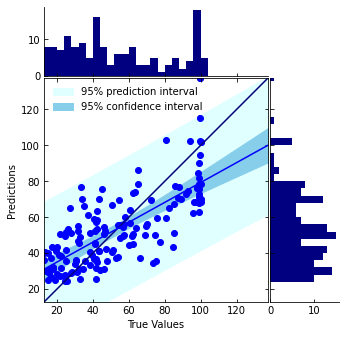

In [66]:
create_model_for_metric('CPU0Total%', short=True, binwidth=4)

In [67]:
print(colored('---------------------------------------', 'yellow'))
print(colored('---------------------------------------', 'red'))
print(colored('---------------------------------------', 'blue'))
print(colored('---------------------------------------', 'green'))
print(colored('---------------------------------------', 'magenta'))
print(colored('---------------------------------------', 'cyan'))

print(colored('--------------', color='red', on_color='on_grey'))

print(colored('--------------', color='red', on_color='on_grey', attrs=['bold']))

print(colored('--------------', color='red', on_color='on_grey', attrs=['bold', 'reverse']))

print(colored('--------------', color='red', on_color='on_grey', attrs=['bold', 'concealed']))

---------------------------------------
---------------------------------------
---------------------------------------
---------------------------------------
---------------------------------------
---------------------------------------
--------------
--------------
--------------
--------------


In [68]:
def get_terms_for_metric(columnname: str):
    
    f1 = mf.copy()
    __next_name = columnname + 'Next'
    __prev_name = columnname + 'Prev'

    f1[__next_name] = f1[columnname].shift(-1)
    f1[__prev_name] = f1[columnname].shift(+1)
    
    f1 = f1.dropna()

    # Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)
    
    indexAge = f1[ (f1['delta_vm'] == 0) ].index
    f1.drop(indexAge , inplace=True)
    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    f1[__metric_term1] = f1[columnname] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
    f1[__metric_term2] = f1[columnname] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])
    
    __metric_term = f1[[__metric_term1, __metric_term2]]
    __metric_next = f1[__next_name]
    
    return __metric_term, __metric_next, f1

## Statmodels vizsgálatok következnek

Amikor a lineáris regressziót a **sklearn.linear_model** helyett a **statsmodels.api** segítségével csinálom meg a lineris regressziót, annem meg van az az előnye, hogy statisztikai mutatókat (t-stat) és confidencia intervallumot tudok rá számolni.

---

Ettől függetlenül a program tényleges felhasználásában a **sklearn** segítségével dolgozok, de egyszer érdemes megvizsgálni azt is, hogy melyik regressziót tagok hatása milyen a modellre.

In [69]:
import statsmodels.api as sm

__metric_term, __metric_next, f1 = get_terms_for_metric('CPU0Total%')

_x = sm.add_constant(__metric_term)

print(type(_x), _x.shape)

model = sm.OLS(__metric_next, _x)

results = model.fit()

print('------------------------------------------------------------------------------')
print(results.summary())
print('------------------------------------------------------------------------------')

print(f'\ncoefficient of determination: \t\t{results.rsquared:.2f}')
print(f'\nadjusted coefficient of determination: \t{results.rsquared_adj:.2f}')
print(f'\nregression coefficients: {results.params}')    
# print(f'predicted response:\n{results.fittedvalues}')
# print(f'predicted response:\n{results.predict(_x.loc[l])}')
print('------------------------------------------------------------------------------')


<class 'pandas.core.frame.DataFrame'> (152, 3)
------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:         CPU0Total%Next   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     92.37
Date:                Tue, 23 May 2023   Prob (F-statistic):           8.09e-27
Time:                        20:07:21   Log-Likelihood:                -660.16
No. Observations:                 152   AIC:                             1326.
Df Residuals:                     149   BIC:                             1335.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]

In [70]:
# Naiv
#  m′ = m · w/(w + k)

In [71]:
import statsmodels.api as sm

__metric_term, __metric_next, f1 = get_terms_for_metric('CPU0Total%')

print(__metric_term.columns)

# Naiv -> csak az első tagot veszem figyelembe
__metric_term = __metric_term.drop(['CPU0Total%_term2'], axis=1)

_x = sm.add_constant(__metric_term)

print(type(_x), _x.shape)

model = sm.OLS(__metric_next, _x)

results = model.fit()

print('------------------------------------------------------------------------------')
print(results.summary())
print('------------------------------------------------------------------------------')

print(f'\ncoefficient of determination: \t\t{results.rsquared:.2f}')
print(f'\nadjusted coefficient of determination: \t{results.rsquared_adj:.2f}')
print(f'\nregression coefficients: {results.params}')    
# print(f'predicted response:\n{results.fittedvalues}')
# print(f'predicted response:\n{results.predict(_x.loc[l])}')
print('------------------------------------------------------------------------------')


Index(['CPU0Total%_term1', 'CPU0Total%_term2'], dtype='object')
<class 'pandas.core.frame.DataFrame'> (152, 2)
------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:         CPU0Total%Next   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     88.89
Date:                Tue, 23 May 2023   Prob (F-statistic):           7.34e-17
Time:                        20:07:46   Log-Likelihood:                -686.08
No. Observations:                 152   AIC:                             1376.
Df Residuals:                     150   BIC:                             1382.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    

In [72]:
# Paraszt

# m' = b0 + b1*m + b2*w + b3*k

In [73]:
def get_terms_for_metric_paraszt(columnname: str):
    
    f1 = mf.copy()
    __next_name = columnname + 'Next'
    __prev_name = columnname + 'Prev'

    f1[__next_name] = f1[columnname].shift(-1)
    f1[__prev_name] = f1[columnname].shift(+1)
    
    f1 = f1.dropna()

    # Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)
    
    indexAge = f1[ (f1['delta_vm'] == 0) ].index
    f1.drop(indexAge , inplace=True)
    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    __metric_term3 = columnname + '_term3'
    
    # By the way adhatnék az oszlopoknak normális nevet is
    __metric_term1 = columnname
    __metric_term2 = 'worker_number'
    __metric_term3 = 'delta_vm'
    
    f1[__metric_term1] = f1[columnname]
    f1[__metric_term2] = f1['worker_number']
    f1[__metric_term3] = f1['delta_vm']
    
    __metric_term = f1[[__metric_term1, __metric_term2, __metric_term3]]
    __metric_next = f1[__next_name]
    
    return __metric_term, __metric_next, f1

In [74]:
import statsmodels.api as sm

# Paraszt ->
__metric_term, __metric_next, f1 = get_terms_for_metric_paraszt('CPU0Total%')

_x = sm.add_constant(__metric_term)

print(type(_x), _x.shape)

model = sm.OLS(__metric_next, _x)

results = model.fit()

print('------------------------------------------------------------------------------')
print(results.summary())
print('------------------------------------------------------------------------------')

print(f'\ncoefficient of determination: \t\t{results.rsquared:.2f}')
print(f'\nadjusted coefficient of determination: \t{results.rsquared_adj:.2f}')
print(f'\nregression coefficients: {results.params}')    
# print(f'predicted response:\n{results.fittedvalues}')
# print(f'predicted response:\n{results.predict(_x.loc[l])}')
print('------------------------------------------------------------------------------')


<class 'pandas.core.frame.DataFrame'> (152, 4)
------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:         CPU0Total%Next   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     105.0
Date:                Tue, 23 May 2023   Prob (F-statistic):           1.79e-36
Time:                        20:07:58   Log-Likelihood:                -634.77
No. Observations:                 152   AIC:                             1278.
Df Residuals:                     148   BIC:                             1290.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--

In [75]:


# Egy dologra kiv vok ha most össze nézem a három megoldást

# (original, naiv, paraszt)

# r2
# original: 0.538
# naiv:     0.215
# pararszt: 0.695


# ---------------------------------------------------------


# Most jönne egy nagyon érdekes dolog

# Mögé tenni egy másik metrika értékét is



In [76]:
def get_terms_for_metric_ultra_paraszt(columnname: str, extra: str):
    
    f1 = mf.copy()
    __next_name = columnname + 'Next'
    __prev_name = columnname + 'Prev'

    f1[__next_name] = f1[columnname].shift(-1)
    f1[__prev_name] = f1[columnname].shift(+1)
    
    f1 = f1.dropna()

    # Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)
    
    indexAge = f1[ (f1['delta_vm'] == 0) ].index
    f1.drop(indexAge , inplace=True)
    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    __metric_term3 = columnname + '_term3'
    __metric_term4 = extra + 'term4'

    # Normális elnevezés (a fenti helyett)
    __metric_term1 = columnname
    __metric_term2 = 'worker_number'
    __metric_term3 = 'delta_vm'
    __metric_term4 = extra    
    
    print('oooooooooooooooooooooooooooooooooooooooooo')
    print('      MODEL ULTRA PARASZ (AKA EXTRA)      ') 
    print('oooooooooooooooooooooooooooooooooooooooooo')
    print(__metric_term1)
    print(__metric_term2)
    print(__metric_term3)
    print(__metric_term4)
    print('oooooooooooooooooooooooooooooooooooooooooo')
    
    
    f1[__metric_term1] = f1[columnname]
    f1[__metric_term2] = f1['worker_number']
    f1[__metric_term3] = f1['delta_vm']
    f1[__metric_term4] = f1[extra]
    
    __metric_term = f1[[__metric_term1, __metric_term2, __metric_term3, __metric_term4]]
    __metric_next = f1[__next_name]
    
    return __metric_term, __metric_next, f1

In [77]:
import statsmodels.api as sm

# Ultra Paraszt ->
__metric_term, __metric_next, f1 = get_terms_for_metric_ultra_paraszt('CPU0Total%', 'CPU0User%')

_x = sm.add_constant(__metric_term)

print(type(_x), _x.shape)

model = sm.OLS(__metric_next, _x)

results = model.fit()

print('------------------------------------------------------------------------------')
print(results.summary())
print('------------------------------------------------------------------------------')

print(f'\ncoefficient of determination: \t\t{results.rsquared:.2f}')
print(f'\nadjusted coefficient of determination: \t{results.rsquared_adj:.2f}')
print(f'\nregression coefficients: {results.params}')    
print('------------------------------------------------------------------------------')


oooooooooooooooooooooooooooooooooooooooooo
      MODEL ULTRA PARASZ (AKA EXTRA)      
oooooooooooooooooooooooooooooooooooooooooo
CPU0Total%
worker_number
delta_vm
CPU0User%
oooooooooooooooooooooooooooooooooooooooooo
<class 'pandas.core.frame.DataFrame'> (152, 5)
------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:         CPU0Total%Next   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     78.22
Date:                Tue, 23 May 2023   Prob (F-statistic):           2.00e-35
Time:                        20:08:01   Log-Likelihood:                -634.76
No. Observations:                 152   AIC:                             1280.
Df Residuals:                     147   BIC:                             1295.
Df Model:                 

In [78]:


# Marad a kérdés, hogy mit adjunk hozzá extra-ként hogy javuljon a becslés

# Az eredeti (0.580)-ről sikerül felmenni (0.623) +



<a id="experimental"></a>

# Ez itt most egy kisérleti szakasz

Ez a szakasz nem szükséges a tényleges műkdödéshez.

---

De kiváncsi vagyok a következő dologra.

**Lehet-e javítani a regressziós modelt?** másik metrika bevonásával?

Sajnos a lehetséges kombinációk száma nagyon sok (original, naiv, paraszt)

Ezért ez a szakasz itt igen hosszú lesz.

Ezért készítek néhány linket amellyel át lehet ugrani az egészet és onnan folytatni.

---

**Spoiler:** Annyi kiderült, hogy nem igazán érdemes most még baszakodni azzal, hogy extra változókat adok hozzá. Ha valamit érdemes megfonolni, hogy az **original** modell alapján érdemes dolgozni és a **naiv** illetve a **paraszt** modelleket el kell felejteni.

[Szakasz átugrása](#cont)

In [79]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [80]:
cn = mf.columns[4:-4]

In [81]:

# csak át akarom pörgetni nézni, hogy milyen eredményeket ad extra változókra a paraszt

def tmp(extra: str):

    # Ultra Paraszt ->
    __metric_term, __metric_next, f1 = get_terms_for_metric_ultra_paraszt('CPU0Total%', extra)

    _x = sm.add_constant(__metric_term)

    model = sm.OLS(__metric_next, _x)

    results = model.fit()

    print('------------------------------------------------------------------------------')
    print(results.summary())
    print('------------------------------------------------------------------------------')

    print(f'\ncoefficient of determination: \t\t{results.rsquared:.2f}')
    print(f'\nadjusted coefficient of determination: \t{results.rsquared_adj:.2f}')
    print(f'\nregression coefficients: {results.params}')    
    print('------------------------------------------------------------------------------')


In [82]:
interact(tmp, extra=cn);

interactive(children=(Dropdown(description='extra', options=('response_time', 'worker_number', 'request_rate',…

In [83]:


# Ugyan ez az original modell alapján (nincs közöttük interakció)



In [84]:
def get_terms_for_metric_with_extra(columnname: str, extra: str):
    
    f1 = mf.copy()
    __next_name = columnname + 'Next'
    __prev_name = columnname + 'Prev'

    f1[__next_name] = f1[columnname].shift(-1)
    f1[__prev_name] = f1[columnname].shift(+1)
    
    f1 = f1.dropna()

    # Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)
    
    indexAge = f1[ (f1['delta_vm'] == 0) ].index
    f1.drop(indexAge , inplace=True)
    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    __metric_term3 = extra + '_term1'
    __metric_term4 = extra + '_term2'
    f1[__metric_term1] = f1[columnname] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
    f1[__metric_term2] = f1[columnname] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])

    f1[__metric_term3] = f1[extra] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
    f1[__metric_term4] = f1[extra] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])
    
    __metric_term = f1[[__metric_term1, __metric_term2, __metric_term3, __metric_term4]]
    __metric_next = f1[__next_name]
    
    return __metric_term, __metric_next, f1

In [85]:

# csak át akarom pörgetni nézni, hogy milyen eredményeket ad extra változókra a paraszt

def tmp(extra: str):

    # Origina wit Extra ->
    __metric_term, __metric_next, f1 = get_terms_for_metric_with_extra('CPU0Total%', extra)

    _x = sm.add_constant(__metric_term)

    model = sm.OLS(__metric_next, _x)

    results = model.fit()

    print('------------------------------------------------------------------------------')
    print(results.summary())
    print('------------------------------------------------------------------------------')

    print(f'\ncoefficient of determination: \t\t{results.rsquared:.2f}')
    print(f'\nadjusted coefficient of determination: \t{results.rsquared_adj:.2f}')
    print(f'\nregression coefficients: {results.params}')    
    print('------------------------------------------------------------------------------')


In [86]:
interact(tmp, extra=cn);

interactive(children=(Dropdown(description='extra', options=('response_time', 'worker_number', 'request_rate',…

In [87]:


# Ugyanez az original modellel (de még az interakciót is hozzáadom)



In [88]:
def get_terms_for_metric_with_extra_and_interaction(columnname: str, extra: str):
    
    f1 = mf.copy()
    __next_name = columnname + 'Next'
    __prev_name = columnname + 'Prev'

    f1[__next_name] = f1[columnname].shift(-1)
    f1[__prev_name] = f1[columnname].shift(+1)
    
    f1 = f1.dropna()

    # Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)
    
    indexAge = f1[ (f1['delta_vm'] == 0) ].index
    f1.drop(indexAge , inplace=True)
    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    __metric_term3 = extra + '_term1'
    __metric_term4 = extra + '_term2'
    __metric_term5 = columnname + '_' + extra
    f1[__metric_term1] = f1[columnname] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
    f1[__metric_term2] = f1[columnname] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])

    f1[__metric_term3] = f1[extra] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
    f1[__metric_term4] = f1[extra] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])
    
    f1[__metric_term5] = f1[columnname] * f1[extra]
    
    __metric_term = f1[[__metric_term1, __metric_term2, __metric_term3, __metric_term4, __metric_term5]]
    __metric_next = f1[__next_name]
    
    return __metric_term, __metric_next, f1

In [89]:

# csak át akarom pörgetni nézni, hogy milyen eredményeket ad extra változókra a paraszt

def tmp(extra: str):

    # Origina wit Extra ->
    __metric_term, __metric_next, f1 = get_terms_for_metric_with_extra_and_interaction('CPU0Total%', extra)

    _x = sm.add_constant(__metric_term)

    model = sm.OLS(__metric_next, _x)

    results = model.fit()

    print('------------------------------------------------------------------------------')
    print(results.summary())
    print('------------------------------------------------------------------------------')

    print(f'\ncoefficient of determination: \t\t{results.rsquared:.2f}')
    print(f'\nadjusted coefficient of determination: \t{results.rsquared_adj:.2f}')
    print(f'\nregression coefficients: {results.params}')    
    print('------------------------------------------------------------------------------')


In [90]:
interact(tmp, extra=cn);

interactive(children=(Dropdown(description='extra', options=('response_time', 'worker_number', 'request_rate',…

In [91]:
__metric_term.columns

Index(['CPU0Total%', 'worker_number', 'delta_vm', 'CPU0User%'], dtype='object')

Original
slope 0.55 int 23.94
r2 0.55
r  0.74
mse 346.67


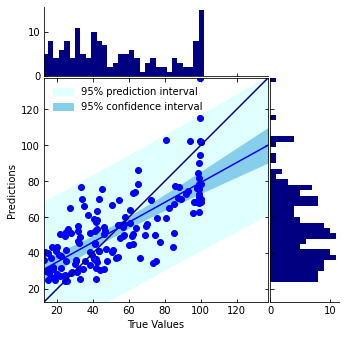

slope 0.37 int 33.68
r2 0.37
r  0.61
mse 487.58


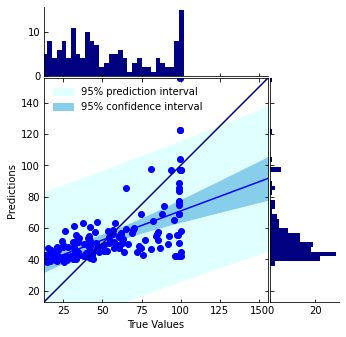

Naiv
slope 0.68 int 17.14
r2 0.68
r  0.82
mse 248.22


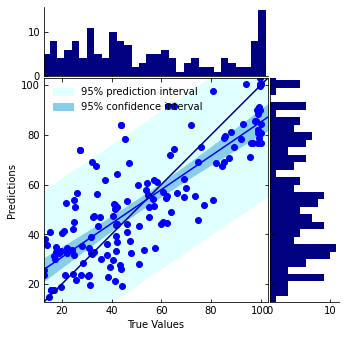

oooooooooooooooooooooooooooooooooooooooooo
      MODEL ULTRA PARASZ (AKA EXTRA)      
oooooooooooooooooooooooooooooooooooooooooo
CPU0Total%
worker_number
delta_vm
[TCPD]OutSegs
oooooooooooooooooooooooooooooooooooooooooo
Ultra Paraszt
slope 0.70 int 16.04
r2 0.70
r  0.84
mse 232.23


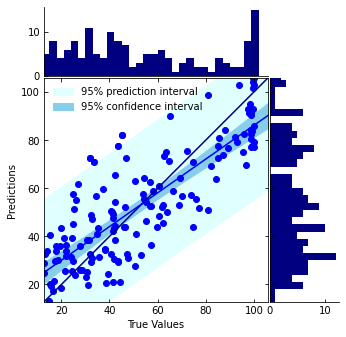

Original with extra
slope 0.60 int 21.39
r2 0.60
r  0.78
mse 309.76


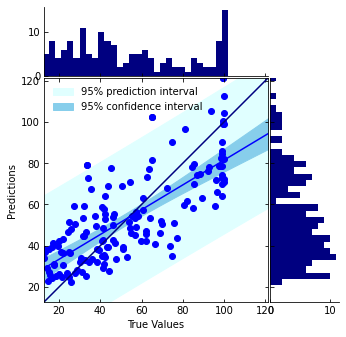

Original with extra interact
slope 0.61 int 20.73
r2 0.61
r  0.78
mse 300.20


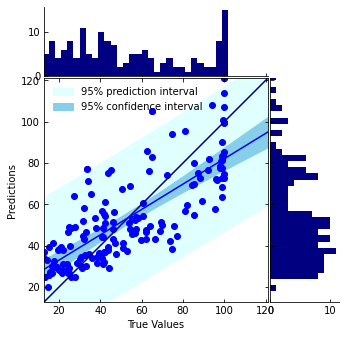

In [92]:

# A megfigyelés az, hogy bár az összes metrika - metrika kapcsolatot nem vizsgáltam végig

# De például a CPU0Total% esetében a [TCPD]OutSegs változóval és azok interakciójával kiegészítve
# valamennyit javult a CPU0Total% becslése (0.580 -> 0.700) (de ez úgy amúgy semmi)

# Kivi vagyok, hogy ha ezt grafikusan ábrázolom akkor mi a helyzet


extra = '[TCPD]OutSegs'
metric = 'CPU0Total%'
metric_next = metric + 'Next'



# 0. (Original)
__metric_term, __metric_next, f1 = get_terms_for_metric(metric)

_x = sm.add_constant(__metric_term)
model = sm.OLS(__metric_next, _x)
results = model.fit()
pred = results.predict(_x)
pred = results.fittedvalues

print('Original')
# plot_true_vs_pred_two(f1[metric].values, pred, f1[metric_next].values, pred)
plot_true_vs_pred_hist_conf(f1[metric_next].values, pred, 3.0)

# 1. (Naiv)
__metric_term, __metric_next, f1 = get_terms_for_metric(metric)

# Naiv -> csak az első tagot veszem figyelembe
__metric_term = __metric_term.drop([metric + '_term2'], axis=1)

_x = sm.add_constant(__metric_term)
model = sm.OLS(__metric_next, _x)
results = model.fit()
pred = results.predict(_x)
pred = results.fittedvalues

# plot_true_vs_pred_two(f1[metric].values, pred, f1[metric_next].values, pred)
plot_true_vs_pred_hist_conf(f1[metric_next].values, pred, 3.0)

# 2.
__metric_term, __metric_next, f1 = get_terms_for_metric_paraszt(metric)

_x = sm.add_constant(__metric_term)
model = sm.OLS(__metric_next, _x)
results = model.fit()
pred = results.predict(_x)
pred = results.fittedvalues

print('Naiv')
# plot_true_vs_pred_two(f1[metric].values, pred, f1[metric_next].values, pred)
plot_true_vs_pred_hist_conf(f1[metric_next].values, pred, 3.0)

# 3.
__metric_term, __metric_next, f1 = get_terms_for_metric_ultra_paraszt(metric, extra)

_x = sm.add_constant(__metric_term)
model = sm.OLS(__metric_next, _x)
results = model.fit()
pred = results.predict(_x)
pred = results.fittedvalues

print('Ultra Paraszt')
# plot_true_vs_pred_two(f1[metric].values, pred, f1[metric_next].values, pred)
plot_true_vs_pred_hist_conf(f1[metric_next].values, pred, 3.0)

# 4.
__metric_term, __metric_next, f1 = get_terms_for_metric_with_extra(metric, extra)

_x = sm.add_constant(__metric_term)
model = sm.OLS(__metric_next, _x)
results = model.fit()
pred = results.predict(_x)
pred = results.fittedvalues

print('Original with extra')
# plot_true_vs_pred_two(f1[metric].values, pred, f1[metric_next].values, pred)
plot_true_vs_pred_hist_conf(f1[metric_next].values, pred, 3.0)


# 5.
__metric_term, __metric_next, f1 = get_terms_for_metric_with_extra_and_interaction(metric, extra)

_x = sm.add_constant(__metric_term)
model = sm.OLS(__metric_next, _x)
results = model.fit()
pred = results.predict(_x)
pred = results.fittedvalues

print('Original with extra interact')
# plot_true_vs_pred_two(f1[metric].values, pred, f1[metric_next].values, pred)
plot_true_vs_pred_hist_conf(f1[metric_next].values, pred, 3.0)

In [93]:


# Megfigyelés

# Egy metrikát a CPU0Total% -ot végig néztem az original, a naiv, a paraszt, a paraszt extra, az original extra
# és az original extra with interaction segítségével.

# Igazából a többi metrikát is végig kéne néznem a többi metrikával kombinálva.. [ez elég sok]

# Ami most látszik, hogy :

# - a Naiv és a Paraszt valóban nem jó

#   Nem csak azért mert az illeszkedés kevésbé pontos, hanem jelentkezik a hetereoscendaszticitás jelensége is
#  (nem független a residuális hiba tag)


# Ez ráadásul csak egy típusu feladat, lehet, hogy más feladatnál más összefüggések jönnek ki


# Ugyanakkor a CPU0Total% egy olyan metrika amit már eleve jól becsült az LR


In [94]:

# Megpróbálom egy olyannál is ahol az original becslés nem volt annyira jó

# [DSK:sda]Reads
# [DSK:sda]RKBytes
# [DSK:sda]RMerge
# [DSK:sda]Request
# [DSK:sda]Wait
# [DSK:sda]WaitR
# [DSK:sda]Util   -> '[TCPD]OutSegs', 'CPU0Total%'
# [NUMA:0]Free
# [NUMA:0]Mapped  -> '[NUMA:0]Used', '[TCPD]OutSegs', 'CPU0Total%'
# [NUMA:0]Inactive

Original
slope 0.55 int 23.35
r2 0.55
r  0.74
mse 346.87


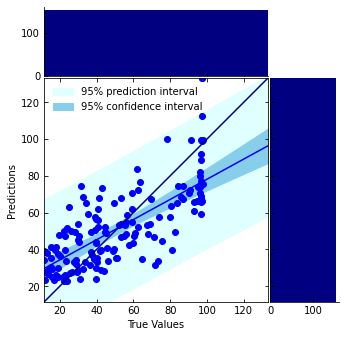

Original Extra with Interaction
slope 0.63 int 19.13
r2 0.63
r  0.79
mse 284.11


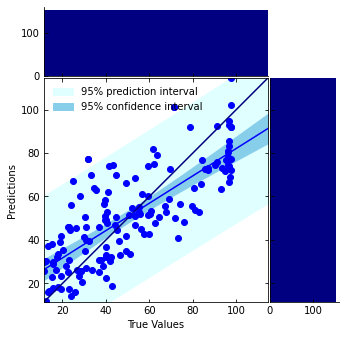

In [95]:

extra = 'CPU0Total%'
extra = '[TCPD]OutSegs'
extra = '[DSK:sda]Writes'
extra = '[NUMA:0]Used'


metric = 'CPU0User%'
metric_next = metric + 'Next'

bins = 10000.0

# 0. (Original)
__metric_term, __metric_next, f1 = get_terms_for_metric(metric)

_x = sm.add_constant(__metric_term)
model = sm.OLS(__metric_next, _x)
results = model.fit()
pred = results.predict(_x)
pred = results.fittedvalues

print('Original')
# plot_true_vs_pred_two(f1[metric].values, pred, f1[metric_next].values, pred)
plot_true_vs_pred_hist_conf(f1[metric_next].values, pred, bins)


# 5.
__metric_term, __metric_next, f1 = get_terms_for_metric_with_extra_and_interaction(metric, extra)

_x = sm.add_constant(__metric_term)
model = sm.OLS(__metric_next, _x)
results = model.fit()
pred = results.predict(_x)
pred = results.fittedvalues

print('Original Extra with Interaction')
# plot_true_vs_pred_two(f1[metric].values, pred, f1[metric_next].values, pred)
plot_true_vs_pred_hist_conf(f1[metric_next].values, pred, bins)

In [96]:

# Megfigyelés

# Nem igazán segít ha hozzáadok a modellhez egy egy változót


In [97]:

# Tényleg csak kiviből, mi van ha az összeset hozzáadom


In [98]:
names = [
    'CPU0User%', 'CPU0Idle%', 'CPU0Total%', '[DSK:sda]Reads',
    '[DSK:sda]RMerge', '[DSK:sda]RKBytes', '[DSK:sda]WaitR', '[DSK:sda]Writes',
    '[DSK:sda]WMerge', '[DSK:sda]WKBytes', '[DSK:sda]WaitW',
    '[DSK:sda]Request', '[DSK:sda]Wait', '[DSK:sda]SvcTim', '[DSK:sda]Util',
    '[NUMA:0]Used', '[NUMA:0]Free', '[NUMA:0]Slab', '[NUMA:0]Mapped',
    '[NUMA:0]Anon', '[NUMA:0]Inactive', '[TCPD]InReceives', '[TCPD]InDelivers',
    '[TCPD]OutRequests', '[TCPD]InSegs', '[TCPD]OutSegs'
]

In [99]:
def get_terms_for_metric_with_all(columnname: str):
    
    f1 = mf.copy()
    __next_name = columnname + 'Next'
    __prev_name = columnname + 'Prev'

    f1[__next_name] = f1[columnname].shift(-1)
    f1[__prev_name] = f1[columnname].shift(+1)
    
    f1 = f1.dropna()

    # Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)
    
    indexAge = f1[ (f1['delta_vm'] == 0) ].index
    f1.drop(indexAge , inplace=True)
    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    f1[__metric_term1] = f1[columnname] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
    f1[__metric_term2] = f1[columnname] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])
    
    __terms = []
    
    __terms.append(__metric_term1)
    __terms.append(__metric_term2)
    
    for name in names:
        __metric_term_a = name + 'term1'
        __metric_term_b = name + 'term2'
        __metric_term_c = name + 'term3'
        
        f1[__metric_term_a] = f1[name] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
        f1[__metric_term_b] = f1[name] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])
        f1[__metric_term_c] = f1[columnname] * f1[name]
    
        __terms.append(__metric_term_a)
        __terms.append(__metric_term_b)
        __terms.append(__metric_term_c)
    
    # __metric_term = f1[[__metric_term1, __metric_term2, __metric_term3, __metric_term4, __metric_term5]]
    __metric_term = f1[__terms]
    __metric_next = f1[__next_name]
    
    return __metric_term, __metric_next, f1

In [100]:
def tmp(metric):

    metric = metric
    metric_next = metric + 'Next'

    bins = 10000.0

    # 0. (Original)
    __metric_term, __metric_next, f1 = get_terms_for_metric(metric)

    _x = sm.add_constant(__metric_term)
    model = sm.OLS(__metric_next, _x)
    results = model.fit()
    pred = results.predict(_x)
    pred = results.fittedvalues

    # print('Original')
    # plot_true_vs_pred_two(f1[metric].values, pred, f1[metric_next].values, pred)
    plot_true_vs_pred_hist_conf(f1[metric_next].values, pred, bins)


    # 6. (All)
    __metric_term, __metric_next, f1 = get_terms_for_metric_with_all(metric)

    _x = sm.add_constant(__metric_term)
    model = sm.OLS(__metric_next, _x)
    results = model.fit()
    pred = results.predict(_x)
    pred = results.fittedvalues

    # print('Original with All and interaction')
    # plot_true_vs_pred_two(f1[metric].values, pred, f1[metric_next].values, pred)
    plot_true_vs_pred_hist_conf(f1[metric_next].values, pred, bins)

In [101]:
interact(tmp, metric=cn);

interactive(children=(Dropdown(description='metric', options=('response_time', 'worker_number', 'request_rate'…

In [102]:


# A tanulság

# Ha mindegyiket mellé veszem akkor egyes változókat fel lehet hozni,
# Néhányat ami jó még jobbá tenni

# Kérdés persze, hogy mükdöik-e ez az életben, de az LR becslésük, hogy hova kerülnek
# egy felskálázás után az biztosan javul



In [103]:
# Amire egyébként még kivi lennék

# Csak megnézni egy olyan változót ahol nagy a javulás, hogy sm reg alapján mely változók okozzák a javulást

In [104]:

def vmp(metric):

    metric = metric
    metric_next = metric + 'Next'

    bins = 10000.0

    # 0. (Original)
    __metric_term, __metric_next, f1 = get_terms_for_metric(metric)

    _x = sm.add_constant(__metric_term)
    model = sm.OLS(__metric_next, _x)
    results = model.fit()
    pred = results.predict(_x)
    pred = results.fittedvalues

    # print('Original')
    # plot_true_vs_pred_two(f1[metric].values, pred, f1[metric_next].values, pred)
    plot_true_vs_pred_hist_conf(f1[metric_next].values, pred, bins)


    # 6. (All)
    __metric_term, __metric_next, f1 = get_terms_for_metric_with_all(metric)

    _x = sm.add_constant(__metric_term)
    model = sm.OLS(__metric_next, _x)
    results = model.fit()
    pred = results.predict(_x)
    pred = results.fittedvalues

    # print('Original with All and interaction')
    # plot_true_vs_pred_two(f1[metric].values, pred, f1[metric_next].values, pred)
    plot_true_vs_pred_hist_conf(f1[metric_next].values, pred, bins)
    
    print('------------------------------------------------------------------------------')
    print(results.summary())
    print('------------------------------------------------------------------------------')

    print(f'\ncoefficient of determination: \t\t{results.rsquared:.2f}')
    print(f'\nadjusted coefficient of determination: \t{results.rsquared_adj:.2f}')
    # print(f'\nregression coefficients: {results.params}')    
    print('------------------------------------------------------------------------------')

In [105]:
interact(vmp, metric=cn);

interactive(children=(Dropdown(description='metric', options=('response_time', 'worker_number', 'request_rate'…

In [106]:

# A következtetés az, hogy vannak változók amelyek esetében tényleg jól fel lehet javítani a becslést,
# de csak azokat szabad majd figyelembe venni az RT becslésénél amelyeknek az LR becslése elég jó.


In [107]:

def pmp(metric):
    
    returns = []

    metric = metric
    metric_next = metric + 'Next'

    # 0. (Original)
    __metric_term, __metric_next, f1 = get_terms_for_metric(metric)

    _x = sm.add_constant(__metric_term)
    model = sm.OLS(__metric_next, _x)
    results = model.fit()
    pred = results.predict(_x)
    pred = results.fittedvalues
    
    returns.append(results.rsquared_adj)


    # 6. (All)
    __metric_term, __metric_next, f1 = get_terms_for_metric_with_all(metric)

    _x = sm.add_constant(__metric_term)
    model = sm.OLS(__metric_next, _x)
    results = model.fit()
    pred = results.predict(_x)
    pred = results.fittedvalues
    
    returns.append(results.rsquared_adj)

    # print(f'\nadjusted coefficient of determination: \t{results.rsquared_adj:.2f}')
    
    return returns


In [108]:
results = []

for metric in cn:
    adj_r = pmp(metric)
    result = [metric]
    for _ in adj_r:
        result.append(_)
    results.append(result)

ad = pd.DataFrame(results, columns=['metric', 'original', 'full'])

ad['original'] = ad['original'].apply(lambda x: float("{:.2f}".format(x)))
ad['full'] = ad['full'].apply(lambda x: float("{:.2f}".format(x)))

/home/ubuntu/notebook/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/home/ubuntu/notebook/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [109]:
def color(val):
    if val > 0.9:
        color = 'green'
    elif val > 0.8:
        color = 'orange'
    else:
        color = 'yellow'
    return 'background-color: %s' % color

pd.options.display.float_format = "{:,.4f}".format
pd.set_option('display.precision', 2)
ad.style.applymap(color, subset=['original','full'])

In [110]:
pd.reset_option('^display.', silent=True)

In [112]:

# Tehát végül is itt látszik, hogy melyik metrikán sikerült javítani és mennyivel azáltal, hogy az összes
# többi metrikával becsültük


<a id="cont"></a>

## Kísérleti szakasz vége

Végeztem azzal amit meg akartam vizsgálni.

[Vissza a kísérleti szakasz elejére](#experimental)

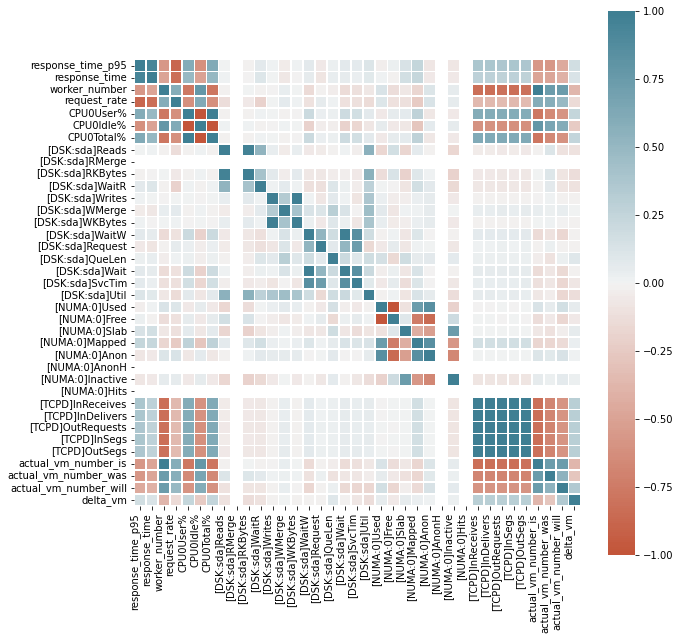

In [113]:
# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap

corr = mf.corr()
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=False, linewidths=0.5, ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [114]:
input_variables = ['CPU0User%', 'CPU0Idle%', '[NUMA:0]Slab', '[NUMA:0]Mapped', '[NUMA:0]Anon', '[TCPD]InReceives', 'request_rate', 'response_time', 'worker_number']

In [115]:
def color(val):
    luma = 100 - ((val * 50) + 50)
    luma = int(luma)
    luma = str(luma) + '%'
    color = 'hsl(9, 100%, 64%)'
    color = 'hsl(9, 100%, ' + luma + ')'
    font = 'white'
    return 'background-color: %s; color: %s' % (color, font)

In [116]:
pd.options.display.float_format = "{:,.2f}".format
pd.set_option('display.precision', 5) # u.a.mint lent
pd.options.display.precision = 3      # u.a mint fönt
_ = mf[input_variables].corr()
_.style.applymap(color)
# display(_)

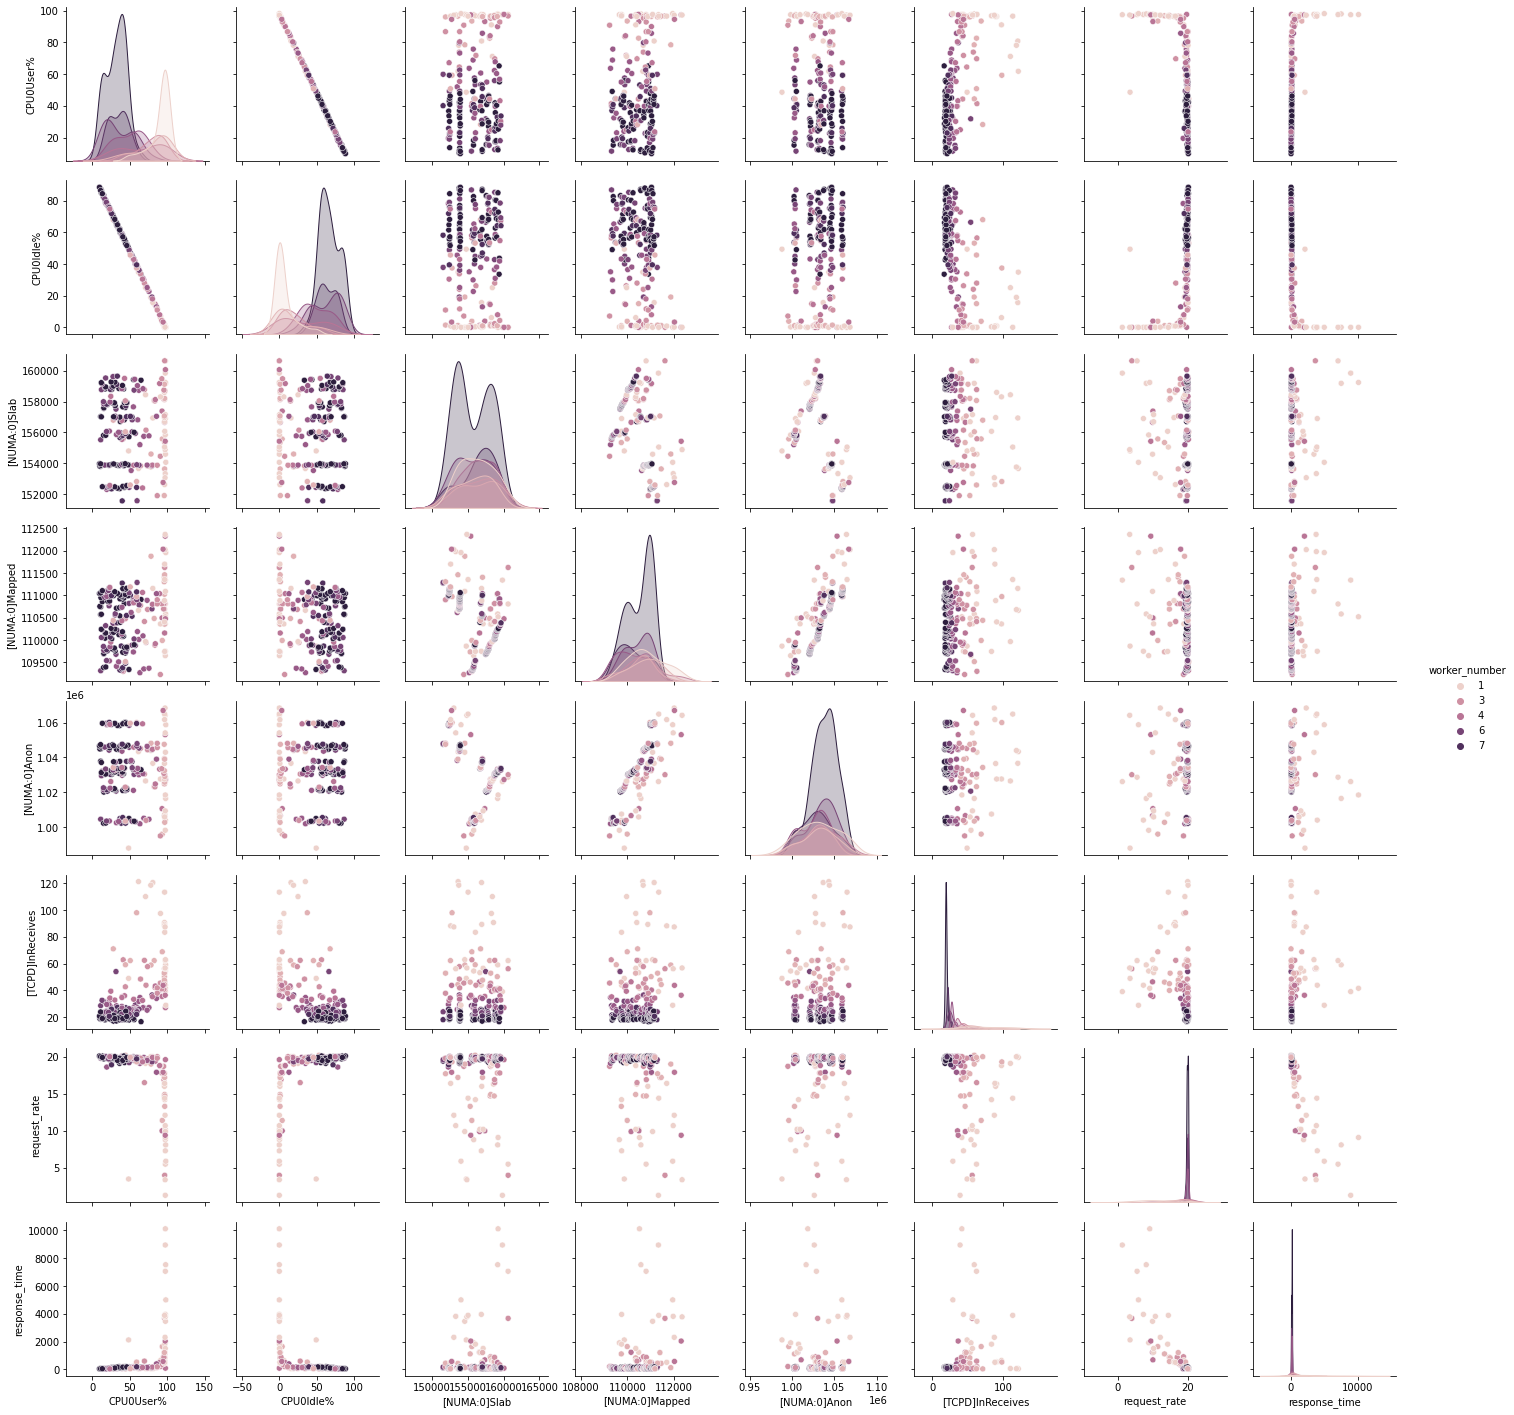

In [117]:
sns.pairplot(mf[input_variables], hue='worker_number')
plt.show()

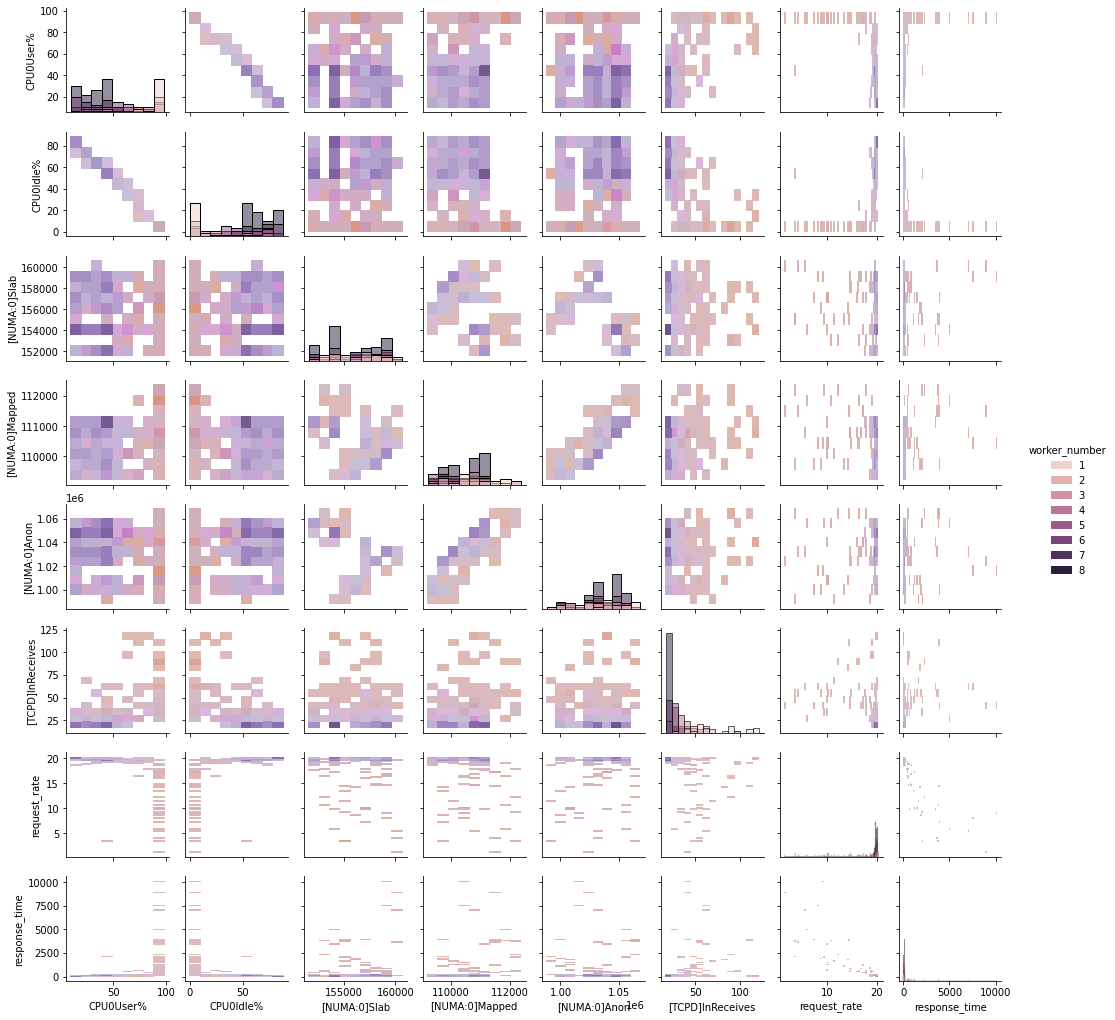

In [118]:
sns.pairplot(mf[input_variables], hue='worker_number', kind='hist', height=1.8)
plt.show()

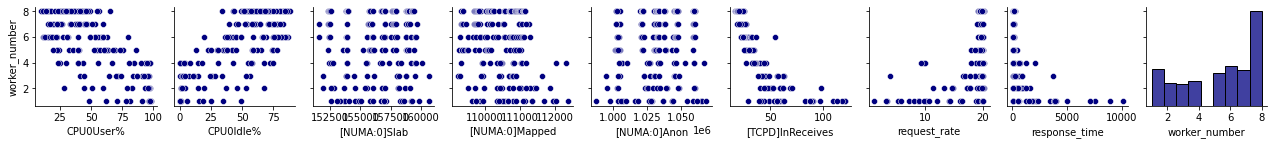

In [120]:
sns.pairplot(
    mf,
    x_vars=input_variables,
    y_vars=['worker_number'],
    height=2.0
); plt.show()

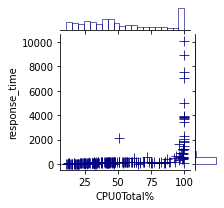

In [121]:
sns.jointplot(
    height=3.0,
    data=mf, x='CPU0Total%', y='response_time',
    marker="+", s=100, marginal_kws=dict(bins=20, fill=False),
); plt.show()

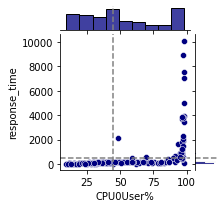

In [122]:
g = sns.JointGrid(data=mf, x='CPU0User%', y='response_time', height=3.0)
g.plot(sns.scatterplot, sns.histplot)
g.refline(x=45, y=500); plt.show()

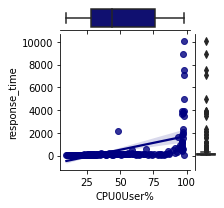

In [123]:
g = sns.JointGrid(data=mf, x='CPU0User%', y='response_time', height=3.0)
g.plot(sns.regplot, sns.boxplot); plt.show()

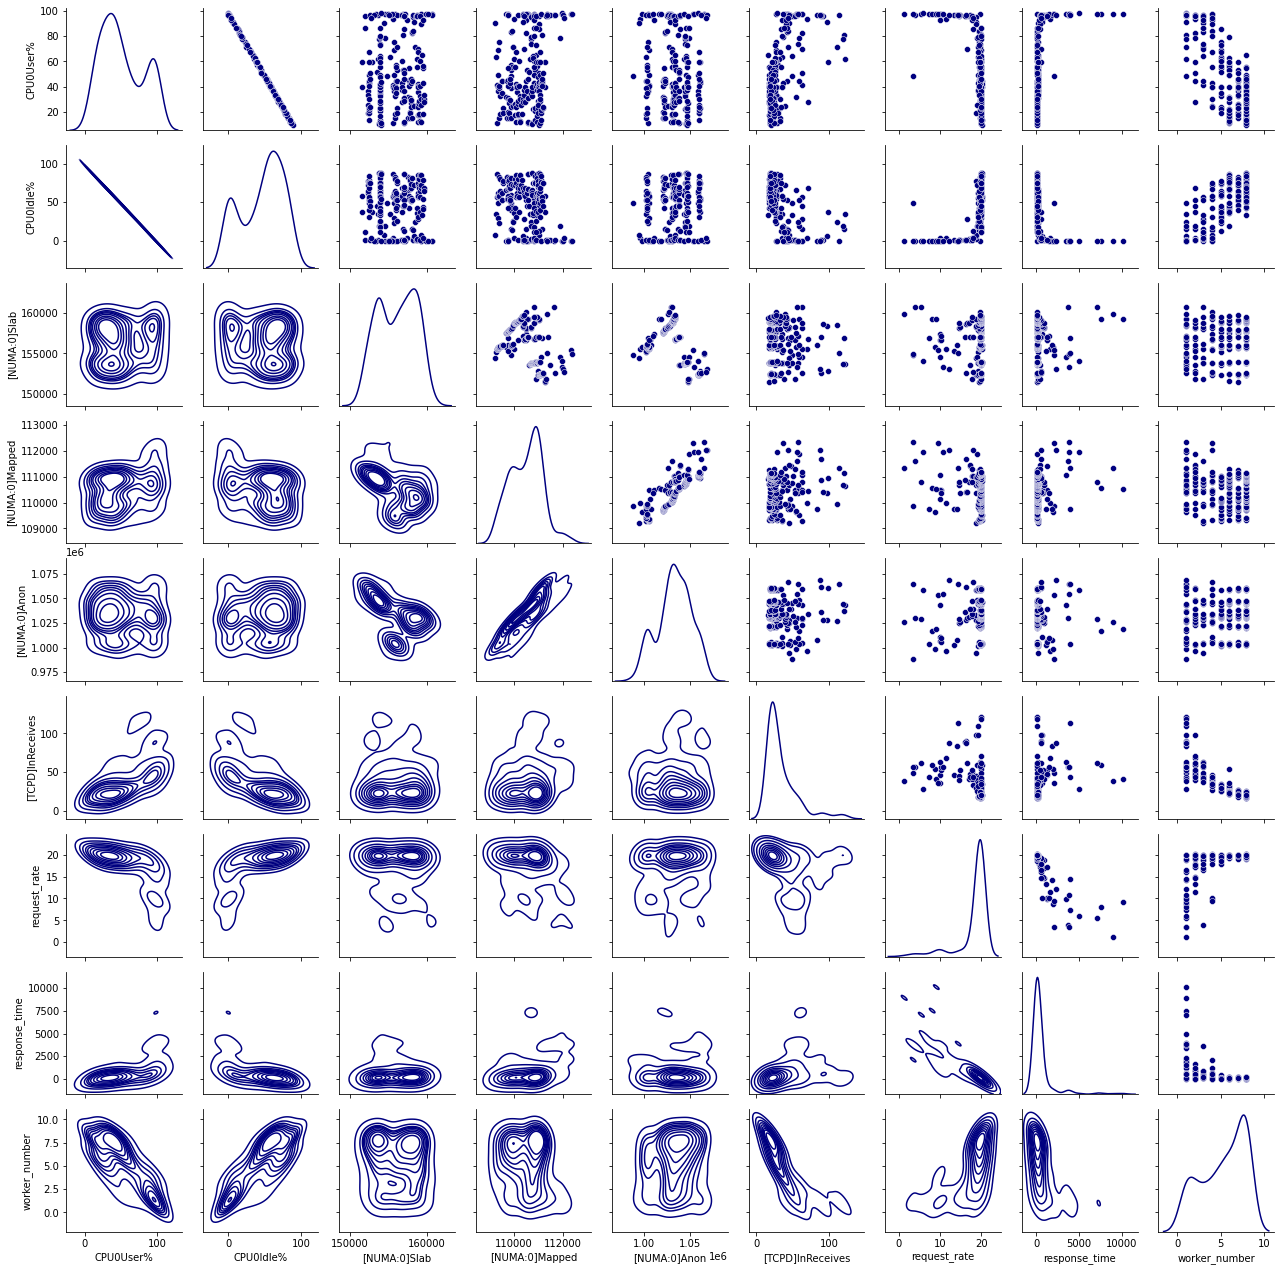

In [124]:
g = sns.PairGrid(mf[input_variables], diag_sharey=False, height=2.0)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)

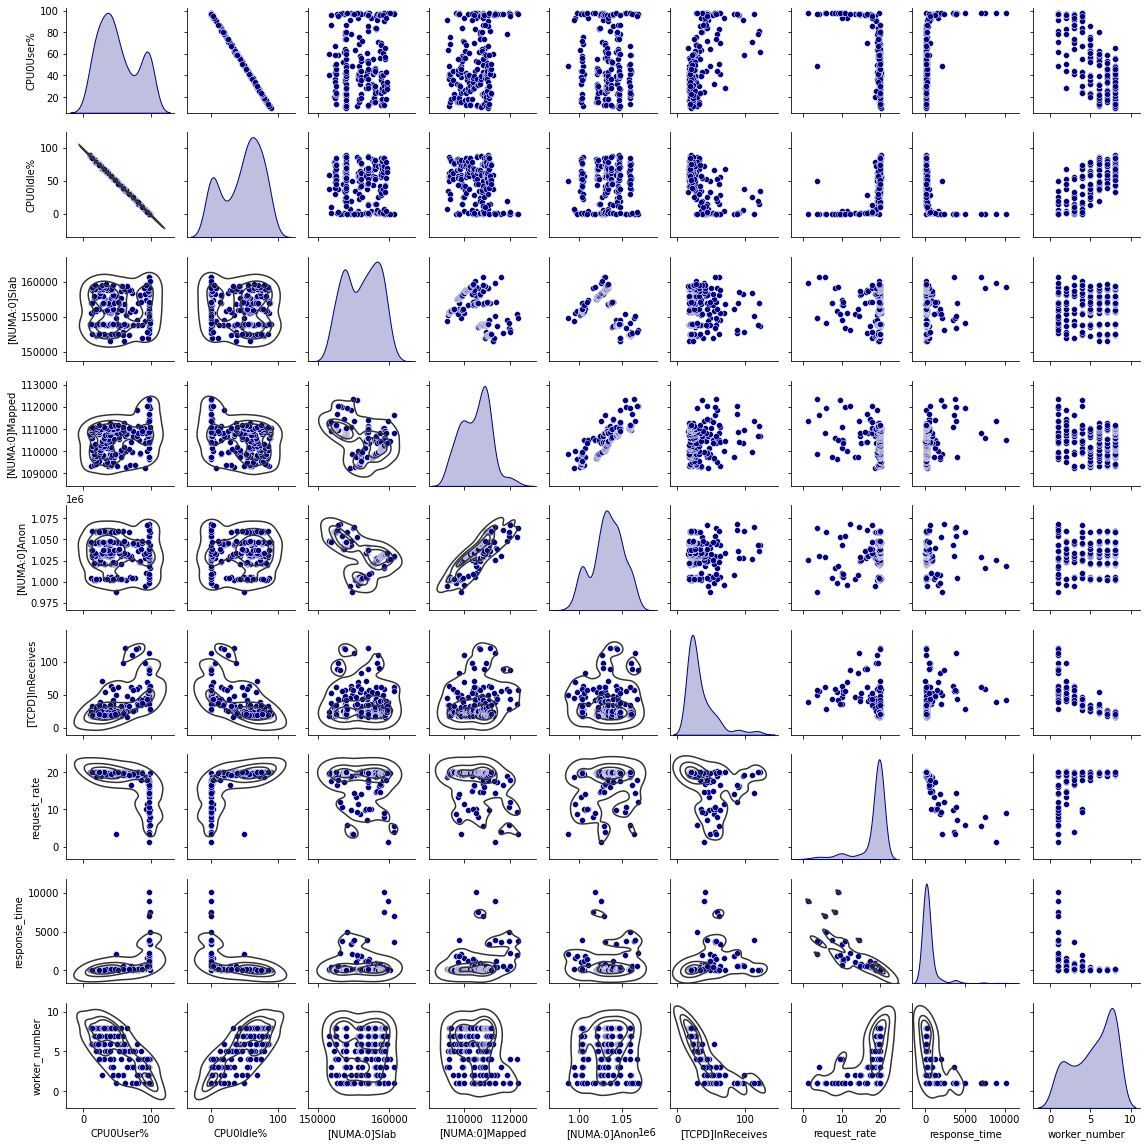

In [125]:
g = sns.pairplot(mf[input_variables], diag_kind='kde', height=1.8)
g.map_lower(sns.kdeplot, levels=4, color='.2'); plt.show()

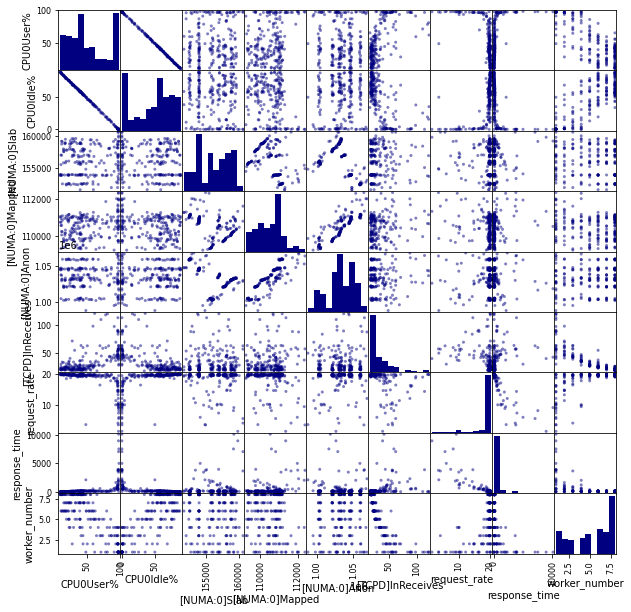

In [126]:
from pandas.plotting import scatter_matrix

scatter_matrix(mf[input_variables], figsize=(10,10))
plt.show()

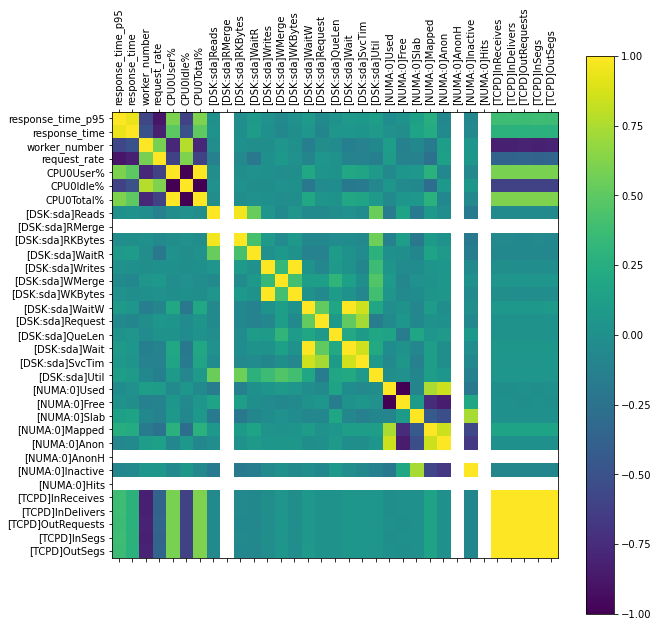

In [127]:
f = plt.figure(figsize=(10, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
# plt.title('Correlation Matrix', fontsize=16);

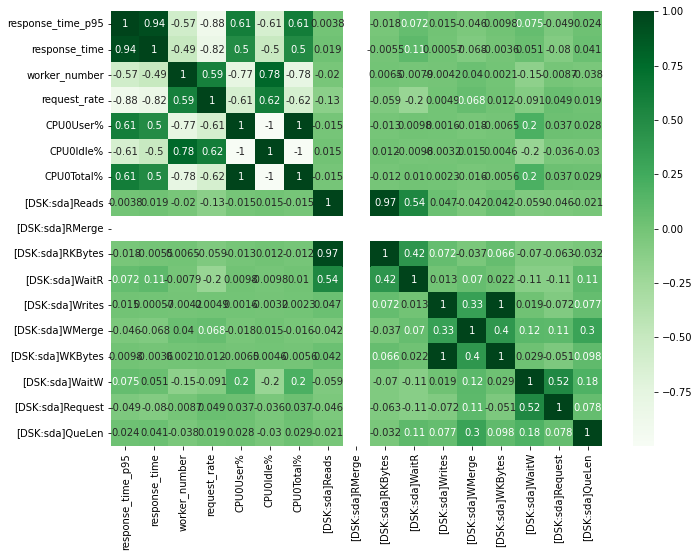

In [128]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(18, 18))
df= mf.iloc[: , [3,4,5,6,7,8,9,10,11,12,13,14,17]].copy()

df = mf.iloc[:, :20]
corr = df.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

In [135]:
mf.columns

Index(['worker_give_metrics', 'write_to_csv_time', 'time', 'response_time_p95',
       'response_time', 'worker_number', 'request_rate', 'CPU0User%',
       'CPU0Idle%', 'CPU0Total%', '[DSK:sda]Reads', '[DSK:sda]RMerge',
       '[DSK:sda]RKBytes', '[DSK:sda]WaitR', '[DSK:sda]Writes',
       '[DSK:sda]WMerge', '[DSK:sda]WKBytes', '[DSK:sda]WaitW',
       '[DSK:sda]Request', '[DSK:sda]QueLen', '[DSK:sda]Wait',
       '[DSK:sda]SvcTim', '[DSK:sda]Util', '[NUMA:0]Used', '[NUMA:0]Free',
       '[NUMA:0]Slab', '[NUMA:0]Mapped', '[NUMA:0]Anon', '[NUMA:0]AnonH',
       '[NUMA:0]Inactive', '[NUMA:0]Hits', '[TCPD]InReceives',
       '[TCPD]InDelivers', '[TCPD]OutRequests', '[TCPD]InSegs',
       '[TCPD]OutSegs', 'actual_vm_number_is', 'actual_vm_number_was',
       'actual_vm_number_will', 'delta_vm'],
      dtype='object')

In [136]:
df = mf.drop(['[DSK:sda]RMerge', '[NUMA:0]AnonH', '[NUMA:0]Hits'], axis=1)

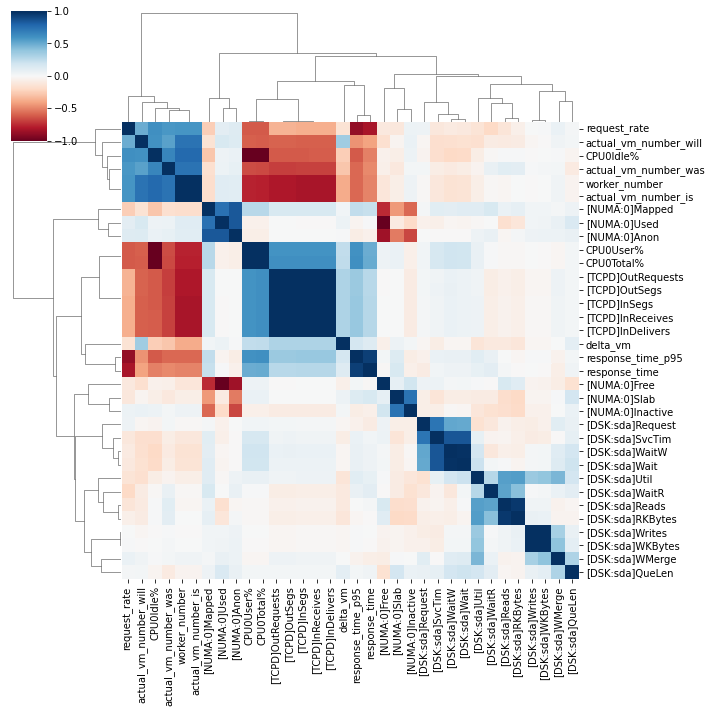

In [139]:
g = sns.clustermap(df.corr(),
                   method = 'complete',
                   cmap   = 'RdBu',
                   annot  = False,
                   annot_kws = {'size': 8})
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90);

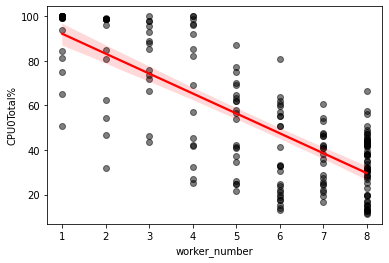

In [140]:
def scatter(x, y, color='black', alpha=0.5, lc='red', ci=95):
    sns.regplot(x=x,
                y=y,
                scatter_kws={
                    'color': color,
                    'alpha': alpha
                },
                line_kws={
                    'color': lc
                },
                ci=95)
    plt.show()

scatter(mf['worker_number'], mf['CPU0Total%'])

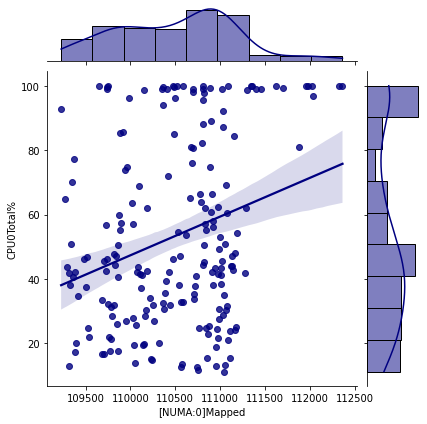

In [141]:
def join(x, y, data):
    sns.jointplot(x=x, y=y, data=data, kind='reg');

join('[NUMA:0]Mapped', 'CPU0Total%', mf)

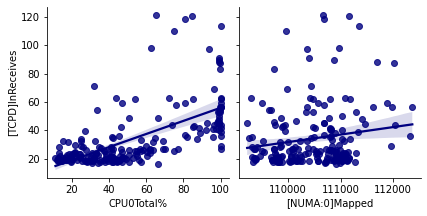

In [142]:
def pair(x_vars, y_vars, data):
    sns.pairplot(data, x_vars=x_vars, y_vars=y_vars,
             height=3, aspect=1.0, kind='reg');

pair(['CPU0Total%', '[NUMA:0]Mapped'], ['[TCPD]InReceives'], mf)

In [143]:

# Nézzük melyik metrikákkal correlál a worker_number és a delta_vm

# valójában a delta_m delta_vm érdekelne


In [144]:
an = mf.copy()

# Remove column name [...]
an = an.drop(['worker_give_metrics'], axis=1)
an = an.drop(['actual_vm_number_is', 'actual_vm_number_was', 'actual_vm_number_will'], axis=1)

# minden metrikára megcsinálni a nextet és kiszámolni a delta metrikát

column_names = an.columns

for columnname in column_names:

    __next_name = columnname + 'Nxt'

    an[__next_name] = an[columnname].shift(-1)

indexAge = an[ (an['delta_vm'] == 0) ].index
an.drop(indexAge , inplace=True)
an = an.dropna()


for columnname in column_names:
    
    if an[columnname].values.dtype != object:
        __next_name = columnname + 'Nxt'
        __delta_next_name = columnname + 'NextDelta'
        an[__delta_next_name] = an[__next_name] - an[columnname]

# an = an[an.columns.drop(list(an.filter(regex='Nxt')))]

# an.head()

In [145]:
tmp = an[['worker_number', 'delta_vm', 'CPU0Total%', 'CPU0Total%Nxt', 'CPU0Total%NextDelta']]

tmp.head()

worker_number  delta_vm  CPU0Total%  CPU0Total%Nxt  CPU0Total%NextDelta
0              1      1.00       50.70          96.20                45.50
1              2      1.00       96.20          92.80                -3.40
2              3     -2.00       92.80          99.80                 7.00
4              1      3.00      100.00          98.80                -1.20
5              4      1.00       98.80          64.90               -33.90

In [146]:
# Oké eddig jó

# delta_vm-re agregálni a delta_metrikát
an.groupby(['delta_vm'])['CPU0Total%NextDelta'].mean()

delta_vm
-3.00    19.76
-2.00    10.28
-1.00     8.91
1.00     -5.96
2.00    -16.80
3.00    -19.19
Name: CPU0Total%NextDelta, dtype: float64

In [147]:
# Oké eddig jó

# erre kéne csinálni valami ANOVA elemzés és F-statistikát

# https://www.pythonfordatascience.org/anova-python

# https://www.reneshbedre.com/blog/anova.html

import statsmodels.api as sm
from statsmodels.formula.api import ols

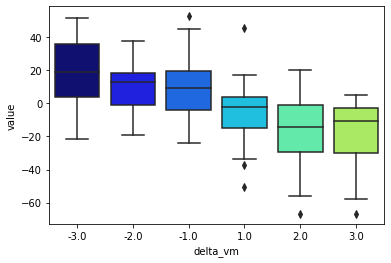

sum_sq     df     F  PR(>F)
C(delta_vm) 28,706.99   5.00 15.73    0.00
Residual    53,294.53 146.00   NaN     NaN

In [148]:
# Oké ez eddig jó

av = an[['delta_vm', 'response_timeNextDelta', 'CPU0Total%NextDelta', 'CPU0User%NextDelta', '[NUMA:0]SlabNextDelta', '[TCPD]OutSegsNextDelta']]

def anova(columnname: str):
    # Csak egy változó értdekel
    tmp = av[['delta_vm', columnname]]
    tmp_melt = pd.melt(tmp.reset_index(), id_vars=['delta_vm'], value_vars=[columnname])

    tmp_melt = pd.melt(tmp, id_vars=['delta_vm'], value_vars=[columnname])
    tmp_melt = tmp_melt.drop('variable', axis=1)
    
    ax = sns.boxplot(x="delta_vm", y="value", data=tmp_melt, width=0.8, whis=1.20)
    # ax = sns.swarmplot(x='delta_vm', y='value', data=tmp_melt, color='#000013', size=3)
    plt.show()

    model = ols('value ~ C(delta_vm)', data=tmp_melt).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)

    return anova_table

anova('CPU0Total%NextDelta')

In [149]:
# Interpretation

# The p value obtained from ANOVA analysis for delta_vm are statistically significant (p < 0.05).
# We conclude that type of delta_vm significantly affects the yield outcome (the change of the CPU usage)

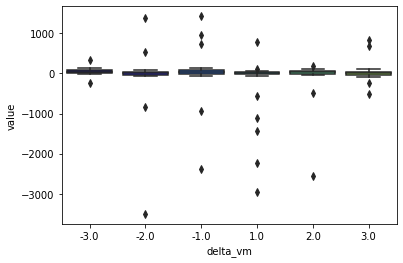

sum_sq     df    F  PR(>F)
C(delta_vm)  1,246,521.44   5.00 0.73    0.60
Residual    50,125,820.71 146.00  NaN     NaN

In [150]:
# Oké ez eddig jó

av = an[['delta_vm', 'response_timeNextDelta', 'CPU0Total%NextDelta', 'CPU0User%NextDelta', '[NUMA:0]SlabNextDelta', '[TCPD]OutSegsNextDelta']]

anova('[NUMA:0]SlabNextDelta')

In [151]:
# Interpretation

# Érdekes itt is szignifikáns az eltérés.

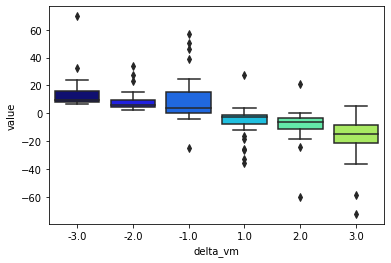

sum_sq     df     F  PR(>F)
C(delta_vm) 20,428.50   5.00 20.31    0.00
Residual    29,369.67 146.00   NaN     NaN

In [152]:
# Oké ez eddig jó

av = an[['delta_vm', 'response_timeNextDelta', 'CPU0Total%NextDelta', 'CPU0User%NextDelta', '[NUMA:0]SlabNextDelta', '[TCPD]OutSegsNextDelta']]

anova('[TCPD]OutSegsNextDelta')

In [153]:
# Interpretation

# The p value obtained from ANOVA analysis for delta_vm are statistically significant (p < 0.05).
# We conclude that type of delta_vm significantly affects the yield outcome (the change of the TCP Sent out packet)

In [154]:
# Arra, hogy melyek azok a metrikák amelyekben a vm szám változás egyáltalán előidéz valamit

# kell egy dataframe amiben csak a NextDelta változók és a delta_vm van benne

aa = an[an.columns.difference([i for i in an.columns if 'NextDelta' not in i])]
aa = an[an.columns.difference([i for i in an.columns if ('NextDelta' not in i) and ('delta_vm' not in i)])]
aa = aa.drop('worker_numberNextDelta', axis=1)

aa.columns


Index(['CPU0Idle%NextDelta', 'CPU0Total%NextDelta', 'CPU0User%NextDelta',
       '[DSK:sda]QueLenNextDelta', '[DSK:sda]RKBytesNextDelta',
       '[DSK:sda]RMergeNextDelta', '[DSK:sda]ReadsNextDelta',
       '[DSK:sda]RequestNextDelta', '[DSK:sda]SvcTimNextDelta',
       '[DSK:sda]UtilNextDelta', '[DSK:sda]WKBytesNextDelta',
       '[DSK:sda]WMergeNextDelta', '[DSK:sda]WaitNextDelta',
       '[DSK:sda]WaitRNextDelta', '[DSK:sda]WaitWNextDelta',
       '[DSK:sda]WritesNextDelta', '[NUMA:0]AnonHNextDelta',
       '[NUMA:0]AnonNextDelta', '[NUMA:0]FreeNextDelta',
       '[NUMA:0]HitsNextDelta', '[NUMA:0]InactiveNextDelta',
       '[NUMA:0]MappedNextDelta', '[NUMA:0]SlabNextDelta',
       '[NUMA:0]UsedNextDelta', '[TCPD]InDeliversNextDelta',
       '[TCPD]InReceivesNextDelta', '[TCPD]InSegsNextDelta',
       '[TCPD]OutRequestsNextDelta', '[TCPD]OutSegsNextDelta', 'delta_vm',
       'delta_vmNextDelta', 'delta_vmNxt', 'request_rateNextDelta',
       'response_timeNextDelta', 'response_time_p

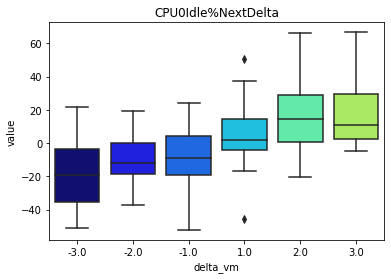

CPU0Idle%NextDelta sig = 0.00


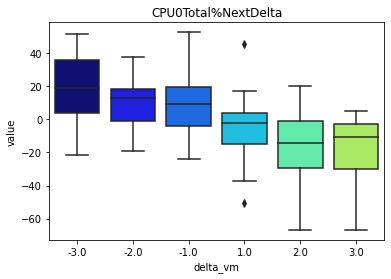

CPU0Total%NextDelta sig = 0.00


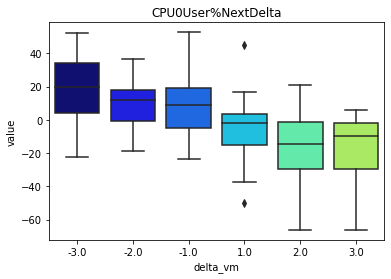

CPU0User%NextDelta sig = 0.00
[DSK:sda]QueLenNextDelta sig = 0.36
[DSK:sda]RKBytesNextDelta sig = 0.20
[DSK:sda]ReadsNextDelta sig = 0.37
[DSK:sda]RequestNextDelta sig = 0.24
[DSK:sda]SvcTimNextDelta sig = 0.93
[DSK:sda]UtilNextDelta sig = 0.11
[DSK:sda]WKBytesNextDelta sig = 0.24
[DSK:sda]WMergeNextDelta sig = 0.60
[DSK:sda]WaitNextDelta sig = 0.49
[DSK:sda]WaitRNextDelta sig = 0.74
[DSK:sda]WaitWNextDelta sig = 0.51
[DSK:sda]WritesNextDelta sig = 0.25
[NUMA:0]AnonNextDelta sig = 0.16
[NUMA:0]FreeNextDelta sig = 0.71
[NUMA:0]InactiveNextDelta sig = 0.52
[NUMA:0]MappedNextDelta sig = 0.10
[NUMA:0]SlabNextDelta sig = 0.60
[NUMA:0]UsedNextDelta sig = 0.71


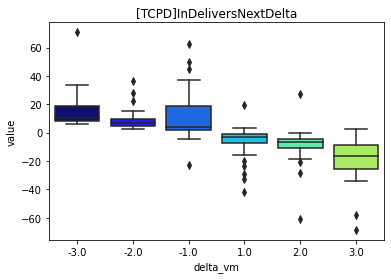

[TCPD]InDeliversNextDelta sig = 0.00


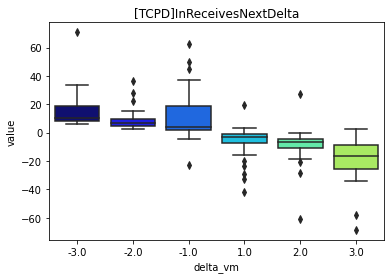

[TCPD]InReceivesNextDelta sig = 0.00


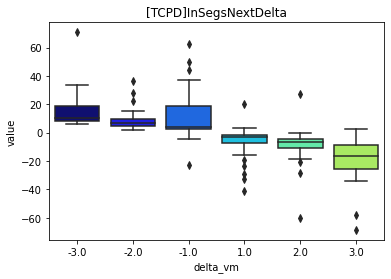

[TCPD]InSegsNextDelta sig = 0.00


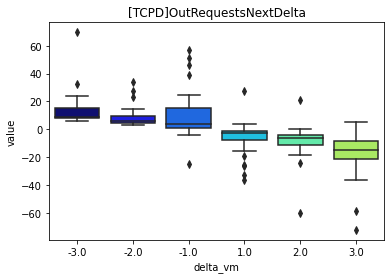

[TCPD]OutRequestsNextDelta sig = 0.00


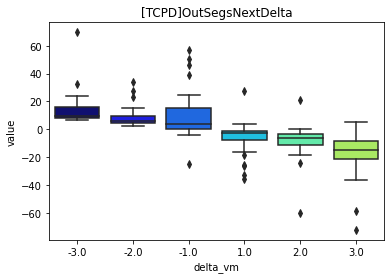

[TCPD]OutSegsNextDelta sig = 0.00


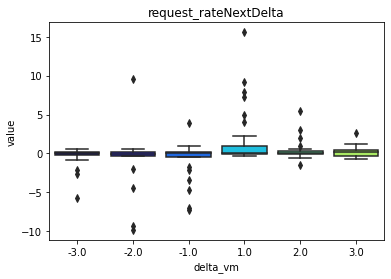

request_rateNextDelta sig = 0.00


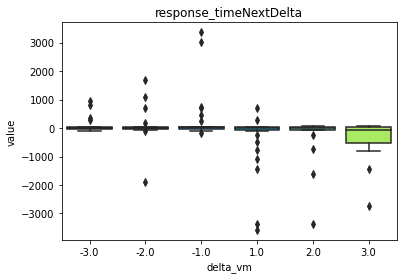

response_timeNextDelta sig = 0.01


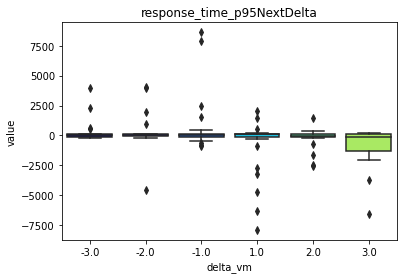

response_time_p95NextDelta sig = 0.01


In [155]:
# Oké eddig jó

# Ennél mélyebben szerintem nem kell foglalkozni azzal, hogy delta_vm milyen delta_vm hatást ért el az egyes
# metrikákban.

# Esetleg amire még kíváncs lennék, hogy ha szisztematikusan kiszámolnám az F-statisztikát minden delta_metrikára
# akkor melyek lennének szignifikánsak

# Oké ez eddig jó

sig_s = []

for i in aa.columns:
    if(aa[i].describe()['std'] > 0):
        if 'delta_vm' not in i:
            # Csak egy változó értdekel
            tmp = aa[['delta_vm', i]]
            tmp_melt = pd.melt(tmp, id_vars=['delta_vm'], value_vars=[i])
            tmp_melt = tmp_melt.drop('variable', axis=1)

            model = ols('value ~ C(delta_vm)', data=tmp_melt).fit()
            anova_table = sm.stats.anova_lm(model, typ=2)
            sig = anova_table['PR(>F)'][0]

            if sig < 0.1:
                ax = sns.boxplot(x="delta_vm", y="value", data=tmp_melt)
                ax.set_title(i)
                plt.show()

            sig_s.append([i, sig])
            print(f'{i} sig = {sig:.2f}')

sig = pd.DataFrame(sig_s)
sig.columns = ['Metric', 'sig']

sig['sig'] = sig['sig'].apply(lambda x: float("{:.2f}".format(x)))

In [156]:
def color(val):
    if val <= 0.1:
        color = 'green'
    elif val > 0.1:
        color = 'yellow'
    else:
        color = 'white'
    return 'background-color: %s' % color

sig.style.applymap(color, subset=['sig'])

In [157]:

# Félre értés ne essék, ez nem azt jelenti, hogy a nem sig metrika nem lehet hatással az RT-re,

# Azt viszont biztosan jelenti, hogy a vm szám változás nincs hatással a metrikára.


In [158]:
# Oké eddig jó

# Most már látom, hogy melyek azok a metrikák amelyek signifiánsan változnak a delta_vm hatására a feladatban



In [159]:
# Oké eddig jó

# lehet egyszerre több változóra is megcsinálni az aggregációt
an.groupby(['delta_vm'])[['CPU0Total%NextDelta', 'CPU0User%NextDelta']].mean()

CPU0Total%NextDelta  CPU0User%NextDelta
delta_vm                                         
-3.00                   19.76               19.68
-2.00                   10.28                9.75
-1.00                    8.91                8.71
1.00                    -5.96               -5.83
2.00                   -16.80              -16.66
3.00                   -19.19              -18.71

In [160]:
# Oké eddig jó

# lehet egyszerre több változóra is megcsinálni az aggregációt
_ = [x for x in aa.columns if 'TCP' in x]
an.groupby(['delta_vm'])[_].mean()

# Ez például érdekes -> lehet, hogy jobb lenne az InDelivers változót használnom az OutSegs helyett+

[TCPD]InDeliversNextDelta  [TCPD]InReceivesNextDelta  \
delta_vm                                                         
-3.00                         15.69                      15.69   
-2.00                          9.64                       9.64   
-1.00                         11.81                      11.81   
1.00                          -6.30                      -6.30   
2.00                          -9.29                      -9.29   
3.00                         -20.57                     -20.57   

          [TCPD]InSegsNextDelta  [TCPD]OutRequestsNextDelta  \
delta_vm                                                      
-3.00                     15.69                       14.72   
-2.00                      9.60                        9.20   
-1.00                     11.78                       11.26   
1.00                      -6.36                       -5.84   
2.00                      -9.13                       -8.93   
3.00                     -20.54                      -19.84   

          [TCPD]OutSegsNextDelta  
delta_vm                          
-3.00                      14.70  
-2.00                       9.15  
-1.00                      11.22  
1.00                       -5.90  
2.00                       -8.77  
3.00                      -19.81

In [161]:
# Oké eddig jó

# lehet egyszerre több változóra is megcsinálni az aggregációt
l = an.columns[73:80]
an.groupby(['delta_vm'])[l].mean()

response_timeNextDelta  worker_numberNextDelta  \
delta_vm                                                   
-3.00                      94.01                   -3.00   
-2.00                      70.09                   -2.00   
-1.00                     326.50                   -1.00   
1.00                     -266.95                    1.00   
2.00                     -228.25                    2.00   
3.00                     -385.34                    3.00   

          request_rateNextDelta  CPU0User%NextDelta  CPU0Idle%NextDelta  \
delta_vm                                                                  
-3.00                     -0.41               19.68              -19.67   
-2.00                     -0.66                9.75              -10.26   
-1.00                     -0.84                8.71               -8.79   
1.00                       1.55               -5.83                5.90   
2.00                       0.38              -16.66               16.69   
3.00                       0.19              -18.71               19.06   

          CPU0Total%NextDelta  [DSK:sda]ReadsNextDelta  
delta_vm                                                
-3.00                   19.76                    -0.19  
-2.00                   10.28                     0.04  
-1.00                    8.91                     0.14  
1.00                    -5.96                    -0.06  
2.00                   -16.80                    -0.01  
3.00                   -19.19                     0.00

In [162]:
# Oké eddig jó

# lehet egyszerre több változóra is megcsinálni az aggregációt csak a deltákra és elforgatva
l = an.columns[73:105]
an.groupby(['delta_vm'])[l].mean().round(2).T

delta_vm                     -3.00  -2.00   -1.00   1.00    2.00    3.00 
response_timeNextDelta       94.01  70.09  326.50 -266.95 -228.25 -385.34
worker_numberNextDelta       -3.00  -2.00   -1.00    1.00    2.00    3.00
request_rateNextDelta        -0.41  -0.66   -0.84    1.55    0.38    0.19
CPU0User%NextDelta           19.68   9.75    8.71   -5.83  -16.66  -18.71
CPU0Idle%NextDelta          -19.67 -10.26   -8.79    5.90   16.69   19.06
CPU0Total%NextDelta          19.76  10.28    8.91   -5.96  -16.80  -19.19
[DSK:sda]ReadsNextDelta      -0.19   0.04    0.14   -0.06   -0.01    0.00
[DSK:sda]RMergeNextDelta      0.00   0.00    0.00    0.00    0.00    0.00
[DSK:sda]RKBytesNextDelta    -3.40   1.02    2.26   -0.49   -0.12    0.00
[DSK:sda]WaitRNextDelta      -0.01  -0.02    0.02    0.00    0.00    0.00
[DSK:sda]WritesNextDelta     -0.33   3.10    0.53   -4.68    0.08    3.87
[DSK:sda]WMergeNextDelta     -0.25   0.31    0.14   -0.11   -0.10    0.23
[DSK:sda]WKBytesNextDelta    -3.20  16.51    3.17  -22.42   -0.10   18.46
[DSK:sda]WaitWNextDelta       0.23   0.00   -0.21    0.06   -0.03    0.04
[DSK:sda]RequestNextDelta    -0.61   0.56    0.05    0.68   -0.67   -0.22
[DSK:sda]QueLenNextDelta      0.00  -0.00    0.03   -0.02    0.00    0.02
[DSK:sda]WaitNextDelta        0.24  -0.03   -0.20    0.06   -0.03    0.04
[DSK:sda]SvcTimNextDelta      0.01   0.00   -0.12    0.11   -0.06    0.16
[DSK:sda]UtilNextDelta       -0.11   0.01    0.05   -0.13    0.12    0.14
[NUMA:0]UsedNextDelta       229.08 -18.05  353.31 -580.96 -561.62  961.58
[NUMA:0]FreeNextDelta      -229.08  18.05 -353.31  580.96  561.62 -961.58
[NUMA:0]SlabNextDelta        39.69 -88.67   13.26 -192.99  -87.06   47.60
[NUMA:0]MappedNextDelta     104.83  10.85  107.18 -112.66  -46.26   11.00
[NUMA:0]AnonNextDelta       115.22  56.03  868.85  -48.66 -250.40  896.67
[NUMA:0]AnonHNextDelta        0.00   0.00    0.00    0.00    0.00    0.00
[NUMA:0]InactiveNextDelta     5.22 -34.97 -257.22  -20.98    8.58   17.11
[NUMA:0]HitsNextDelta         0.00   0.00    0.00    0.00    0.00    0.00
[TCPD]InReceivesNextDelta    15.69   9.64   11.81   -6.30   -9.29  -20.57
[TCPD]InDeliversNextDelta    15.69   9.64   11.81   -6.30   -9.29  -20.57
[TCPD]OutRequestsNextDelta   14.72   9.20   11.26   -5.84   -8.93  -19.84
[TCPD]InSegsNextDelta        15.69   9.60   11.78   -6.36   -9.13  -20.54
[TCPD]OutSegsNextDelta       14.70   9.15   11.22   -5.90   -8.77  -19.81

In [163]:
# Oké eddig jó

# viszont úgy vettem észre, hogy csak az alábbi metrikák követik a szigorú linearitást

# CPU0Total%NextDelta

# DSK-ból egyik sem (!)

# [NUMA:0]UsedNextDelta

# TCP-ből bármelyik de inkább az IN

In [164]:
# Oké eddig jó

# lehet egyszerre több változó alapján is aggregálni
an.groupby(['delta_vm', 'worker_number'])['CPU0Total%NextDelta'].mean()

delta_vm  worker_number
-3.00     4                25.65
          5                31.38
          6                37.17
          7                 0.90
          8                10.67
-2.00     3                16.40
          4                 3.25
          5                37.60
          6                11.88
          7                17.93
          8                 4.79
-1.00     2                11.41
          3                22.23
          4                 6.10
          7                 1.80
          8                 5.30
1.00      1                 2.63
          2                -1.35
          3               -21.00
          4               -33.05
          5                -7.68
          6                -0.73
          7                -3.47
2.00      1               -22.07
          2                -6.90
          3               -34.20
          4               -31.17
          5               -16.74
          6                -9.66
3.00      1        

In [165]:
# Oké eddig jó

# Ilyet is lehet (avg, min, max, std)
aa = an.groupby(['delta_vm'])[['CPU0Total%NextDelta', 'CPU0User%NextDelta']].mean()
bb = an.groupby(['delta_vm'])[['CPU0Total%NextDelta', 'CPU0User%NextDelta']].min()
cc = an.groupby(['delta_vm'])[['CPU0Total%NextDelta', 'CPU0User%NextDelta']].max()
dd = an.groupby(['delta_vm'])[['CPU0Total%NextDelta', 'CPU0User%NextDelta']].std()
aa.columns = ['CPU0Total%mean', 'CPU0User%mean']
bb.columns = ['CPU0Total%min', 'CPU0User%min']
cc.columns = ['CPU0Total%max', 'CPU0User%max']
dd.columns = ['CPU0Total%std', 'CPU0User%std']

ff = pd.concat([aa, bb, cc, dd], axis=1)

ff.head()

CPU0Total%mean  CPU0User%mean  CPU0Total%min  CPU0User%min  \
delta_vm                                                               
-3.00              19.76          19.68         -21.40        -22.20   
-2.00              10.28           9.75         -19.10        -18.90   
-1.00               8.91           8.71         -23.90        -23.30   
1.00               -5.96          -5.83         -50.40        -49.70   
2.00              -16.80         -16.66         -66.50        -65.90   

          CPU0Total%max  CPU0User%max  CPU0Total%std  CPU0User%std  
delta_vm                                                            
-3.00             51.70         52.60          20.64         20.73  
-2.00             37.60         36.50          15.68         15.49  
-1.00             52.50         52.70          19.26         19.45  
1.00              45.50         44.90          17.73         17.65  
2.00              20.30         20.80          20.76         20.72

In [166]:
an.groupby(['delta_vm']).agg({
    'CPU0Total%NextDelta': ['mean', 'min', 'max', 'std'],
    'CPU0User%NextDelta': ['mean', 'min', 'max', 'std']
})

CPU0Total%NextDelta                    CPU0User%NextDelta         \
                        mean    min   max   std               mean    min   
delta_vm                                                                    
-3.00                  19.76 -21.40 51.70 20.64              19.68 -22.20   
-2.00                  10.28 -19.10 37.60 15.68               9.75 -18.90   
-1.00                   8.91 -23.90 52.50 19.26               8.71 -23.30   
1.00                   -5.96 -50.40 45.50 17.73              -5.83 -49.70   
2.00                  -16.80 -66.50 20.30 20.76             -16.66 -65.90   
3.00                  -19.19 -66.80  4.90 21.12             -18.71 -66.20   

                      
           max   std  
delta_vm              
-3.00    52.60 20.73  
-2.00    36.50 15.49  
-1.00    52.70 19.45  
1.00     44.90 17.65  
2.00     20.80 20.72  
3.00      5.90 21.08

In [167]:
#

#

# Itt tartok éppen

# Azon dolgozom, hogy a delta_metrika értékeket (delta_vm) fényében össze tudjam hasonlítani az egyes testek között

# Az egyes testek az egyes TestXX mappákban vannak

# Ez a 'Scaler/Train_Log_Anova.ipynb' notebookban megcsináltam

#

#

# Ez azt jelenti, hogy ammi innentől jön az már nem kell?

Ez a rész itt arra jó, hogy menézzem vele hogyan sikerült a linreg egy adott metrikára.

Erre elsősorban azért van szükség mert szretném kiválasztani a metrikáknak azt a halmazát amelyek alapján majda a neruális hálóban a válaszidőt becsülöm.

Ha egy metrika linreg becsése szar (rossz, nem elég jó) akkor hiba, vagy kár lenne bevenni a neurális hálóba mert nem fogom tudni pontosan becsülni magát a metrikát a fel-, le-skálázásnál.

In [168]:
def cc(columnname: str):
    create_model_for_metric(columnname, binwidth=1000.0)
    # create_model_for_metric_paraszt(columnname)

In [169]:
cn = mf.columns.difference(mf.select_dtypes('object').columns)

interact(cc, columnname=cn);

interactive(children=(Dropdown(description='columnname', options=('CPU0Idle%', 'CPU0Total%', 'CPU0User%', '[DS…

In [170]:
input_variables

['CPU0User%',
 'CPU0Idle%',
 '[NUMA:0]Slab',
 '[NUMA:0]Mapped',
 '[NUMA:0]Anon',
 '[TCPD]InReceives',
 'request_rate',
 'response_time',
 'worker_number']

In [171]:
# Fentiek alapján a következőek tűnnek jónak
g = ['[NUMA:0]Slab', '[NUMA:0]Mapped', '[NUMA:0]Anon', '[TCPD]InReceives', '[TCPD]InSegs']

# Korábban peig azt láttam, hogy ezek vannak jó linearitásban a delta_vm-el
g = ['CPU0User%', 'CPU0Idle%'] + g

# Kell még a reguest_rate is
g = ['request_rate'] + g

# Lehet olyan model ahhoz a worker_number is benne van
g = ['worker_number'] + g

# lássuk
print(g)

['worker_number', 'request_rate', 'CPU0User%', 'CPU0Idle%', '[NUMA:0]Slab', '[NUMA:0]Mapped', '[NUMA:0]Anon', '[TCPD]InReceives', '[TCPD]InSegs']


In [172]:

# Az a meglátásom, hogy vannak olyan metrikák amelyeknek a lineáris regressziós becslése katasztrófálisan szar.

# Ezért ezeket a változókat még véletlenül sem szabad bevennem a Neurális háló modellbe


In [173]:

# Csak úgy mondom, hogy gyárilag a Request Rate értéket is becsülni kell a linreg modellel

# Ennek az az oka, hogy mivel elosztott terhelés van, valóban előforudhat és elő is fordul,
# hogy ha egy új VM-t becsatolok a rendszerbe akkor az adott gépre kevesebb bejövő kérés
# fog jutni.


In [174]:
import tensorflow as tf
tf.get_logger().setLevel('INFO')

In [175]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [RT]')
    plt.legend()
    plt.grid(True)

# ---

def plot_timeseries(train_labels, predicted_labels):
    
    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

    ax1.plot(mf['response_time'], color = 'C0')
    # ax1.plot(mf['response_time_p95'], color = 'C1')
    
    # ax1.plot(train_labels, color = 'orange')
    ax1.plot(predicted_labels, color = 'black', ls = '--')

    # ax2 = ax1.twinx()

    # ax2.plot(mf['request_rate'], color = 'C2')

    ax1.set_xlabel('Time')
    ax1.set_ylabel('Response Time')
    # ax2.set_ylabel('Request Rate')

    ax3.plot(mf['worker_number'], color = 'black')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('VM Number')

    plt.show()

# ---


In [177]:

# A kevesebb több (?%)
input_variables = ['request_rate',
                   'CPU0User%',
                   '[TCPD]OutSegs']

# Csak a jó linregesek (?%)
input_variables = ['request_rate',
                   'CPU0Idle%',
                   '[NUMA:0]Anon',
                   '[NUMA:0]Mapped',
                   '[NUMA:0]Inactive',
                   '[TCPD]InSegs',
                   '[TCPD]OutSegs']

# Fent -> hiába tökéletes a model az actionok után hülyeségeket mond


# Amik a korábbi elemzések alapján szóba jöhet
input_variables = g

input_variables_first = input_variables

train_features_first = mf[input_variables]
train_features = mf[input_variables]
train_labels = mf[['response_time']]

def get_model(train_features, f1=30, f2=15):

    # A hogyan szopassuk meg magunkat című versenyen kurva jó helyezést lehet elérni ha ezt nen teszem be
    # sets seeds for base-python, numpy and tf
    tf.keras.utils.set_random_seed(42)
    tf.config.experimental.enable_op_determinism()


    normalizer = tf.keras.layers.Normalization(axis=-1)

    normalizer.adapt(np.array(train_features))

    with np.printoptions(precision=2, suppress=True):
        print(normalizer.mean.numpy())

    first = np.array(train_features[:1])

    with np.printoptions(precision=2, suppress=True):
        print('First example:', first)
        print('Normalized   :', normalizer(first).numpy())

    model = tf.keras.Sequential([
        normalizer,
        tf.keras.layers.Dense(f1, activation='tanh'),
        tf.keras.layers.Dense(f2, activation='ReLU'),
        layers.Dense(units=1)
    ])

    model.summary()

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
        loss='mean_absolute_error')
    
    return model

first_model = get_model(train_features)

[[      5.35      18.29      51.4       46.52  156089.75  110496.43
  1032929.7       34.29      34.21]]
First example: [[     1.       3.5     48.6     49.3 154800.8 109863.2 988064.      48.9
      48.4]]
Normalized   : [[-1.75 -4.04 -0.1   0.1  -0.54 -0.97 -2.53  0.68  0.66]]
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 9)                19        
 ion)                                                            
                                                                 
 dense_3 (Dense)             (None, 30)                300       
                                                                 
 dense_4 (Dense)             (None, 15)                465       
                                                                 
 dense_5 (Dense)             (None, 1)                 16        
                                      

2023-05-23 21:00:29.341936: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-23 21:01:00.051224: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-23 21:01:00.094917: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-23 21:01:00.140250: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


CPU times: user 1min 4s, sys: 2.69 s, total: 1min 7s
Wall time: 1min 4s


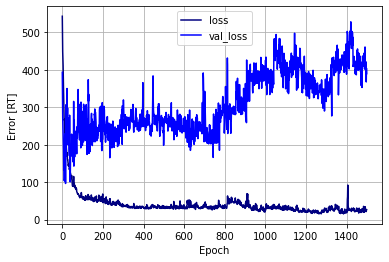

In [178]:
%%time
history = first_model.fit(
    train_features,
    train_labels,
    epochs = 1500,
    # batch_size = 300,
    verbose = 0,
    validation_split = 0.05)

plot_loss(history)

In [179]:
# Kiexportálni az itt feltanított model.

# Keras

first_model.save(os.getcwd())

first_model.save('first_model.h5')


INFO:tensorflow:Assets written to: /home/ubuntu/Scaler/Train/Train25/assets


INFO:tensorflow:Assets written to: /home/ubuntu/Scaler/Train/Train25/assets


In [180]:

# model.predict módszer lassú, de lehet rajta gyorsítani

# így


In [181]:
%%time
predicted_labels = first_model.predict(train_features, verbose=0)
print(predicted_labels[:2])

[[2127.3481]
 [1452.3223]]
CPU times: user 212 ms, sys: 15.2 ms, total: 227 ms
Wall time: 221 ms


In [182]:
%%time
np_vec = train_features
vec = tf.cast(tf.convert_to_tensor(np_vec), dtype=tf.float32)

CPU times: user 1.65 ms, sys: 0 ns, total: 1.65 ms
Wall time: 1.46 ms


In [183]:
%%time
pred = first_model.predict(vec, verbose=0)
print(pred[:2])

[[2127.3481]
 [1452.3223]]
CPU times: user 152 ms, sys: 7.98 ms, total: 160 ms
Wall time: 162 ms


In [184]:
%%time
pred = first_model(vec, training=False)
print(pred[:2])

tf.Tensor(
[[2127.3484]
 [1452.3223]], shape=(2, 1), dtype=float32)
CPU times: user 24 ms, sys: 3.69 ms, total: 27.7 ms
Wall time: 26.5 ms


In [185]:

# a gyorsítás vége (erre még később visszatérek)


7/7 [==============================] - 0s 2ms/step


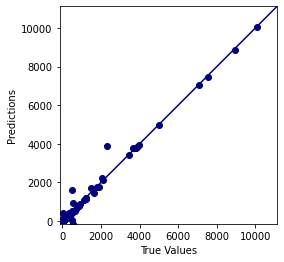

slope 1.00 int 9.11
r2 0.99
r  0.99
mse 24991.19


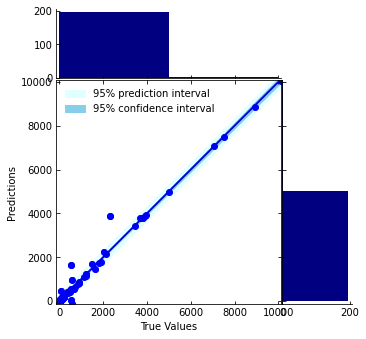

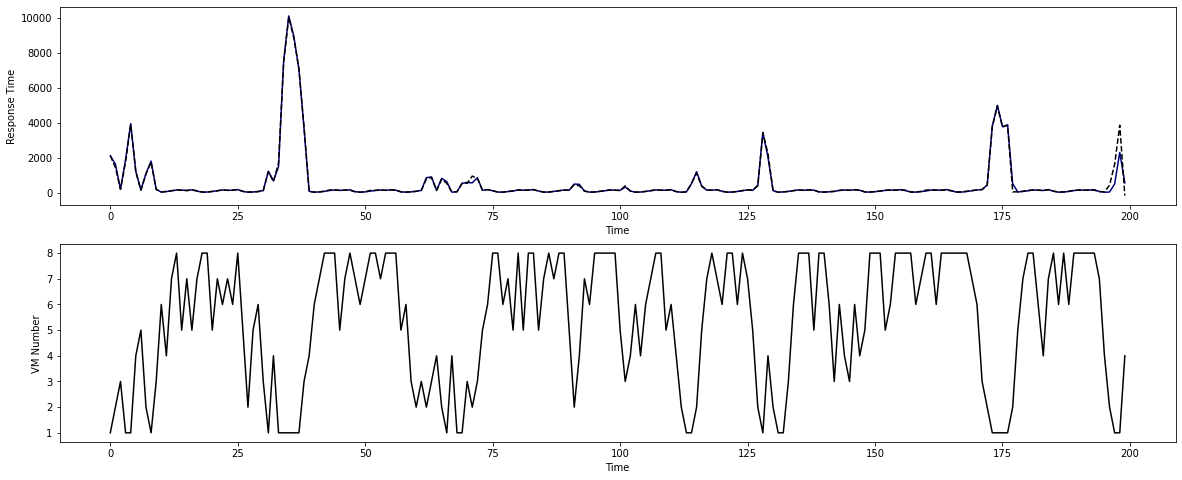

In [188]:
predicted_labels = first_model.predict(train_features)

plot_true_vs_pred(train_labels.values, predicted_labels)

plot_true_vs_pred_hist_conf(train_labels.values.flatten(), predicted_labels.flatten(), binwidth=5000)

plot_timeseries(train_labels.values, predicted_labels)

In [189]:

# Kivi vagyok, hogy a 'worker_number' nélkül is ilyen pontos lenne-e?


[[     18.29      51.4       46.52  156089.75  110496.43 1032929.7
       34.29      34.21]]
First example: [[     3.5     48.6     49.3 154800.8 109863.2 988064.      48.9     48.4]]
Normalized   : [[-4.04 -0.1   0.1  -0.54 -0.97 -2.53  0.68  0.66]]
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 8)                17        
 ion)                                                            
                                                                 
 dense_6 (Dense)             (None, 30)                270       
                                                                 
 dense_7 (Dense)             (None, 15)                465       
                                                                 
 dense_8 (Dense)             (None, 1)                 16        
                                                                 
T

2023-05-23 21:05:00.113791: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-23 21:05:00.157087: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-23 21:05:00.205081: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


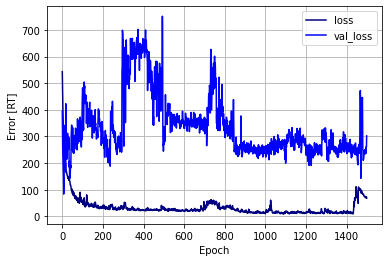

In [190]:
# Amik a korábbi elemzések alapján szóba jöhet
input_variables = g

# worker_number nélkül
input_variables = input_variables[1:]

input_variables_second = input_variables

train_features_second = mf[input_variables]
train_features = mf[input_variables]
train_labels = mf[['response_time']]


second_model = get_model(train_features)

history = second_model.fit(
    train_features,
    train_labels,
    epochs = 1500,
    # batch_size = 300,
    verbose = 0,
    validation_split = 0.05)

plot_loss(history)

7/7 [==============================] - 0s 3ms/step


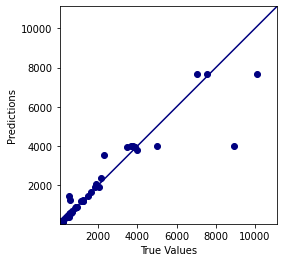

slope 0.85 int 66.56
r2 0.91
r  0.96
mse 175456.50


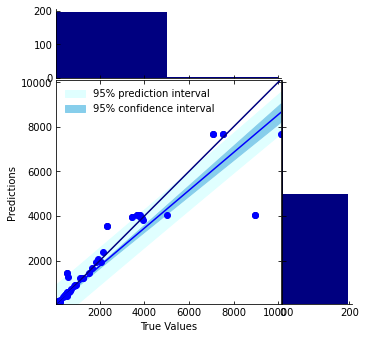

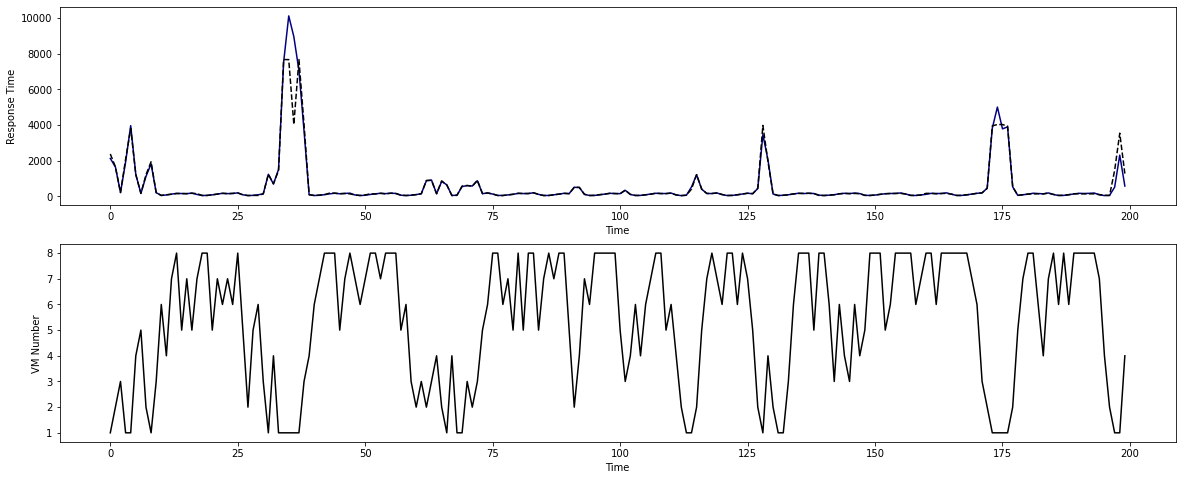

In [191]:
# Kiexportálni az itt feltanított model.

# Keras

second_model.save('second_model.h5')

predicted_labels = second_model.predict(train_features)

plot_true_vs_pred(train_labels.values, predicted_labels)

plot_true_vs_pred_hist_conf(train_labels.values.flatten(), predicted_labels.flatten(), binwidth=5000)

plot_timeseries(train_labels.values, predicted_labels)

[[     18.29      51.4       46.52  156089.75  110496.43 1032929.7
       34.29      34.21]]
First example: [[     3.5     48.6     49.3 154800.8 109863.2 988064.      48.9     48.4]]
Normalized   : [[-4.04 -0.1   0.1  -0.54 -0.97 -2.53  0.68  0.66]]
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 8)                17        
 ion)                                                            
                                                                 
 dense_9 (Dense)             (None, 10)                90        
                                                                 
 dense_10 (Dense)            (None, 5)                 55        
                                                                 
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
T

2023-05-23 21:07:00.129505: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-23 21:07:00.167887: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-23 21:07:00.203219: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


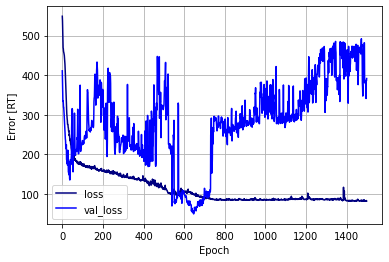

In [192]:
# Amik a korábbi elemzések alapján szóba jöhet
input_variables = g

# worker_number nélkül
input_variables = input_variables[1:]

input_variables_third = input_variables

train_features_third = mf[input_variables]
train_features = mf[input_variables]
train_labels = mf[['response_time']]


third_model = get_model(train_features, f1 = 10, f2 = 5)  # <-- csökkentett neuron szám

history = third_model.fit(
    train_features,
    train_labels,
    epochs = 1500,
    # batch_size = 300,
    verbose = 0,
    validation_split = 0.05)

plot_loss(history)

7/7 [==============================] - 0s 2ms/step
slope 0.93 int 45.89
r2 0.91
r  0.95
mse 174190.70


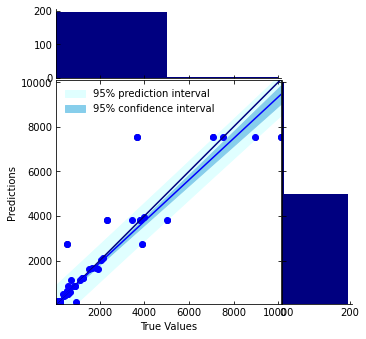

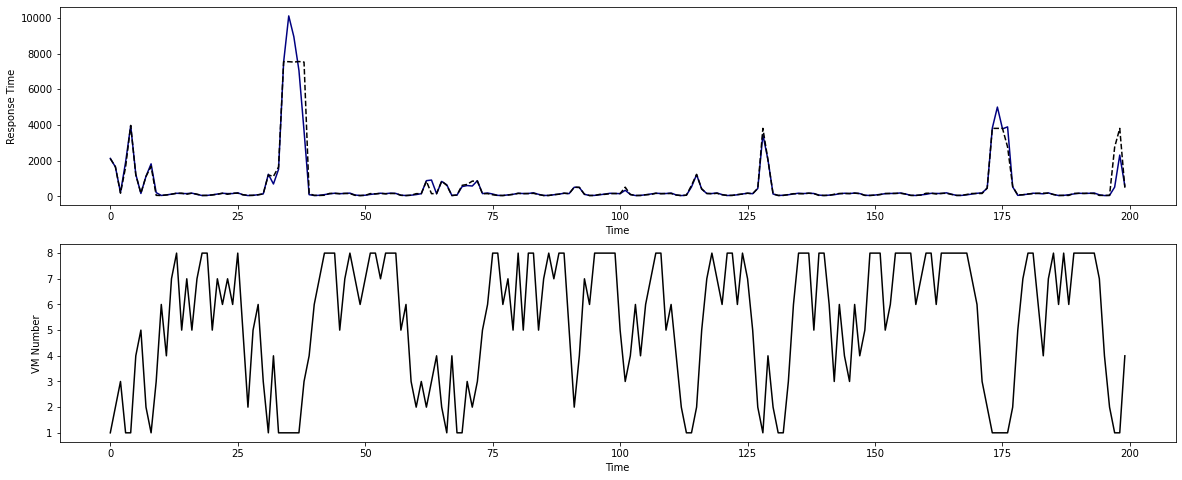

In [193]:
# Kiexportálni az itt feltanított model.

# Keras

third_model.save('third_model.h5')

predicted_labels = third_model.predict(train_features)

plot_true_vs_pred_hist_conf(train_labels.values.flatten(), predicted_labels.flatten(), binwidth=5000)

plot_timeseries(train_labels.values, predicted_labels)

[[     51.4       46.52  156089.75  110496.42 1032929.8       34.29
       34.21]]
First example: [[    48.6     49.3 154800.8 109863.2 988064.      48.9     48.4]]
Normalized   : [[-0.1   0.1  -0.54 -0.97 -2.53  0.68  0.66]]
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normalizat  (None, 7)                15        
 ion)                                                            
                                                                 
 dense_12 (Dense)            (None, 10)                80        
                                                                 
 dense_13 (Dense)            (None, 5)                 55        
                                                                 
 dense_14 (Dense)            (None, 1)                 6         
                                                                 
Total params: 156
Trainabl

2023-05-23 21:07:32.942823: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-23 21:08:00.145340: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


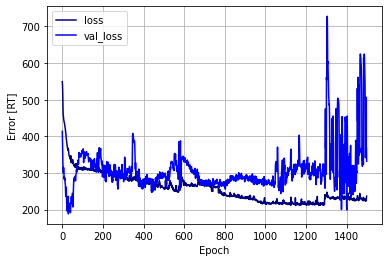

In [194]:
# Amik a korábbi elemzések alapján szóba jöhet
input_variables = g

# worker_number és request_rate nélkül
input_variables = input_variables[2:]

input_variables_fourth = input_variables

train_features_fourth = mf[input_variables]
train_features = mf[input_variables]
train_labels = mf[['response_time']]

fourth_model = get_model(train_features, f1 = 10, f2 = 5)  # <-- csökkentett neuron szám

history = fourth_model.fit(
    train_features,
    train_labels,
    epochs = 1500,
    # batch_size = 300,
    verbose = 0,
    validation_split = 0.05)

plot_loss(history)

7/7 [==============================] - 0s 3ms/step
slope 0.43 int 225.54
r2 0.43
r  0.66
mse 1090053.66


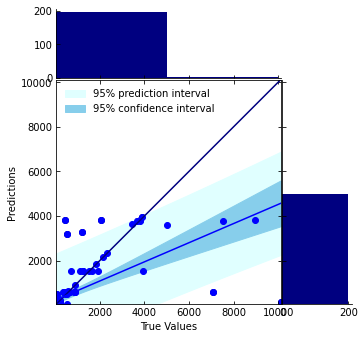

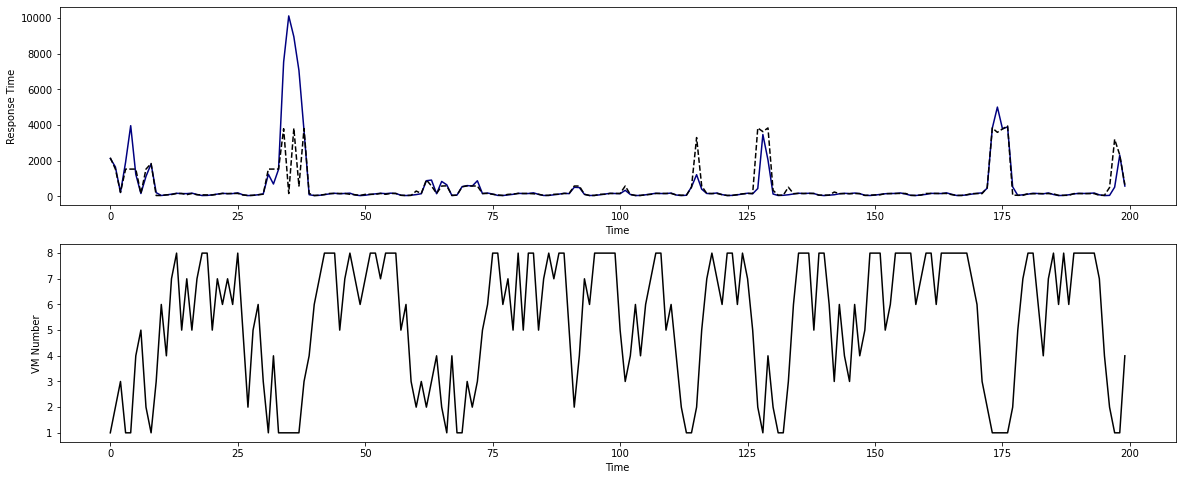

In [195]:
# Kiexportálni az itt feltanított model.

# Keras

fourth_model.save('fourth_model.h5')

predicted_labels = fourth_model.predict(train_features)

plot_true_vs_pred_hist_conf(train_labels.values.flatten(), predicted_labels.flatten(), binwidth=5000)

plot_timeseries(train_labels.values, predicted_labels)

In [196]:
# Nem vagyok megelégedve az eredménnyel, mert:

# - a neurális háló nagyon érzékeny mindenre így nehéz összehasonlítanom az eredményeket.

# - nem sikerült még kiválasztanom a jó bemeneti változókat

# Hogy tovább tudjak lépni, most ezektől eltenkintek és elkészítem az a sub-routint ami kiszámolja a becslült
# válaszidőket az egyes fel-, leskálázási értékekehze.

# ---------------------------------------------------

# Mindenesetre a jelenlegi állás szerinte a neruális háló nagyon pontos ezen a fokon ilyen beálításokkal.

# LR modell megcsinálló

Minden metrikára megcsináljuk a tanítás és az LR modelleket elmenjük.

https://mljar.com/blog/save-load-scikit-learn-model

In [197]:
# Amik a korábbi elemzések alapján szóba jöhet
input_variables = g

print(input_variables)

['worker_number', 'request_rate', 'CPU0User%', 'CPU0Idle%', '[NUMA:0]Slab', '[NUMA:0]Mapped', '[NUMA:0]Anon', '[TCPD]InReceives', '[TCPD]InSegs']


In [180]:


# ezeket a függvényeket beszervezni a notebook elejére



In [198]:
from sklearn.linear_model import LinearRegression

def create_term_for_metric(columnname: str):
    
    f1 = mf.copy()
    __next_name = columnname + 'Next'
    __prev_name = columnname + 'Prev'

    f1[__next_name] = f1[columnname].shift(-1)
    f1[__prev_name] = f1[columnname].shift(+1)
    
    f1 = f1.dropna()

    # Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)
    
    indexAge = f1[ (f1['delta_vm'] == 0) ].index
    f1.drop(indexAge , inplace=True)

    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    f1[__metric_term1] = f1[columnname] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
    f1[__metric_term2] = f1[columnname] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])
    
    __metric_term = f1[[__metric_term1, __metric_term2]]
    __metric_next = f1[__next_name]
    
    return __metric_term, __metric_next

def create_term_for_prediction(value: float, w: int, k: int):
    
    __metric_term1 = value * w/(w+k)
    __metric_term2 = value * k/(w+k)
    
    __metric_term = np.array([[__metric_term1, __metric_term2]])
    
    return __metric_term

def calc_pred_for_metric(__metric_term, __metric_next):

    lr = LinearRegression(fit_intercept=True)

    rr = lr.fit(__metric_term, __metric_next)

    __fit_score = rr.score(__metric_term, __metric_next)
    __fit_coef_ = rr.coef_
    __fit_intercept_ = rr.intercept_
    
    __pred_metric = rr.predict(__metric_term)
    
    return rr

In [199]:
import pickle
import os

os.system('rm -rf ./lr')
os.system('mkdir ./lr')
f = './lr/'

for i, metric in enumerate(input_variables):
    # megcsinálni a linreg modelt az adott metrikára (tanítás)
    __metric_term, __metric_next = create_term_for_metric(metric)
    __lr_model = calc_pred_for_metric(__metric_term.values, __metric_next.values)
    print(type(__lr_model))
    print(__lr_model.coef_)
    print('-------------------------------------------------------------------')
    print(__metric_term.shape)

    # file name, I'm using *.pickle as a file extension
    filename = f + str(metric) + '.pickle'

    # save model
    pickle.dump(__lr_model, open(filename, "wb"))

    # load model
    loaded_model = pickle.load(open(filename, "rb"))

    print(loaded_model.coef_)

<class 'sklearn.linear_model._base.LinearRegression'>
[0.75825145 1.36038093]
-------------------------------------------------------------------
(152, 2)
[0.75825145 1.36038093]
<class 'sklearn.linear_model._base.LinearRegression'>
[0.55676035 0.62869948]
-------------------------------------------------------------------
(152, 2)
[0.55676035 0.62869948]
<class 'sklearn.linear_model._base.LinearRegression'>
[0.67663923 0.47883896]
-------------------------------------------------------------------
(152, 2)
[0.67663923 0.47883896]
<class 'sklearn.linear_model._base.LinearRegression'>
[0.74656261 1.12723221]
-------------------------------------------------------------------
(152, 2)
[0.74656261 1.12723221]
<class 'sklearn.linear_model._base.LinearRegression'>
[0.97294396 0.97215029]
-------------------------------------------------------------------
(152, 2)
[0.97294396 0.97215029]
<class 'sklearn.linear_model._base.LinearRegression'>
[0.88918139 0.88829067]
---------------------------

In [200]:
# Systematicly load

import pickle
import os

f = './lr/'

for i, metric in enumerate(input_variables):

    # file name, I'm using *.pickle as a file extension
    filename = f + str(metric) + '.pickle'
    
    # load model
    loaded_model = pickle.load(open(filename, "rb"))

    print(loaded_model.coef_)

[0.75825145 1.36038093]
[0.55676035 0.62869948]
[0.67663923 0.47883896]
[0.74656261 1.12723221]
[0.97294396 0.97215029]
[0.88918139 0.88829067]
[0.99388258 0.99366823]
[0.81950061 0.33938016]
[0.82276701 0.34126844]


## LR model megcsináló vége

## Second Model (investigation)

Itt most csak kíváncsiságból megvizsgáom, milyen eredményeket adott volna a Second (NN) model.

Később a többit is megvizsgálom (itt részben az ehez szükséges függvényeket állítom elő)

In [201]:
the_model = second_model
input_variables = input_variables_second
# train_features = train_features_second

In [202]:
# mindegyikhez elkészíteni hogy mi lenne a fel leskálázás utáni értéke

A = [i for i in range(-7, 8, 1)]

print(A)

# -2.
# inicalizálni egy üres dictianary-t a dict(action, predicted_response_time) pároknak
# r = []
# al = []
# rl = []
action = []
metrics = []
pred_response_times = []

# -1.
# kiválasztani, hogy milyen értéket mérek aktuális metrikákként
# ideiglenesen az mf utolsó értékei lesznek a bemenők

__N = 84

__current_response_time = mf['response_time'].values[__N]
__last_metrics = mf[input_variables].values[__N]
__w = mf['worker_number'].values[__N]

A = [i for i in range(-__w, 8, 1)]

print(A)

print('-----------------------------------------')
print('__last_metrics -> vagyis a current values')
with np.printoptions(precision=2, suppress=True):
    print(__last_metrics)
print(colored('__current_rt -> \t' + str(__current_response_time), 'red'))
print(colored('__w -> worker_number \t' + str(__w), 'red'))

print('-----------------------------------------')

print(input_variables)
print('-----------------------------------------')

for a in A:
    
    # Ez kell, hogy a VM szám (w) ne legyen 0
    if __w + a != 0:
    
        # 0.
        # inicializálni egy üres tömböt az input_variable változónak
        _new_train_features = np.zeros((1, mf[input_variables].shape[1]))


        # 1.
        # minden metrikára kiszámolni
        for i, metric in enumerate(input_variables):
            # print(i, metric)
            if metric != 'worker_number':

                # 2.
                # megcsinálni a linreg modelt az adott metrikára (tanítás)
                __metric_term, __metric_next = create_term_for_metric(metric)
                __lr_model = calc_pred_for_metric(__metric_term.values, __metric_next.values)
                
                # 3.
                # elmenetni az adott modelt (amit nem használok sehol)
                # _ = joblib.dump(__lr_model, './lr/lr_' + metric + '.joblib', compress=9)
                
                # 3.
                # az előbbi model alapján egy becslés egy konkrét értékre (value, w, k)
                __metric_term = create_term_for_prediction(__last_metrics[i], __w, a)                
                # print('---a metrica értékének becsése (value, w, k alapján ---')
                # print(__metric_term)
                # print(metric)
                # print(a)
                # print('------------------')
                __pred_metric = __lr_model.predict(__metric_term)
                
                # 4.
                # adott becsült metrikát bele kell helyezni a neurális háló bemeneti változójához
                _new_train_features[0, i] = __pred_metric
                # print(_new_train_features)
            
                
        # 5.
        # megvan az új a-hoz tartozó metika tömb, ez alapján becsüjük meg a válaszidőt
        with np.printoptions(precision=2, suppress=True):
            print(_new_train_features)
        
        # 5.a
        # basszuk már egy pandas datafaszba
        metrics.append(_new_train_features)
        
        # 6.
        # a neurális háló model segítségével megbecsülöm a válaszidőt
        
        __predicted_response_time = the_model.predict(_new_train_features, verbose = 0)
        
        #
        # valyon ez a predikció gyorsabb? müködik? azonos eredményt ad? mennyivel gyorsabb?
        np_vec = _new_train_features
        vec = tf.cast(tf.convert_to_tensor(np_vec), dtype=tf.float32)
        pred = the_model.predict(vec, verbose=0)
        
        print('__predicted_response_time = ', __predicted_response_time[:2])
        print('pred                      = ', pred[:2])
        
        # 6.a
        # basszuk már be a pandas datafaszba
        pred_response_times.append(__predicted_response_time)
        
        with np.printoptions(precision=2, suppress=True):
            print('action = ', a, ' --> rt --> ', __predicted_response_time, '\n')
            
        # 7.a
        # basszuk már be egy pandas datafaszba
        action.append(a)


# Basszus ezt az egészet basszuk már be egy pd.be hogy olavasható legyen

# A másik meg, hogy csináljak már több nn modelt és mentsem el őket külön néven
# aztán több model alapján is számojak, hogy lássam melyik milyen eredményt ad

# Pl most hozzáadtam a request ratet a modellhez és orbitális faszságot mond
# azt mondja, hogy nőne a válaszidő ha gépeket adnék hozzá (gratulálok)

[-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7]
[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7]
-----------------------------------------
__last_metrics -> vagyis a current values
[     20.       39.6      58.6  158838.8  110132.8 1031002.       27.9
      27.4]
__current_rt -> 	106.923585
__w -> worker_number 	5
-----------------------------------------
['request_rate', 'CPU0User%', 'CPU0Idle%', '[NUMA:0]Slab', '[NUMA:0]Mapped', '[NUMA:0]Anon', '[TCPD]InReceives', '[TCPD]InSegs']
-----------------------------------------
[[     14.01      73.1      -29.43  159184.4   110543.62 1032011.5
       81.48      80.23]]
__predicted_response_time =  [[5594.448]]
pred                      =  [[5594.448]]
action =  -4  --> rt -->  [[5594.45]] 

[[     17.61      53.52      26.34  158869.24  110298.37 1031459.03
       47.99      47.24]]
__predicted_response_time =  [[189.75125]]
pred                      =  [[189.75125]]
action =  -3  --> rt -->  [[189.75]] 

[[     18.8       46.99      44.93

In [203]:
_action = np.array(action)
_pred_response_times = np.array(pred_response_times).flatten()
_metrics = np.array(metrics)
_metrics = np.squeeze(_metrics, axis=1)

fasz = np.dstack((_action, _pred_response_times))
# fasz = np.squeeze(fasz, 0)
# fasz = np.expand_dims(fasz, 0)

_metrics = np.expand_dims(_metrics, 0)

geci = np.dstack((fasz, _metrics))
geci = np.squeeze(geci, 0)

cnames = ['action', 'pred_rt'] + input_variables
pdf = pd.DataFrame(geci, columns=cnames)

# be is kéne színezni ezt a gecit a pred_rt-t
def color(val):
    if val > 0.9:
        color = 'green'
    elif val > 0.8:
        color = 'orange'
    else:
        color = 'yellow'
    font = 'white'
    return 'background-color: %s; color: %s' % (color, font)

pd.set_option('display.precision', 2)
pdf.style.applymap(color, subset=['pred_rt'])

# -- a current (valós) pedig

c =  np.expand_dims(np.expand_dims(np.array([__w, __current_response_time]), 0), 0)
_ = np.expand_dims(np.expand_dims(__last_metrics, 0), 0)
c = np.squeeze(np.dstack((c, _)), 0)
c = pd.DataFrame(c, columns=['curentw', 'real_rt'] + input_variables)

display(c)

# Na azért van egy két érdkesség

# pélé miért megy negatívba a cpu és a TCPInSegs (ja mert ott negatívba megy már a vm)

u = pdf.style.applymap(color, subset=['pred_rt'])
display(u)


curentw  real_rt  request_rate  CPU0User%  CPU0Idle%  [NUMA:0]Slab  \
0     5.00   106.92         20.00      39.60      58.60    158,838.80   

   [NUMA:0]Mapped  [NUMA:0]Anon  [TCPD]InReceives  [TCPD]InSegs  
0      110,132.80  1,031,002.00             27.90         27.40

In [204]:
# Az egy jó jel, hogyha nem változtatná a vm-ek számát vagyis a k=0, akkor a linreg becsés alapján
# adott új metrika érétkek
# és az ezek alapján adott becslése a válaszidőnek
# nagyon közel áll az éppen mért válaszidő értékéhez,
# ez egy nagyon jó jel, jele annak, hogy a két model jól működik

In [205]:
# A következő feladat

# Ha jól látom ez a Train10 könyvtár

# Tehát ebbe a könyvtárba megírni azt, hogy a feltanított modell alapján skálázzon,.

# És fontos az is, hogy ugyan itt legyen letárolva a terhelést végző jmx profil is,
# hogy ugyan az alapján tudjam terhelni ami alapján tanítottam.
# (egyezzenek a végpontok, stb.)

In [206]:

# model = keras.models.load_model(os.getcwd())

# Let's check:
# np.testing.assert_allclose(
#     first_model.predict(_new_train_features), model.predict(_new_train_features)
# )


In [207]:

# Mi a faszt akarok -> hogy a több különböző modelt össze tudjam hasonlítani ugyanarra az időpontra


In [208]:
def color(val):
    if val > 0.9:
        color = 'green'
    elif val > 0.8:
        color = 'orange'
    else:
        color = 'yellow'
    font = 'white'
    return 'background-color: %s; color: %s' % (color, font)


def get_pandas(action, pred_response_times, metrics, __w, __current_response_time, __last_metrics):

    _action = np.array(action)
    _pred_response_times = np.array(pred_response_times).flatten()
    _metrics = np.array(metrics)
    _metrics = np.squeeze(_metrics, axis=1)

    fasz = np.dstack((_action, _pred_response_times))

    _metrics = np.expand_dims(_metrics, 0)

    geci = np.dstack((fasz, _metrics))
    geci = np.squeeze(geci, 0)

    cnames = ['action', 'pred_rt'] + input_variables
    pdf = pd.DataFrame(geci, columns=cnames)

    # -- a current (valós) pedig
    c =  np.expand_dims(np.expand_dims(np.array([__w, __current_response_time]), 0), 0)
    _ = np.expand_dims(np.expand_dims(__last_metrics, 0), 0)
    c = np.squeeze(np.dstack((c, _)), 0)
    c = pd.DataFrame(c, columns=['curentw', 'real_rt'] + input_variables)

    pd.set_option('display.precision', 2)
    display(c)
    u = pdf.style.applymap(color, subset=['pred_rt'])
    display(u)


In [209]:

def moric(__n, debug=False, show_pandas=False):
    'Az adatsorban minden elemre kiszámolja, hogy mi lett volna a válaszidő különböz k-mellett'
    
    'Azért az nem kéne elfelejeni, hogy csak olyan értékre számolja ki ami valós pl. negatív vm-re ne'
    
    results = []
    results_dict = []
    
    action = []
    metrics = []
    pred_response_times = []
    
    all_tf_pred_time = []
    all_tf_pred_new_time = []

    A = [i for i in range(-9, 10, 1)]

    # n-edik elem lesz kiválasztva a 'mf' dataframeből
    __N = __n

    __current_response_time = mf['response_time'].values[__N]
    __last_metrics = mf[input_variables].values[__N]
    __w = mf['worker_number'].values[__N]
    
    if debug == True:
        print('-----------------------------------------')
        print('__last_metrics -> vagyis a current values')
        with np.printoptions(precision=2, suppress=True):
            print(__last_metrics)
        print(colored('__current_rt -> \t' + str(__current_response_time), 'red'))
        print(colored('__w -> worker_number \t' + str(__w), 'red'))
        print('-----------------------------------------')
        print(input_variables)
        print('-----------------------------------------')

    for a in A:
        
        # negatív esetben legyen -_w + 1 (pl w=5, a=-7 akkor new_a = -5 + 1 = -4)
        if (__w + a) < 1:
            a = -__w + 1
        
        # ha több lenne mint a max_vm akkor 10 - _w (pl w=5 a=7 akkor new_a = 10 - 5 = 5)
        if (__w + a) > 10:
            a = 10-__w
        

        # Ez kell, hogy a VM szám (w) ne legyen 0
        if __w + a != 0:

            # 0.
            # inicializálni egy üres tömböt az input_variable változónak
            _new_train_features = np.zeros((1, mf[input_variables].shape[1]))

            # 1.
            # minden metrikára kiszámolni
            for i, metric in enumerate(input_variables):
                # print(i, metric)
                if metric != 'worker_number':

                    # 2.
                    # megcsinálni a linreg modelt az adott metrikára (tanítás)
                    __metric_term, __metric_next = create_term_for_metric(metric)
                    __lr_model = calc_pred_for_metric(__metric_term.values, __metric_next.values)

                    # 3.
                    # az előbbi model alapján egy becslés egy konkrét értékre (value, w, k)
                    __metric_term = create_term_for_prediction(__last_metrics[i], __w, a)                
                    __pred_metric = __lr_model.predict(__metric_term)

                    # 4.
                    # adott becsült metrikát bele kell helyezni a neurális háló bemeneti változójához
                    _new_train_features[0, i] = __pred_metric
                    # print(_new_train_features)

            # 5.
            # megvan az új a-hoz tartozó metika tömb, ez alapján becsüjük meg a válaszidőt
            if debug == True:
                with np.printoptions(precision=2, suppress=True):
                    print(_new_train_features)

            # 5.a
            # basszuk már egy pandas datafaszba
            metrics.append(_new_train_features)

            # 6.
            # a neurális háló model segítségével megbecsülöm a válaszidőt
            # _ = time.time()
            # __predicted_response_time = the_model.predict(_new_train_features,
            #                                               verbose = 0,
            #                                               batch_size=2000,
            #                                               use_multiprocessing=False)
            # _ = time.time() - _
            # all_tf_pred_time.append(_)
            # print('old pred ', __predicted_response_time)
            
            
            # 6. (New)
            # valyon ez a predikció gyorsabb? müködik? azonos eredményt ad? mennyivel gyorsabb?
            _ = time.time()
            np_vec = _new_train_features
            vec = tf.cast(tf.convert_to_tensor(np_vec), dtype=tf.float32)
            __predicted_response_time = the_model(vec, training=False).numpy()
            _ = time.time() - _
            all_tf_pred_new_time.append(_)
            # print('new pred ', __predicted_response_time)
            

            # 6.a
            # basszuk már be a pandas datafaszba
            pred_response_times.append(__predicted_response_time)
            
            if debug == True:
                with np.printoptions(precision=2, suppress=True):
                    print('action = ', a, ' --> rt --> ', __predicted_response_time, '\n')
            
            # 7.a
            # basszuk már be egy pandas datafaszba
            action.append(a)
            
            # X.
            # megpróbálom felgyorsítani, hogy a numpy számoja a pred válaszidőt
            # W = first_model.get_weights()
            # __px = predict(_new_train_features)
            # print(__px, __predicted_response_time.flatten()[0])
            
            results_dict.append({'action': a, 'prt': __predicted_response_time.flatten()[0]})
            results.append(__predicted_response_time.flatten()[0])
            
    # X.
    if show_pandas == True:
        get_pandas(action, pred_response_times, metrics, __w, __current_response_time, __last_metrics)
    
    # _old = np.array(all_tf_pred_time)
    # _new = np.array(all_tf_pred_new_time)
    # print('old pred times ', _old)
    # print('new pred times ', _new)
    # print('')
    # print('old sum ', _old.sum())
    # print('new sum ', _new.sum())
    
    return results


In [210]:
moric(60, debug = True, show_pandas = True)

-----------------------------------------
__last_metrics -> vagyis a current values
[     19.6      82.7      14.9  158067.2  110481.6 1023279.6      62.2
      61.6]
__current_rt -> 	94.64672448979596
__w -> worker_number 	2
-----------------------------------------
['request_rate', 'CPU0User%', 'CPU0Idle%', '[NUMA:0]Slab', '[NUMA:0]Mapped', '[NUMA:0]Anon', '[TCPD]InReceives', '[TCPD]InSegs']
-----------------------------------------
[[     18.13      87.29      21.51  158054.87  110559.78 1023671.72
       85.87      85.25]]
action =  -1  --> rt -->  [[495.03]] 

[[     18.13      87.29      21.51  158054.87  110559.78 1023671.72
       85.87      85.25]]
action =  -1  --> rt -->  [[495.03]] 

[[     18.13      87.29      21.51  158054.87  110559.78 1023671.72
       85.87      85.25]]
action =  -1  --> rt -->  [[495.03]] 

[[     18.13      87.29      21.51  158054.87  110559.78 1023671.72
       85.87      85.25]]
action =  -1  --> rt -->  [[495.03]] 

[[     18.13      87.29      

curentw  real_rt  request_rate  CPU0User%  CPU0Idle%  [NUMA:0]Slab  \
0     2.00    94.65         19.60      82.70      14.90    158,067.20   

   [NUMA:0]Mapped  [NUMA:0]Anon  [TCPD]InReceives  [TCPD]InSegs  
0      110,481.60  1,023,279.60             62.20         61.60

[495.03125,
 495.03125,
 495.03125,
 495.03125,
 495.03125,
 495.03125,
 495.03125,
 495.03125,
 495.03125,
 91.323975,
 142.67834,
 150.5468,
 157.14893,
 155.90393,
 153.91338,
 151.77156,
 151.33997,
 156.93127,
 156.93127]

In [211]:
# Na ez itt nagyon összekapkotdott - dirty - az action számot most kihackelem - az egyáltalán nem biztos +

# https://matplotlib.org/stable/tutorials/colors/colormaps.html

import matplotlib as mpl
from cycler import cycler


def fuzz(a):
    mpl.rcParams['lines.linewidth'] = 1

    colormap = plt.get_cmap('jet')
    
    # itt a lehetséges actionok számával azonos színt állítok elő (a.shape[1])
    colors = [colormap(k) for k in np.linspace(0, 1, a.shape[1])]

    mpl.rcParams['axes.prop_cycle'] = cycler(color=colors)

    fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(17, 6.8), gridspec_kw={'height_ratios': [2, 1, 1]})
    for i in range(a.shape[1]):
        ax0.plot(a[:, i], label='a('+str(i-9)+')') # ---------> dirty hack ! nem biztonságos
    ax0.plot(mf['response_time'].values[0:a.shape[0]], ls = '--', lw = 1.0, color='black')
    ax0.set_ylabel('hipt response time')
    ax0.legend(loc=2)
    ax1.plot(mf['worker_number'].values[0:a.shape[0]])
    ax1.set_ylabel('current vm number')
    ax2.plot(mf['request_rate'].values[0:a.shape[0]])
    ax2.set_ylabel('request_rate')
    ax2.set_xlabel('Time')
    plt.show()

In [212]:
## First model (investigation)

the_model = first_model
input_variables = input_variables_first

a_prts_first = []
# for i in range(4):
# for i in track(range(len(mf))):
for i in track(range(100)):
    _ = moric(i)
    a_prts_first.append(_)
    

Output()

In [213]:
with open('a_prts_first.txt', 'w') as output:
    for row in a_prts_first:
        output.write(str(row) + '\n')

reload_a_prts_first = []
with open('a_prts_first.txt', 'r') as fp:
    for row in fp:
        row = row.replace('[', '')
        row = row.replace(']', '')
        row = [np.float32(i) for i in row.split(',') if i.strip()]
        reload_a_prts_first.append(row)

# Igy kell helyesn kiírni és kiolvasn a listát txt-be de nem ezt fogom használni hanem a pickle módszert

In [214]:
with open('a_prts_first.pickle', 'wb') as fp:
    pickle.dump(a_prts_first, fp)

with open ('a_prts_first.pickle', 'rb') as fp:
    reload_a_prts_first = pickle.load(fp)

In [215]:
for i in range(len(a_prts_first[0])):
    assert a_prts_first[0][i] == reload_a_prts_first[0][i]

for i in range(len(a_prts_first[-1])):
    assert a_prts_first[0][i] == reload_a_prts_first[0][i]

In [216]:
a_prts = a_prts_first

len(a_prts)

100

{19}
(100, 19)
(100, 19)


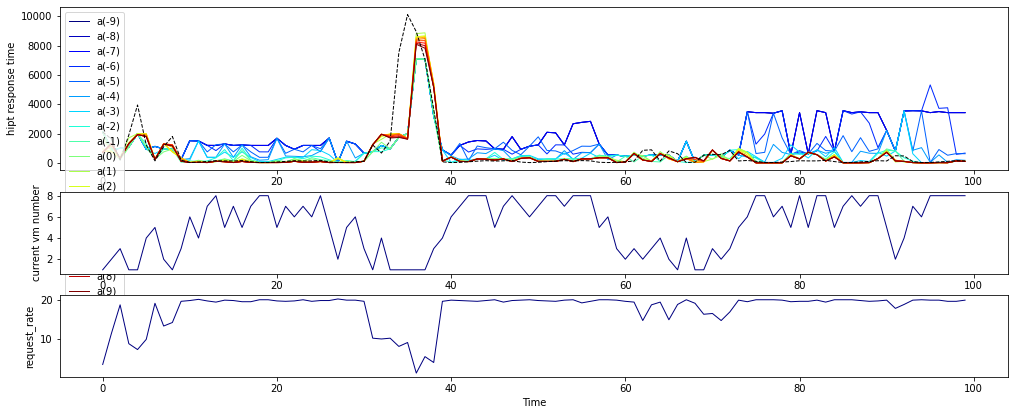

In [217]:
# ha különböző hosszú ez a fos akkor baj van

a = set()

for i in range(len(a_prts)):
    a.add(len(a_prts[i]))

print(a)

# Ha csak egy részét akarom az idősornak vizsgálni

a = np.array(a_prts[0:len(a_prts)])
print(a.shape)

a = np.array(a_prts[0:100])
print(a.shape)

fuzz(a)

In [218]:

# Na végre

# Van egy függvényem 'moric' amivel megvizsgálhatom hogy milyen rt-t és milyen after metric értékeket adott
# volna adott actionhöz

# ---

# Ugyan ennek a függvénynek a segítégével tudom kiszámolni az adott időponthoz tartozó (a, rt) értékeket is


In [219]:
len(mf)

200

In [220]:
## Second model (investigation)

the_model = second_model
input_variables = input_variables_second

a_prts_second = []
# for i in range(4):
# for i in track(range(len(mf))):
for i in track(range(100)):
    _ = moric(i)
    a_prts_second.append(_)
    

Output()

In [221]:
with open('a_prts_second.pickle', 'wb') as fp:
    pickle.dump(a_prts_second, fp)

with open ('a_prts_second.pickle', 'rb') as fp:
    reload_a_prts_second = pickle.load(fp)

In [222]:
for i in range(len(a_prts_second[0])):
    assert a_prts_second[0][i] == reload_a_prts_second[0][i]

for i in range(len(a_prts_second[-1])):
    assert a_prts_second[0][i] == reload_a_prts_second[0][i]

In [223]:
a_prts = a_prts_second

len(a_prts)

100

{19}
(100, 19)
(100, 19)


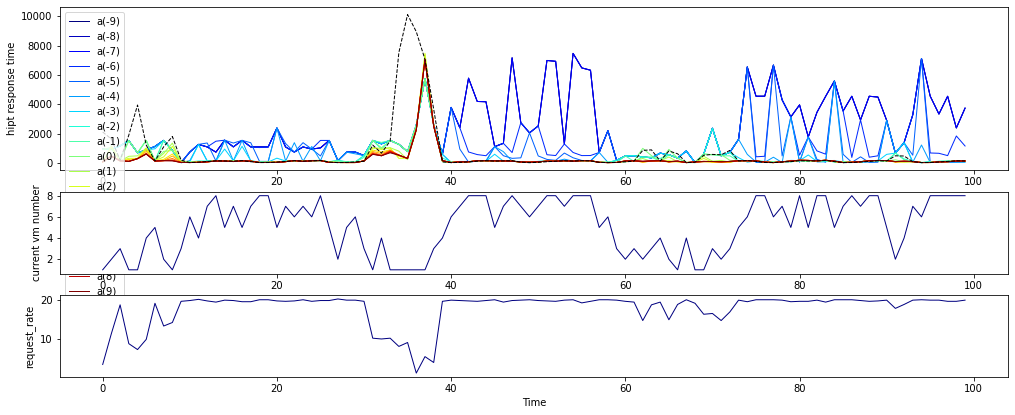

In [224]:
# ha különböző hosszú ez a fos akkor baj van

a = set()

for i in range(len(a_prts)):
    a.add(len(a_prts[i]))

print(a)

# Ha csak egy részét akarom az idősornak vizsgálni

a = np.array(a_prts[0:len(a_prts)])
print(a.shape)

a = np.array(a_prts[0:100])
print(a.shape)

fuzz(a)

In [225]:
_ = moric(77, show_pandas = True)

curentw  real_rt  request_rate  CPU0User%  CPU0Idle%  [NUMA:0]Slab  \
0     6.00    43.07         20.00      12.40      85.20    158,768.80   

   [NUMA:0]Mapped  [NUMA:0]Anon  [TCPD]InReceives  [TCPD]InSegs  
0      110,056.00  1,029,539.60             22.00         22.00

```
Nagyon úgy tűnik, hogy tök jó a fenti becslés 'seccond_model' segítségével, csak kicsit megtévesztő az
árázolás

Ugye az van, hogy amikor kiszámoltatom vele a lehetséges 'action'-höz tartozó értékeket, akkor, ugy oldottam
meg, hogy akkor is számoljon valamit és mentse el az értéket amikor nem lehetséges vm számot kaptunk volna
a fel vagy le skálázás után. Ilyen például az amikor 7 VM van éppen és mondjuk még +5-öt adna hozzá,
vagy bármilyen nagyobb értéket. Illetve ugyan ilyen amikor például 4 VM van éppen és -7-et venne el.

Anno, hogy egyszerűen kezeljem ezeket a helyzeteket úgy oldottam meg a predicted válaszidő kérdését,
hogy ilyenkor a Minimumra, vagy a Maximumra való skálázáshoz tartozó értéket mentettem el.

Például amikor 4VM-ről elvenne -7-et akkor úgy számoltam mintha -3-at venne el.

Ezért van az, hogy a fenti ábrán sok vonal azonos.

Erre egyébként azért van szüksége mert nem tud irracionális VM számokra LR értéket kiszámolni.
Vagyis ki tud, de ilyen értékek jönnének ki mint például -210% CPU kihasználtság,
hogy csak egy metrikát említsek.

Mivel ilyen értékek nincsenek (nem lehetségesek) és a tanítás során sem láttunk ilyeket
(hiszen hogyan is láthattunk volna) ezért a neurális háló sem tudta (tudja) megtanulni,
hogy ilyen értékekhez milyen válaszidő tartozna.

Hogy ezeket az abszurd értékeket elkerüljem a vizualizációnál, a korábban vázolt dirty hack
megoldást válaszottam.

Ezért megtévesztő egy picit az ábra.

De ha ezt az információt mellé veszem, akkor teljesen értlemes és lehet látni, hogy amúgy jól dönt,
csak csalóka mert minden egyes pontra kiszámolja a -9,..,+9 skálázást, ami igazából egyik időpontra
sem kiszámolható, hiszen nincs olyan helyzet amikor -9-et és +9-et is hozzá tudunk adni a rendszerhez.

Például amikor 1 VM van a rendszerben akkor csak a +1, .., +9 nek van értlme és a leskálázásnak nincs,
ugyanígy a másik irányba is.
```

Ennyit kiegészítésnek.

És ha most megnézzük az ábrát akkor tök jól látszik, hogy pl. (60)-nál 6 VM volt, akkor egy erősebb leskálázással (király kék vonalak) megugrott volna a válaszidő (míg új VM-ek hozzáadásával nem változott volna)

Ugyan így (77)-nél amikor csak 1 VM volt és a válaszidő is jó magas volt (fekete szaggatott vonal) akkor VM elvonás nem volt lehetséges így azokat ki sem számolta (ezért nincs magasabb válaszidő érték az éppen aktuálisnál az ábrán) de új VM-ek hozzáadásával szépen visszahozta volna a rendszert (legalábbis a becsült válaszidőt oda jelezte (piros vonal)

---

Ugyanakkor vannak időpontok amior hülyeséget mondott:

Van egy két ilyen időpont. Nem sok de van.

Áltlánosságban hülyeségnek tekinthető amkor azt mondja, hogy új gépek hozzáadásával nőne a válaszidő. Pl (19) és (43)

```
> Amit alább leírtam már megdölt de erről holnap (ez jó hír)

> azért lehet látni, hogy vannak még hibák (pl. 64) kevés az aktuális vm és mégis azt mondja hogy bármennyit
  adna hozzás nem menne le a válaszidő (valyon miért?) (ezen a ponton kell ránézni, hogy mire becsüli a
                                                        metrikákat)
> De amúgy jónak tűnik.
```

In [226]:

# Oké ez eddig csúcs szuper.

# Az előbb a second_model alapján vizsgáltam a helyzetet.

# Mi lenne ha egy másik modelt is megvizsgálnék?


In [227]:

# Csak emlékeztetőként

# first model
print('input_variables_first\n', input_variables_first, '\n')

# second model (original) (nn(30, 15))
print('input_variables_second\n', input_variables_second, '\n')

# third model (original) (nn(10, 5))
print('input_variables_third\n', input_variables_third, '\n')

# fourth model (se worker, se request rate) (nn(10, 5))
print('input_variables_fourth\n', input_variables_fourth, '\n')

input_variables_first
 ['worker_number', 'request_rate', 'CPU0User%', 'CPU0Idle%', '[NUMA:0]Slab', '[NUMA:0]Mapped', '[NUMA:0]Anon', '[TCPD]InReceives', '[TCPD]InSegs'] 

input_variables_second
 ['request_rate', 'CPU0User%', 'CPU0Idle%', '[NUMA:0]Slab', '[NUMA:0]Mapped', '[NUMA:0]Anon', '[TCPD]InReceives', '[TCPD]InSegs'] 

input_variables_third
 ['request_rate', 'CPU0User%', 'CPU0Idle%', '[NUMA:0]Slab', '[NUMA:0]Mapped', '[NUMA:0]Anon', '[TCPD]InReceives', '[TCPD]InSegs'] 

input_variables_fourth
 ['CPU0User%', 'CPU0Idle%', '[NUMA:0]Slab', '[NUMA:0]Mapped', '[NUMA:0]Anon', '[TCPD]InReceives', '[TCPD]InSegs'] 



In [228]:
## Third Model (investigation)

In [229]:
the_model = third_model
input_variables = input_variables_third
# train_features = train_features_third

In [230]:
_ = moric(77, debug = True, show_pandas = True)

-----------------------------------------
__last_metrics -> vagyis a current values
[     20.       12.4      85.2  158768.8  110056.  1029539.6      22.
      22. ]
__current_rt -> 	43.07465499999999
__w -> worker_number 	6
-----------------------------------------
['request_rate', 'CPU0User%', 'CPU0Idle%', '[NUMA:0]Slab', '[NUMA:0]Mapped', '[NUMA:0]Anon', '[TCPD]InReceives', '[TCPD]InSegs']
-----------------------------------------
[[     12.57      35.63     -82.5   159242.08  110573.09 1030777.47
       75.87      75.98]]
action =  -5  --> rt -->  [[1678.24]] 

[[     12.57      35.63     -82.5   159242.08  110573.09 1030777.47
       75.87      75.98]]
action =  -5  --> rt -->  [[1678.24]] 

[[     12.57      35.63     -82.5   159242.08  110573.09 1030777.47
       75.87      75.98]]
action =  -5  --> rt -->  [[1678.24]] 

[[     12.57      35.63     -82.5   159242.08  110573.09 1030777.47
       75.87      75.98]]
action =  -5  --> rt -->  [[1678.24]] 

[[     12.57      35.63   

curentw  real_rt  request_rate  CPU0User%  CPU0Idle%  [NUMA:0]Slab  \
0     6.00    43.07         20.00      12.40      85.20    158,768.80   

   [NUMA:0]Mapped  [NUMA:0]Anon  [TCPD]InReceives  [TCPD]InSegs  
0      110,056.00  1,029,539.60             22.00         22.00

In [231]:
## Third model (investigation)

the_model = third_model
input_variables = input_variables_third

a_prts_third = []
# for i in range(4):
# for i in track(range(len(mf))):
for i in track(range(100)):
    _ = moric(i)
    a_prts_third.append(_)
    

Output()

In [232]:
with open('a_prts_third.pickle', 'wb') as fp:
    pickle.dump(a_prts_third, fp)

with open ('a_prts_third.pickle', 'rb') as fp:
    reload_a_prts_third = pickle.load(fp)

In [233]:
for i in range(len(a_prts_third[0])):
    assert a_prts_third[0][i] == reload_a_prts_third[0][i]

for i in range(len(a_prts_third[-1])):
    assert a_prts_third[0][i] == reload_a_prts_third[0][i]

In [234]:
a_prts = a_prts_third

len(a_prts)

100

{19}
(100, 19)
(100, 19)


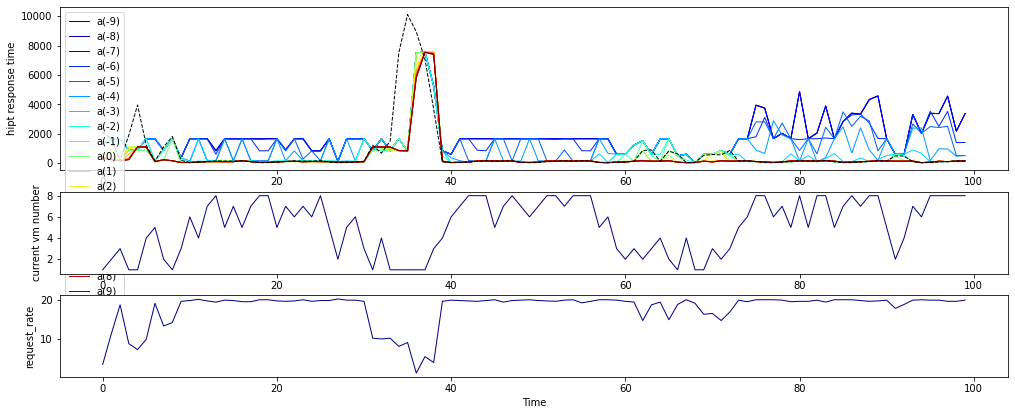

In [235]:
# ha különböző hosszú ez a fos akkor baj van

a = set()

for i in range(len(a_prts)):
    a.add(len(a_prts[i]))

print(a)

# Ha csak egy részét akarom az idősornak vizsgálni

a = np.array(a_prts[0:len(a_prts)])
print(a.shape)

a = np.array(a_prts[0:100])
print(a.shape)

fuzz(a)

In [236]:
## Fourth Model (investigation)

In [237]:
the_model = fourth_model
input_variables = input_variables_fourth
# train_features = train_features_fourth

In [238]:
_ = moric(77, debug = True, show_pandas = True)

-----------------------------------------
__last_metrics -> vagyis a current values
[     12.4      85.2  158768.8  110056.  1029539.6      22.       22. ]
__current_rt -> 	43.07465499999999
__w -> worker_number 	6
-----------------------------------------
['CPU0User%', 'CPU0Idle%', '[NUMA:0]Slab', '[NUMA:0]Mapped', '[NUMA:0]Anon', '[TCPD]InReceives', '[TCPD]InSegs']
-----------------------------------------
[[     35.63     -82.5   159242.08  110573.09 1030777.47      75.87
       75.98]]
action =  -5  --> rt -->  [[618.74]] 

[[     35.63     -82.5   159242.08  110573.09 1030777.47      75.87
       75.98]]
action =  -5  --> rt -->  [[618.74]] 

[[     35.63     -82.5   159242.08  110573.09 1030777.47      75.87
       75.98]]
action =  -5  --> rt -->  [[618.74]] 

[[     35.63     -82.5   159242.08  110573.09 1030777.47      75.87
       75.98]]
action =  -5  --> rt -->  [[618.74]] 

[[     35.63     -82.5   159242.08  110573.09 1030777.47      75.87
       75.98]]
action =  -5  -->

curentw  real_rt  CPU0User%  CPU0Idle%  [NUMA:0]Slab  [NUMA:0]Mapped  \
0     6.00    43.07      12.40      85.20    158,768.80      110,056.00   

   [NUMA:0]Anon  [TCPD]InReceives  [TCPD]InSegs  
0  1,029,539.60             22.00         22.00

In [239]:
a_prts_fourth = []
# for i in range(4):
# for i in track(range(len(mf))):
for i in track(range(100)):
    _ = moric(i)
    a_prts_fourth.append(_)
    

Output()

In [240]:
with open('a_prts_fourth.pickle', 'wb') as fp:
    pickle.dump(a_prts_fourth, fp)

with open ('a_prts_fourth.pickle', 'rb') as fp:
    reload_a_prts_fourth = pickle.load(fp)

In [241]:
for i in range(len(a_prts_fourth[0])):
    assert a_prts_fourth[0][i] == reload_a_prts_fourth[0][i]

for i in range(len(a_prts_fourth[-1])):
    assert a_prts_fourth[0][i] == reload_a_prts_fourth[0][i]

In [242]:
a_prts = a_prts_fourth

len(a_prts)

100

{19}
(100, 19)
(100, 19)


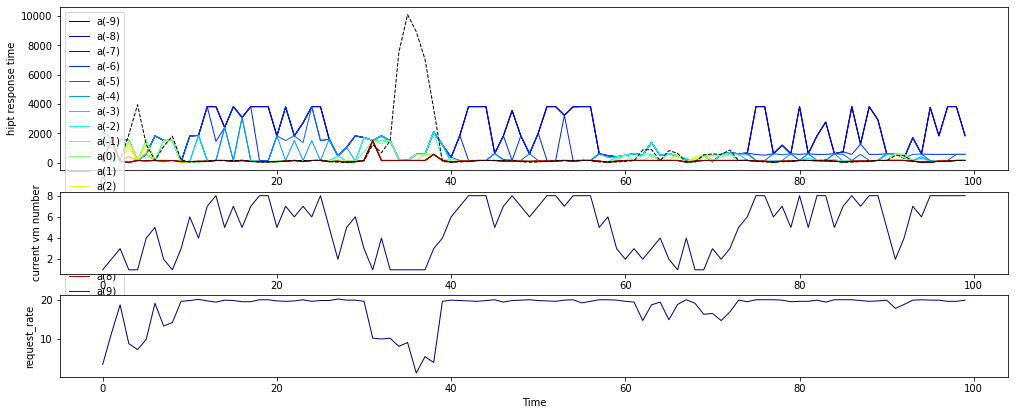

In [243]:
# ha különböző hosszú ez a fos akkor baj van

a = set()

for i in range(len(a_prts)):
    a.add(len(a_prts[i]))

print(a)

# Ha csak egy részét akarom az idősornak vizsgálni

a = np.array(a_prts[0:len(a_prts)])
print(a.shape)

a = np.array(a_prts[0:100])
print(a.shape)

fuzz(a)



2023.05.23 23:21
    
    Eddig tök jó móst már csak egymás mellé akarom rakni a négy ábrát
    
    és kiokumulálni, hogyan lehetne összehasonlítani őket,
    hogy eldöntsem, összemérjem melyik jobb (ha ez letsges egyáltalán)
    (de legalább ránézésre összemérni, hogy egyáltalán mit látok, melyik hol mondott nagy hülyeséget)
    
Amim van hozzá:

Négy változó amelykeben eltároltam a minden időpontra kiszámolt összes lehetséges action után prediktált hipotetikus válaszidő értékeit.

Őket kéne rátennem egy ábrára, hogy lássam őket

    a_prts_first, a_prts_second, etc

In [244]:
def create_a(a_prts):
    
    a = set()

    for i in range(len(a_prts)):
        a.add(len(a_prts[i]))

    print(a)

    # Ha csak egy részét akarom az idősornak vizsgálni

    a = np.array(a_prts[0:len(a_prts)])
    print(a.shape)

    a = np.array(a_prts[0:100])
    print(a.shape)

    return a

# ---

a_first  = create_a(a_prts_first)
a_second = create_a(a_prts_second)
a_third  = create_a(a_prts_third)
a_fourth = create_a(a_prts_fourth)

{19}
(100, 19)
(100, 19)
{19}
(100, 19)
(100, 19)
{19}
(100, 19)
(100, 19)
{19}
(100, 19)
(100, 19)


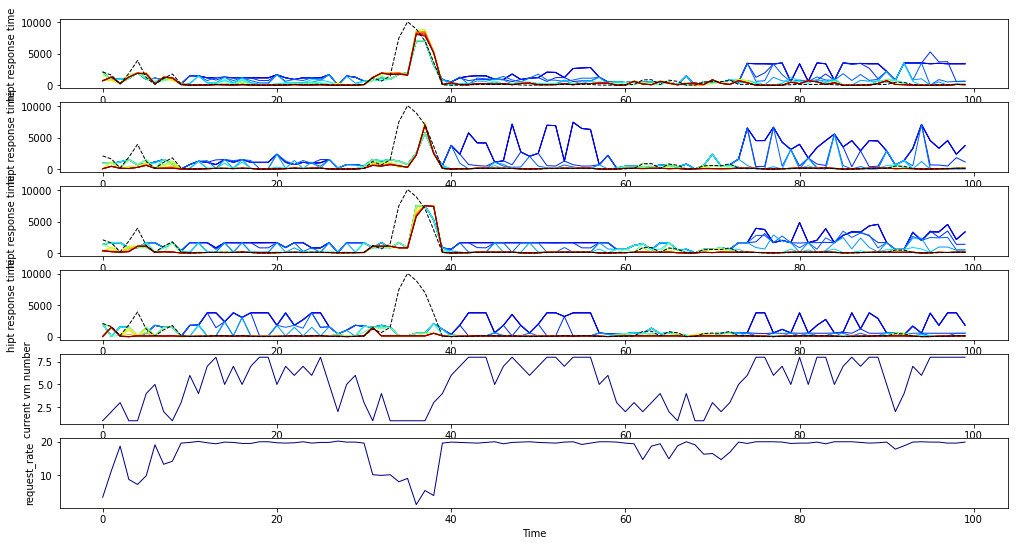

In [245]:
def wuzz(_a: list, height=6.8, legend=True):
    mpl.rcParams['lines.linewidth'] = 1
    colormap = plt.get_cmap('jet')
    # itt a lehetséges actionok számával azonos színt állítok elő (a.shape[1])
    colors = [colormap(k) for k in np.linspace(0, 1, _a[0].shape[1])]
    mpl.rcParams['axes.prop_cycle'] = cycler(color=colors)
    

    rows = len(_a) + 2

    fig, ax = plt.subplots(rows, 1, figsize=(17, height))
    for p, a in enumerate(_a):
        for i in range(a.shape[1]):
            ax[p].plot(a[:, i], label='a('+str(i-9)+')') # ---------> dirty hack ! nem biztonságos
            
        ax[p].plot(mf['response_time'].values[0:a.shape[0]], ls = '--', lw = 1.0, color='black')
        ax[p].set_ylabel('hipt response time')
    if legend == True:
        ax[p].legend(loc=2)
    
    ax[p+1].plot(mf['worker_number'].values[0:a.shape[0]])
    ax[p+1].set_ylabel('current vm number')
    ax[p+2].plot(mf['request_rate'].values[0:a.shape[0]])
    ax[p+2].set_ylabel('request_rate')
    ax[p+2].set_xlabel('Time')
    plt.show()

wuzz([a_first, a_second, a_third, a_fourth], 9, False)

In [246]:
# Most hogy megvan az összehasonlítás át kell néznem, hogy mi az ami használható (de abban maradok) hogy (4)
# model a legjobb (a teljesítmény alapján, a logika alapján mert nincs benne a worker_number de nincs benne
# a request rate sem (ami viszont benne volt az eredetiben)) és még egy jó része, hogy a nerulási háló
# a legkevesebb neuron számmal müködik ()


# --

# következő lépés,hogy ezt implementálni kell és ténylegesen ez alapján megcsinálni a skálázást.

# --

In [ ]:

# Itt a vége fuss el véle


In [ ]:
# Control the chaos